# Section 1 - Introduction

This project is part of a series of projects where I aim to optimize every pitcher's pitch mix. For this project a pitcher's *pitch mix* is defined as the percentage thrown of each of their pitch types. For example, Cory Abbott's pitch mix in 2022 was 50.9% four-seam fastball, 22.2% knuckle curve, 26.9% slider.

For this project an *optimal pitch mix* is defined as the pitch mix that minimizes batter success against the pitcher. Batter success against a pitcher and pitcher success is generally complementary, as you can view a plate appearance in the as a matchup of two players with opposite interests. In the broader context of the game the batter wants their team to score runs and the pitcher doesn't want the batter's team to score runs. In the narrower context of a single plate appearance the result of the matchup contributes to both players' broader goals. How much the result of the plate appearance contributes to either player's goal depends on many factors such as the situation in the game and the result of the plate appearance itself. Since determining the level of success attributed to the result of the plate appearance is nuanced, claiming that batter success is exactly complementary of pitcher success is naive. However, it serves as a general benchmark that in a plate appearance the batter is successful if the result is one that contributes positively to their team's run scoring, and the pitcher is successful if they prevent those results.

The statistic that I've chosen to measure pitcher success is *wOBA against* (called *wOBA* from here on). You can read more about wOBA on *Fangraphs* [here](https://library.fangraphs.com/offense/woba/).

The first reason that I've chosen to use wOBA is that it better represents the value of events to a team's run scoring (or run prevention from the pitching team's perspective) than traditional batting (batting against) statistics.

The second reason is that it is inclusive of a larger set of events than traditional pitching stats. Traditional pitching stats like ERA or FIP look at run scoring on a more binary scale than wOBA, and don't reflect the events that contribute to run scoring. For example, a pitcher allowing a double is a negative event for them, but whether that event is reflected in their ERA depends on the events after the double.

The third, and final, reason that I've chosen wOBA is that is limited to the results of plate appearances. For a pitcher, getting looking or swinging strikes is generally good and having the batter take balls is generally bad, but their relationship to team run prevention is more complex than the results of a plate appearance.

Part of what makes pitchers successful is ensuring that the batter doesn't know what pitch type is coming next. It is likely that if a pitcher throws a pitch type more or less often in a given time period then batters may have different results against that pitch type in that time period.

My motivation for this series of projects comes from the understanding that pitchers should throw their best pitch type(s) (in a vacuum, without considering use) as often as they can, but without throwing them too often to the point of increased batter performance against the pitch type(s) due to familiarity.

In this project I will create a model to quantify the effect of increasing or decreasing use of a pitch type on the wOBA of that pitch type.

When considering a pitcher's wOBA, it can be represented as a weighted average of their wOBA on each of their pitch types weighted by the percentage that they threw the pitch. 

Say a pitcher throws $n$ pitch types, $x_{i}$ is their percentage thrown of pitch type $i$ across the full season, and $wOBA_{i}$ is their wOBA of pitch type $i$ (it will be shown later that the maximum number of pitch types that a pitcher throws in the sample is eight, and the number of possible pitch types considered is ten).

Then their wOBA is as follows.

$wOBA = wOBA_{1} * x_{1} + ... + wOBA_{n} * x_{n}$

For example, the weighted average of Cory Abbott's wOBA in 2022 was $0.363 = 0.329 * 0.509 + 0.374 * 0.222 + 0.422 * 0.269$.

The goal of this series of projects, is to optimize each pitcher's pitch mix. Optimizing a pitcher's pitch mix using the above formula, that is finding the values ${x_{1}, ..., x_{n}}$ that minimizes wOBA, has a simple solution. I will denote $wOBA^{*}$ the pitcher's _optimal wOBA_, and ${x^{*}_{1},...,x^{*}_{n}}$ their _optimal pitch mix_ (the pitch mix that minimizes wOBA). The solution to the above formula is $wOBA^{*} = wOBA_{i} \cdot 1$ where $i = \{i : wOBA_{i} = min\{wOBA_{1},...,wOBA_{n}\}\}$, which is throwing their pitch type with the lowest wOBA all the time. This is a simple solution, but is unrealistic in practice as batters will quickly catch on and anticipate that pitch type every pitch. Outside of a few select pitchers in history, batters knowing with certainty (or even near certainty) which pitch type is coming is not a good strategy for a pitcher.

It's reasonable to conclude that a pitch type's wOBA is then dependent (to some extent) on how often the pitcher throws the pitch type. That means $wOBA_{i} = wOBA_{i}(x_{i})$.

To begin representing $wOBA_{i}(x_{i})$, all pitcher's pitch types cannot be considered equal and some pitchers' pitch types are better than others, by factors such as velocity, movement, or location. To reflect this, I will consider the pitcher's season wOBA of the pitch type as the baseline performance of each pitch type against which to measure the effect of increasing or decreasing pitch use.

Symbolically, where $wOBA_{i}$ is the pitcher's _season wOBA_, and $\Delta wOBA_{i}(x_{i})$ is a function representing change in wOBA of pitch type $i$ as an effect of changing pitch use on pitch type $i$, this is as follows.

$wOBA_{i}(x_{i}) = wOBA_{i} + \Delta wOBA_{i}(x_{i})$

The goal of this project then becomes fitting a function for $\Delta wOBA_{i}(x_{i})$, this is the increase or decrease in performance as a result of changing the pitch use. My hypothesis is that $\Delta wOBA_{i}(x_{i})$ will increase as $x_{i}$ increases, or batters will perform better against a pitch type the more it is thrown. The way that I will choose to approximate this change in wOBA is by their wOBA of pitch type $i$ in a sample of pitches, relative to their season wOBA of the pitch type. Denoting $\hat{wOBA_{i}}$ as the _sample wOBA_, this is as follows.

$\Delta wOBA_{i}(x_{i}) \approx \hat{wOBA_{i}} - wOBA_{i}$

From here on, I will call $\Delta wOBA_{i}(x_{i})$ the _difference in wOBA_ of pitch type $i$.

In a similar way to measuring change of wOBA in a sample relative to the pitcher's season average, a change in use of a pitch type should be measured relative to a baseline as well. Pitchers are expected to throw their better pitch types more often, and measuring against a baseline of 0% I expect that as use ($x_{i}$, or percentage thrown) of a pitch type increases, there will be a decrease in wOBA corresponding to the increased use of each pitcher's better pitch types. A second consequence of measuring against a baseline of 0% is that data doesn't exist, and results would be infeasible, for percentage use smaller than the baseline as a pitcher cannot throw pitch types a negative percentage of the time.

The way that I will then measure change in a pitch type's use is against the average use of the pitch type in the season. The assumption that I make when I measure relative to their season use is that pitchers' percentage use of each of their pitches is reflective of what their best pitches are to at least some degree. This likely isn't an unrealistic assumption, and allows the model to reflect change in wOBA expected by increasing and decreasing use of a pitch type.

I will denote $\mu_{i}$ as the _average use_ of pitch type $i$ in the season. This then makes the function that I seek to model as follows.

$\Delta wOBA_{i}(x_{i}) = f(\hat{x}_{i} - \mu_{i}) = f(\Delta x_{i}) \approx \hat{wOBA}_{i} - wOBA_{i}$

From here on, I will call $\Delta x_{i} = \hat{x}_{i} - \mu_{i}$ the _percent difference_ in percent thrown of pitch type $i$ in the sample.

In this project I will perform polynomial regression, fitting polynomials of degree one and degree three (polynomial regression of degree one is linear regression), to best model the function $f$ above. I will consider models with "universal" regression coefficients (all pitch types have the same coefficients), models with outlier sample sizes of pitches removed, and models with interactions of the pitch type and the usage rank (a pitcher's most used pitch, second most used, etc.) as variables. Models will be fit on samples consisting of all of the pitches in an appearance, and samples of 1150 pitches.

# Section 2 - Loading Dataset

I will import several packages from standard Python libraries for data manipulation and data plotting, and the *LinearRegression* and *PolynomialFeatures* packages from the *scikit-learn* library for creating models and receiving model scores. I will also import the [*statcast*](https://github.com/jldbc/pybaseball/blob/master/docs/statcast.md) package from the [*pybaseball*](https://pypi.org/project/pybaseball/) library, which I will use to gather the data.

In [173]:
# import standard python packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# import scikit-learn packages
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# import the statcast package
from pybaseball import statcast

I will also import two functions that I created to further assist in creating models. These functions can be found [_here_](https://github.com/jackhinde/OptimizingPitchMix/blob/main/PitchUseAndPerformanceFitRegressionModels.ipynb).

In [174]:
%run PitchUseAndPerformanceFitRegressionModels.ipynb

The data that I will use is from the entire 2022 MLB season. The documentation for the columns in the dataset can be found [here](https://baseballsavant.mlb.com/csv-docs).

In [175]:
# load statcast dataset and store in pitches DataFrame
# first day of season was April 7, 2022
# last day of season was October 5, 2022
pitches = statcast(start_dt="2022-04-07", end_dt="2022-10-05")

pitches.head()

This is a large query, it may take a moment to complete


/Users/jackhinde/anaconda3/lib/python3.10/site-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
100%|█████████████████████████████████████████| 182/182 [03:15<00:00,  1.07s/it]


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
3262,CH,2022-10-05,80.8,-0.76,6.61,"Baker, Bryan",624415,641329,field_out,hit_into_play,...,5,4,5,4,5,Infield shift,Standard,213,0.035,-0.099
3339,FF,2022-10-05,97.7,-0.58,6.6,"Baker, Bryan",643376,641329,strikeout,swinging_strike,...,5,4,5,4,5,Standard,Standard,189,0.052,-0.134
3442,CH,2022-10-05,84.9,-0.55,6.58,"Baker, Bryan",643376,641329,NaN,ball,...,5,4,5,4,5,Standard,Standard,212,0.0,0.023
3592,FF,2022-10-05,97.2,-0.42,6.6,"Baker, Bryan",643376,641329,NaN,swinging_strike,...,5,4,5,4,5,Standard,Standard,192,0.0,-0.036
3788,SL,2022-10-05,86.2,-0.55,6.64,"Baker, Bryan",643376,641329,NaN,called_strike,...,5,4,5,4,5,Standard,Standard,127,0.0,-0.031


In [176]:
# TEMPORARY - read pitches from local csv file
# pitches = pd.read_csv('statcast_pitches.csv')

# pitches.head()

The _pitches_ dataset consists of each pitch in the 2022 MLB season corresponding to a row in the DataFrame. The dataset contains information about the game, the situation in the game, the pitcher, the pitch type thrown, the result of the pitch, the result of the plate appearance if it was the final pitch of the plate appearance, and much more information. The first thing that I can check is the number of pitches in the 2022 season.

In [177]:
# number of pitches in dataset
len(pitches.index)

708540

The *pitches* dataset has columns holding the player's name in *player_name*, as well as the pitcher's MLBAM ID in *pitcher*. To use *player_name* as the name of the pitcher who threw the pitch I need to ensure that each value of the *player_name* column maps to the pitcher's MLBAM ID. To do this, I will aggregate to get the unique MLBAM IDs by *player_name*, as well as the number of unique MLBAM IDs.

If the *player_name* column could be any other name than the pitcher's, such as the batter's or a baserunner's, then the number of unique *pitcher* values should be greater than one as batters or baserunners have many events against many pitchers in a season.

In [178]:
# store unique pitcher id values and number of unique pitcher id values by player name
pitcher_ids = pitches.groupby('player_name').agg({'pitcher': ['unique', 'nunique']})

# view player names with more than one pitcher id value
pitcher_ids[pitcher_ids[('pitcher', 'nunique')] > 1].head()

pitcher        
                           unique nunique
player_name                              
Castillo, Diego  [650895, 660636]       2
Castillo, Luis   [622491, 622379]       2

There are two *player_name* values that have multiple MLBAM IDs in the dataset, Diego Castillo and Luis Castillo. There are just two unique MLBAM IDs for these names, and this is explained by the fact that there were two pitchers named Diego Castillo and two pitchers named Luis Castillo who pitched in 2022.

This means that I can use *player_name* as a column holding the pitcher's name, however if aggregating by *player_name* I must also aggregate by *pitcher* to distiguish between pitchers with the same name.

In order to create samples of a certain number of pitches, the dataset must be ordered chronologically by games played for each pitcher. The way that I will do this is by ordering the dataset by the game date, then the game number (to distiguish between games played on the same day), then the plate appearance number in the game, and then the pitch number in the plate appearance.

Below is a subset of columns pertaining to the game situation from the first 30 pitches of the dataset. The data shows the game played on Opening Day of 2022 between the Houston Astros and the Los Angeles Angels. The data shows that Shohei Ohtani threw a total of 19 pitches to 5 batters in the top of the first inning, Framber Valez needed just 9 pitches to retire all three batters faced in the bottom of the first inning, and that Shohei Ohtani threw at least two pitches to the Astros' first batter to begin the top of the second inning. More importantly, the data is ordered in a way that I can create samples of pitches.

The dataset is not exactly chronologically ordered in terms of the exact date and time that the pitch was thrown (oftentimes multiple games are being played simultaneously), but it is ordered in a way that every pitch that a pitcher threw is before a pitch that was thrown later in time by them in the dataset which is enough to create samples of pitches for each pitcher.

In [179]:
# sort dataset by date of game, game id, plate appearance of game, then the pitch number of the plate appearance
pitches = pitches.sort_values(by=['game_date', 'game_pk', 'at_bat_number', 'pitch_number'])

# view first 30 rows of subset of columns
pitches[['game_date', 'player_name', 'batter', 'pitcher', 'home_team', 'game_pk', 'at_bat_number', 'pitch_number']].head(30)

,game_date,player_name,batter,pitcher,home_team,game_pk,at_bat_number,pitch_number
1981,2022-04-07,"Ohtani, Shohei",514888,660271,LAA,661042,1,1
1914,2022-04-07,"Ohtani, Shohei",514888,660271,LAA,661042,1,2
1891,2022-04-07,"Ohtani, Shohei",514888,660271,LAA,661042,1,3
1775,2022-04-07,"Ohtani, Shohei",514888,660271,LAA,661042,1,4
1729,2022-04-07,"Ohtani, Shohei",514888,660271,LAA,661042,1,5
1659,2022-04-07,"Ohtani, Shohei",488726,660271,LAA,661042,2,1
1618,2022-04-07,"Ohtani, Shohei",608324,660271,LAA,661042,3,1
1542,2022-04-07,"Ohtani, Shohei",608324,660271,LAA,661042,3,2
1496,2022-04-07,"Ohtani, Shohei",608324,660271,LAA,661042,3,3
1412,2022-04-07,"Ohtani, Shohei",608324,660271,LAA,661042,3,4


# Section 3 - Data Cleaning

## Creating Binary Pitch Type Identifier Columns

I will now look at the number of pitches of each pitch type thrown in 2022, this also serves to show the names for each of the two-letter pitch type codes in the dataset.

In [180]:
# number of pitches of each pitch type in dataset
pitches.groupby(['pitch_type', 'pitch_name']).size()

pitch_type  pitch_name     
CH          Changeup            79413
CS          Slow Curve             96
CU          Curveball           54582
EP          Eephus                514
FA          Other                1269
FC          Cutter              51615
FF          4-Seam Fastball    235139
FS          Split-Finger        11188
KC          Knuckle Curve       15681
KN          Knuckleball            19
PO          Pitch Out              40
SI          Sinker             109428
SL          Slider             125280
ST          Sweeper             21447
SV          Slurve               2456
dtype: int64

I will now determine how to handle each of the pitch types that weren't thrown often in the dataset (less than 2000 times). Slow curves were only thrown 96 times, and below we can see each of the pitchers who threw them.

In [181]:
# view pitchers who threw a slow curve
pitches[pitches['pitch_type'] == 'CS'][['pitch_type', 'player_name', 'pitcher']].groupby(['player_name', 'pitcher']).size()

player_name       pitcher
Darvish, Yu       506433      1
Duffey, Tyler     608648     16
Gray, Sonny       543243      6
Hill, Rich        448179     19
McHugh, Collin    543521     11
Mikolas, Miles    571945      9
Ohtani, Shohei    660271      1
Wainwright, Adam  425794     33
dtype: int64

The pitcher who threw the most slow curves in 2022 was Adam Wainwright, and he threw only 33 of them. In this project, slow curves will be reclassified as curveballs.

In [182]:
# replace slow curve with curveball
pitches = pitches.replace('CS', 'CU')
pitches = pitches.replace('Slow Curve', 'Curveball')

In [183]:
# view pitchers who threw an eephus
pitches[pitches['pitch_type'] == 'EP'][['pitch_type', 'player_name', 'pitcher']].groupby(['player_name', 'pitcher']).size()

player_name             pitcher
Alberto, Hanser         593643      1
Arcia, Orlando          606115      8
Astudillo, Willians     553902     17
Barnhart, Tucker        571466      6
Batten, Matthew         676946     23
Bethancourt, Christian  542194     25
Bradley Jr., Jackie     598265      3
Brosseau, Mike          670712      1
Castillo, Diego         660636     34
Castro, Harold          605612     34
Chang, Yu               644374     22
Clemens, Kody           665019     83
Dickerson, Corey        572816      6
Escobar, Alcides        444876      9
Gonzalez, Marwin        503556      2
González, Luis          670768     68
Knizner, Andrew         668800      6
Lopez, Alejo            664670     19
Molina, Yadier          425877      1
Myers, Wil              571976      5
Neuse, Sheldon          641914     24
Owings, Chris           572008      9
Palacios, Jermaine      650339      3
Peterson, Jace          607054      7
Reyes, Pablo            622569      8
Ruf, Darin        

The two pitchers who threw the most eephuses were Kody Clemens and Luis González. Both of these players appeared in many more games as position players than pitchers in 2022. This isn't a convincing argument for keeping eephuses in this project, and as a result they will be removed from the dataset. 

In [184]:
# view pitchers who threw a pitch classified as other
pitches[pitches['pitch_type'] == 'FA'][['pitch_type', 'player_name', 'pitcher']].groupby(['player_name', 'pitcher']).size()

player_name             pitcher
Adrianza, Ehire         501303      12
Alberto, Hanser         593643     151
Arcia, Orlando          606115       2
Astudillo, Willians     553902       6
Barnhart, Tucker        571466       1
Batten, Matthew         676946       3
Bethancourt, Christian  542194      27
Bradley Jr., Jackie     598265      27
Brosseau, Mike          670712      43
Caratini, Victor        605170      14
Castillo, Diego         660636      26
Castro, Harold          605612      16
Chang, Yu               644374       2
Clemens, Kody           665019       5
Clement, Ernie          676391      32
Culberson, Charlie      518586      26
Dickerson, Corey        572816      12
Escobar, Alcides        444876       3
Ford, Mike              645801      15
González, Luis          670768      18
Gordon, Nick            624503      85
Hager, Jake             606993      28
Hall, Darick            669742       6
Harrison, Josh          543281      51
Kelly, Carson           608348  

Similarly to eephuses, for pitches classified as other the two leading throwers, Hanser Alberto and Nick Gordon, appeared in many more games as position players. These pitches will also be removed from the dataset.

In [185]:
# view pitchers who threw a knuckleball
pitches[pitches['pitch_type'] == 'KN'][['pitch_type', 'player_name', 'pitcher']].groupby(['player_name', 'pitcher']).size()

player_name       pitcher
Clement, Ernie    676391     10
Mayfield, Jack    608686      7
Schwindel, Frank  643524      2
dtype: int64

Very few knuckleballs were thrown at all in 2022, the leading thrower threw only ten pitches classified as a knuckleball, and appeared in more games as a position player. Knuckleballs will also be removed from the dataset.

Aside from reclassifying slow curves as curveballs, the above pitch types that were further examined (as well as pitch outs) will be removed in this project. For all of those pitch types (except for pitch outs), the results of this project could be carried out with including them. However as this project using 2022 data will consider the pitch type as a variable in the model the small sample size of the pitch types would likely pose a problem. If these pitch types are thrown more in the future, or if data from a past season with a more reliable sample of those is used, and a similar project is carried out then perhaps they could warrant inclusion. 

What this means for this project is that there are ten possible pitch types for a pitcher to throw (the maximum number that a pitcher will throw is eight). These are changeups, curveballs, cutters, four-seam fastballs, split-finger fastballs (splitters), knuckle curves, sinkers, sliders, sweepers, and slurves.

Another consequence of this is that a weighted average of a pitcher's wOBA, $wOBA(\vec{x})$, is a function of ten variables. This is as follows.

$wOBA(\vec{x}) = wOBA(x_{1},...,x_{10})$

In [186]:
# filter to remove EP, FA, KN, PO
pitches = pitches[pitches['pitch_type'].isin(['CH', 'CU', 'FC', 'FF', 'FS', 'KC', 'SI', 'SL', 'ST', 'SV'])]

# number of pitches in modified and filtered dataset
len(pitches.index)

706325

Instead of considering a dataset of about 708,500 pitches, the above steps reduce that number to just over 706,000 pitches. Below we see the number of each of those pitches in the dataset. In the future this project could be done with further reclassifying slurves (into one other pitch type or potentially into several other pitch types, depending on the shape of the slurve).

In [187]:
# number of pitches of each pitch type in modified and filtered dataset
pitches.groupby(['pitch_type', 'pitch_name']).size()

pitch_type  pitch_name     
CH          Changeup            79413
CU          Curveball           54678
FC          Cutter              51615
FF          4-Seam Fastball    235139
FS          Split-Finger        11188
KC          Knuckle Curve       15681
SI          Sinker             109428
SL          Slider             125280
ST          Sweeper             21447
SV          Slurve               2456
dtype: int64

A function will be defined to improve the readability of the next section. Currently in the _pitches_ dataset each row contains the abbreviated pitch type thrown as a string in the _pitch_type_ column (and the full pitch name in the _pitch_name_ column). To calculate the percentage use of a pitch type I will aggregate by pitcher (and later, sample identifiers) and take the mean value of a binary column with value one if the pitch type was thrown and value zero if the pitch type was not thrown.

In [188]:
def create_binary_pitch_type_column_from_column(pitch_type):
    '''
    Creates a column in the pitches DataFrame with column name 'pitch_type' having value 1 if the pitch thrown was of type 'pitch_type' and value 0 if the pitch thrown was not of type 'pitch_type'.
    Searches on the pitches DataFrame where the pitch type thrown is a column.
            
            Parameters:
                    pitch_type (str): The pitch type to be searched for as a string. Also the name of the created column.
    '''
    # add boolean column for pitch_type thrown
    pitches[pitch_type] = pitches['pitch_type'] == pitch_type
    # convert to binary
    pitches[pitch_type] = pitches[pitch_type].replace({True: 1, False: 0})

In [189]:
# add binary pitch type columns for each pitch type
create_binary_pitch_type_column_from_column('CH')
create_binary_pitch_type_column_from_column('CU')
create_binary_pitch_type_column_from_column('FC')
create_binary_pitch_type_column_from_column('FF')
create_binary_pitch_type_column_from_column('FS')
create_binary_pitch_type_column_from_column('KC')
create_binary_pitch_type_column_from_column('SI')
create_binary_pitch_type_column_from_column('SL')
create_binary_pitch_type_column_from_column('ST')
create_binary_pitch_type_column_from_column('SV')

## Creating Binary Event Identifier Columns

I will now create similar binary columns for identifying events in the dataset for calculating wOBA. To begin, here are all of the possible events in the dataset, and the number of pitches on which they occurred.

In [190]:
# number of events of each type in the dataset 
pitches.groupby('events').size()

events
catcher_interf                     74
caught_stealing_2b                209
caught_stealing_3b                 10
caught_stealing_home               12
double                           7894
double_play                       394
field_error                      1134
field_out                       73247
fielders_choice                   383
fielders_choice_out               282
force_out                        3812
game_advisory                       1
grounded_into_double_play        3368
hit_by_pitch                     2032
home_run                         5173
other_out                          32
pickoff_1b                         16
pickoff_2b                          2
pickoff_3b                          3
pickoff_caught_stealing_2b          2
pickoff_caught_stealing_3b          1
pickoff_caught_stealing_home        2
sac_bunt                          390
sac_fly                          1191
sac_fly_double_play                22
single                          25743
strik

To create binary columns indicating events used in calculating wOBA, it's important to notice that some wOBA events have multiple string representations in the dataset. These wOBA events are at-bats and sacrifice flies. The end of an plate appearance is listed as the result of the play in the dataset, so to create a binary identifier all of the results that signify the events ending at-bats must be checked. A sacrifice fly is represented by the number of outs the fielding team recorded on the play, if the tagging runner was thrown out trying to advance (or a second out was recorded another way), it will be listed as _sac_fly_double_play_, otherwise it will be listed as _sac_fly_. Both of these possibilities must be checked when identifying a sacrifice fly.

Two functions be defined to create these binary identifier columns, where their use depends on whether or not the event has more than one representation.

In [191]:
def create_binary_events_column_single(event, column_name):
    '''
    Creates a column in the pitches DataFrame with column name 'column_name' having value 1 if the pitch event was 'event' and value 0 if the pitch event was not 'event'.
    Searches for a single type of pitch event.
            
            Parameters:
                    event (str): The event to be searched for as a string.
                    column_name (str): The name of the created column as a string.
    '''
    # add boolean column for event
    pitches[column_name] = pitches['events'] == event
    # convert to binary
    pitches[column_name] = pitches[column_name].replace({True: 1, False: 0})

In [192]:
def create_binary_events_column_multiple(events, column_name):
    '''
    Creates a column in the pitches DataFrame with column name 'column_name' having value 1 if the pitch event was one of 'events' and value 0 if the pitch event was not one of 'events'.
    Searches for multiple types of pitch events.
            
            Parameters:
                    events (list): The events to be searched for as a list of strings.
                    column_name (str): The name of the created column as a string.
    '''
    # add boolean column for events
    pitches[column_name] = pitches['events'].isin(events)
    # convert to binary
    pitches[column_name] = pitches[column_name].replace({True: 1, False: 0})

In [193]:
# list of events that end an at-bat
ab_events = ['double', 'double_play', 'field_error', 'field_out', 'fielders_choice', 'fielders_choice_out', 'force_out', 'grounded_into_double_play', 'home_run', 'other_out', 'single', 'strikeout', 'strikeout_double_play', 'triple', 'triple_play']
# add binary event column for the end of of an at-bat
create_binary_events_column_multiple(ab_events, 'ab')

# add binary event columns for certain events
create_binary_events_column_single('single', 'x1b')
create_binary_events_column_single('double', 'x2b')
create_binary_events_column_single('triple', 'x3b')
create_binary_events_column_single('home_run', 'hr')
create_binary_events_column_single('walk', 'ubb')
create_binary_events_column_single('hit_by_pitch', 'hbp')

# list of events that are sacrifice flies
sf_events = ['sac_fly', 'sac_fly_double_play']
# add binary event column for a sacrifice fly
create_binary_events_column_multiple(sf_events, 'sf')

# view season totals for each event
pitches.groupby(['player_name', 'pitcher'])[['ab', 'x1b', 'x2b', 'x3b', 'hr', 'ubb', 'hbp', 'sf']].sum().head()

,,ab,x1b,x2b,x3b,hr,ubb,hbp,sf
player_name,pitcher,,,,,,,,
"Abbott, Cory",676265,184,20,12,0,12,25,5,2
"Abreu, Albert",656061,144,25,5,0,5,22,3,2
"Abreu, Bryan",650556,217,36,7,0,2,26,4,1
"Acevedo, Domingo",642758,243,29,11,1,9,13,3,1
"Adam, Jason",592094,211,22,3,1,5,15,6,2


By aggregating by pitcher, I can now use these binary event identifier columns to reproduce a table similar to a standard pitching stat sheet, and eventually to use them to calculate a pitcher's wOBA. I have chosen to represent singles, doubles, and triples with x1b, x2b, and x3b, respectively, as to avoid beginning a column name with a number.

## Creating Sample Identifier Columns

I will now create an identifier to split pitches into samples of 1150 pitches. The sample size of 1150 pitches is chosen because among sample sizes ranging from 50 to 1500 pitches, when considering pitchers in the 2022 season who threw two or more samples of that size 1150 pitches was the sample size that had their wOBA stabilize furthest. The measure of stability of wOBA was defined as the highest Pearson correlation coefficient between all of a pitcher's samples of that size. The results of that project can be viewed [_here_](https://github.com/jackhinde/OptimizingPitchMix/blob/main/StabilityOfwOBAAgainst.ipynb).

In [194]:
# create column containing season pitch count
# .cumcount() starts at 0, add 1 to start count at 1
pitches['season_pitch_number'] = pitches.groupby(['player_name', 'pitcher']).cumcount() + 1

# view first 10 rows of subset of columns
pitches[['game_date', 'player_name', 'batter', 'pitcher', 'home_team', 'game_pk', 'at_bat_number', 'pitch_number', 'season_pitch_number']].head(10)

,game_date,player_name,batter,pitcher,home_team,game_pk,at_bat_number,pitch_number,season_pitch_number
1981,2022-04-07,"Ohtani, Shohei",514888,660271,LAA,661042,1,1,1
1914,2022-04-07,"Ohtani, Shohei",514888,660271,LAA,661042,1,2,2
1891,2022-04-07,"Ohtani, Shohei",514888,660271,LAA,661042,1,3,3
1775,2022-04-07,"Ohtani, Shohei",514888,660271,LAA,661042,1,4,4
1729,2022-04-07,"Ohtani, Shohei",514888,660271,LAA,661042,1,5,5
1659,2022-04-07,"Ohtani, Shohei",488726,660271,LAA,661042,2,1,6
1618,2022-04-07,"Ohtani, Shohei",608324,660271,LAA,661042,3,1,7
1542,2022-04-07,"Ohtani, Shohei",608324,660271,LAA,661042,3,2,8
1496,2022-04-07,"Ohtani, Shohei",608324,660271,LAA,661042,3,3,9
1412,2022-04-07,"Ohtani, Shohei",608324,660271,LAA,661042,3,4,10


I will now aggregate by pitcher to get the number of pitches that they threw in 2022. This number will be used to calculate the number of samples of 1150 pitches that each pitcher has in the dataset.

In [195]:
# create DataFrame holding number of pitches thrown in season by pitcher
# number of pitches thrown is equivalent to the maximum of the season pitch count
pitcher_seasons = pitches.groupby(['player_name', 'pitcher']).agg({'season_pitch_number': 'max'})

# view the first 10 pitchers' season pitch counts
pitcher_seasons.head(10)

,,season_pitch_number
player_name,pitcher,
"Abbott, Cory",676265,845
"Abreu, Albert",656061,707
"Abreu, Bryan",650556,1019
"Acevedo, Domingo",642758,1005
"Adam, Jason",592094,942
"Adams, Austin",613534,48
"Adon, Joan",672851,1204
"Akin, Keegan",669211,1235
"Alcala, Jorge",660896,40


In [196]:
# initialize the sample size
sample_size = 1150

# add column for the number of samples of the sample size for each player
# use // for integer division, round to lowest whole number
pitcher_seasons['num_samples'] = pitcher_seasons['season_pitch_number'] // sample_size

# subset columns to keep only player_name, pitcher, num_samples
# player_name, pitcher are indexed and are kept by default
pitcher_seasons = pitcher_seasons[['num_samples']]

pitcher_seasons.head()

,,num_samples
player_name,pitcher,
"Abbott, Cory",676265,0
"Abreu, Albert",656061,0
"Abreu, Bryan",650556,0
"Acevedo, Domingo",642758,0
"Adam, Jason",592094,0


The number of samples of 1150 pitches that each pitcher has will be added to the _pitches_ DataFrame using an inner join.

In [197]:
# add column containing number of samples of sample size to pitches DataFrame
# use inner join as all pitchers have a number of samples
pitches = pitches.join(pitcher_seasons, on=['player_name', 'pitcher'], how='inner')

# view DataFrame with number of samples
pitches[['game_date', 'player_name', 'batter', 'pitcher', 'home_team', 'game_pk', 'season_pitch_number', 'num_samples']].head()

,game_date,player_name,batter,pitcher,home_team,game_pk,season_pitch_number,num_samples
1981,2022-04-07,"Ohtani, Shohei",514888,660271,LAA,661042,1,2
1914,2022-04-07,"Ohtani, Shohei",514888,660271,LAA,661042,2,2
1891,2022-04-07,"Ohtani, Shohei",514888,660271,LAA,661042,3,2
1775,2022-04-07,"Ohtani, Shohei",514888,660271,LAA,661042,4,2
1729,2022-04-07,"Ohtani, Shohei",514888,660271,LAA,661042,5,2


A second dataset will be created from the _pitches_ dataset containing only pitches that fit evenly into a sample of 1150 pitches. This means that pitchers who threw less than 1150 pitches will be removed from this second dataset, and any pitches that a pitcher threw beyond what evenly fits into a sample will be removed, counting from the start of their season. 

For example, from the table above, Cory Abbott threw 845 pitches in 2022 so he will be removed from the second dataset. Also from the table above Joan Adon threw 1204 pitches in 2022, so 54 of his pitches don't fit evenly into a sample and are "extra". I will choose to then remove Adon's "last" (counting in order from his first pitch of the season) 54 pitches, and make his only sample from his "first" 1150. This convention will be used for all pitchers, where if they have at least 1150 pitches, their "first" number of pitches that create samples of exactly 1150 will be kept for the dataset.

In [198]:
# create a DataFrame filtered only for pitchers who have at least one sample of 1150 pitches
# this removes pitchers who have thrown less than 1150 pitches
pitches_min_1150 = pitches[pitches['num_samples'] > 0]
# filter to have only pitches in a sample
pitches_min_1150 = pitches_min_1150[pitches_min_1150['season_pitch_number'] <= (pitches_min_1150['num_samples'] * sample_size)]

# view number of pitches that were thrown in filtered dataset
pitches_min_1150.groupby(['player_name', 'pitcher']).agg({'season_pitch_number': 'max'}).head()

,,season_pitch_number
player_name,pitcher,
"Adon, Joan",672851,1150
"Akin, Keegan",669211,1150
"Alcantara, Sandy",645261,2300
"Alexander, Jason",669920,1150
"Alexander, Tyler",641302,1150


Above we see that Sandy Alcantara is the only one of the first (alphabetically) five pitchers to have two samples of 1150 pitches. To assign a sample number to each of a pitcher's pitches, I will see the largest number of samples for a pitcher.

In [199]:
# view max number of pitches that were thrown in filtered dataset
# sort highest-to-lowest by filtered pitch count, then alphabetically by name
pitches_min_1150.groupby(['player_name', 'pitcher']).agg({'season_pitch_number': 'max'}).sort_values(by=['season_pitch_number', 'player_name', 'pitcher'], ascending=[False, True, True]).head()

,,season_pitch_number
player_name,pitcher,
"Alcantara, Sandy",645261,2300
"Anderson, Tyler",542881,2300
"Bassitt, Chris",605135,2300
"Berríos, José",621244,2300
"Bieber, Shane",669456,2300


The largest number of samples of 1150 pitches that a pitcher has in the filtered dataset is two. This means that every pitcher in 2022 threw less than 3450 pitches.

A sample number will now be assigned to each pitch, where a pitcher's first 1150 pitches will be assigned to sample one and their second 1150 pitches will be assigned to sample two.

In [200]:
# cast num_samples to int
# must be int to group
pitches_min_1150['num_samples'] = pitches_min_1150['num_samples'].apply(np.int64)

# create sample number for each pitch
# assign all pitches to sample 1 first
pitches_min_1150['sample_number'] = 1
# if season_pitch_number is greater than 1150 then assign to sample 2
# there will be no pitches above 2300
# this is there are no pitchers with more than two samples of 1150 pitches
pitches_min_1150.loc[pitches_min_1150['season_pitch_number'] > 1150, 'sample_number'] = 2

# view first 10 pitches with sample number
pitches_min_1150[['game_date', 'player_name', 'batter', 'pitcher', 'home_team', 'game_pk', 'season_pitch_number', 'num_samples', 'sample_number']].head(10)

,game_date,player_name,batter,pitcher,home_team,game_pk,season_pitch_number,num_samples,sample_number
1981,2022-04-07,"Ohtani, Shohei",514888,660271,LAA,661042,1,2,1
1914,2022-04-07,"Ohtani, Shohei",514888,660271,LAA,661042,2,2,1
1891,2022-04-07,"Ohtani, Shohei",514888,660271,LAA,661042,3,2,1
1775,2022-04-07,"Ohtani, Shohei",514888,660271,LAA,661042,4,2,1
1729,2022-04-07,"Ohtani, Shohei",514888,660271,LAA,661042,5,2,1
1659,2022-04-07,"Ohtani, Shohei",488726,660271,LAA,661042,6,2,1
1618,2022-04-07,"Ohtani, Shohei",608324,660271,LAA,661042,7,2,1
1542,2022-04-07,"Ohtani, Shohei",608324,660271,LAA,661042,8,2,1
1496,2022-04-07,"Ohtani, Shohei",608324,660271,LAA,661042,9,2,1
1412,2022-04-07,"Ohtani, Shohei",608324,660271,LAA,661042,10,2,1


# Section 4 - Calculating Percentage Thrown and wOBA Against

## Percentage Thrown in Full Season

Using the binary pitch type identifying columns created above, I will aggregate by pitcher and take the mean value of the pitch type's identifier to get the percentage use of each pitch for each pitcher in the 2022 season.

In [201]:
# create DataFrame containing the name of the pitcher and percentage thrown of each pitch
pitch_pct_full_season = pitches.groupby(['player_name', 'pitcher'])[['CH', 'CU', 'FC', 'FF', 'FS', 'KC', 'SI', 'SL', 'ST', 'SV']].agg({'CH': 'mean', 'CU': 'mean', 'FC': 'mean', 'FF': 'mean', 'FS': 'mean', 'KC': 'mean', 'SI': 'mean', 'SL': 'mean', 'ST': 'mean', 'SV': 'mean'})

# view percentage thrown of each pitch
# round percentages to three decimals
pitch_pct_full_season.round({'CH': 3, 'CU': 3, 'FC': 3, 'FF': 3, 'FS': 3, 'KC': 3, 'SI': 3, 'SL': 3, 'ST': 3, 'SV': 3}).head()

,,CH,CU,FC,FF,FS,KC,SI,SL,ST,SV
player_name,pitcher,,,,,,,,,,
"Abbott, Cory",676265,0.000,0.000,0.0,0.509,0.0,0.222,0.000,0.269,0.000,0.0
"Abreu, Albert",656061,0.100,0.000,0.0,0.119,0.0,0.000,0.488,0.293,0.000,0.0
"Abreu, Bryan",650556,0.003,0.101,0.0,0.450,0.0,0.000,0.004,0.442,0.000,0.0
"Acevedo, Domingo",642758,0.221,0.000,0.0,0.424,0.0,0.000,0.009,0.346,0.000,0.0
"Adam, Jason",592094,0.322,0.000,0.0,0.321,0.0,0.000,0.000,0.000,0.358,0.0


This dataset will now be converted to a one-column MultiIndex, where the pitch type is in the index and the percentage use of each pitch type is all in the same column. By flattening the DataFrame, this has the unintended consequence of adding all pitch types, even if they weren't thrown by a pitcher, onto the index. By filtering for percentage thrown greater than 0 the dataset is limited to pitch types each pitcher actually threw.

In [202]:
# flatten to add 'pitch_type' as an index
pitch_pct_full_season = pitch_pct_full_season.stack()
# change column name to 'pct'
pitch_pct_full_season = pitch_pct_full_season.to_frame().rename(columns={0: 'pct'})
# change index names to 'player_name', 'pitcher' and 'pitch_type'
pitch_pct_full_season = pitch_pct_full_season.rename_axis(['player_name', 'pitcher', 'pitch_type'])

# filter to remove pitch types not thrown
pitch_pct_full_season = pitch_pct_full_season[pitch_pct_full_season['pct'] > 0]

# view percentage thrown of each pitch
# round percentages to three decimals
pitch_pct_full_season.round({'pct': 3}).head()

pct
player_name   pitcher pitch_type       
Abbott, Cory  676265  FF          0.509
                      KC          0.222
                      SL          0.269
Abreu, Albert 656061  CH          0.100
                      FF          0.119

Upto this point, I have been referring to a pitcher's percentage thrown of a pitch with multiple names by using percentage thrown, percentage use, and many variations of similar terms to describe the percentage of a pitcher's total pitches that were that pitch type. From here on, I will refer to this as a pitch type's _percentage thrown_ for a pitcher. 

The reason that I will do this is to use the word use to describe the percentage thrown rank of each pitch type within their pitch mix. More formally, for a pitch type that a pitcher throws, its _usage rank_ or _use_ is where the pitch type ranks in terms of percentage thrown in all pitch types that a pitcher throws.

This is calculated by aggregating by pitcher, then ranking their pitch types by percent thrown. I will decide equal percentage thrown of two or more pitch types by giving all tied pitch types the lowest (closest to first) possible rank.

In [203]:
# create MultiIndex with name of each pitcher, pitch, and rank of the pitch thrown in their mix
# method set to 'min' to ensure pitches with same percentage thrown will have the lowest rank
# ascending set to False to rank from highest percentage thrown to lowest percentage thrown
pitch_rank_full_season = pitch_pct_full_season.groupby(['player_name', 'pitcher']).rank(method='min', ascending=False)
# convert decimal rank to integer
pitch_rank_full_season['pct'] = pitch_rank_full_season['pct'].apply(np.int64)
# change column name to 'use'
pitch_rank_full_season = pitch_rank_full_season.rename(columns={'pct': 'use'})

# view use rank of each pitch
pitch_rank_full_season.head()

use
player_name   pitcher pitch_type     
Abbott, Cory  676265  FF            1
                      KC            3
                      SL            2
Abreu, Albert 656061  CH            4
                      FF            3

For example, Cory Abbott's four-seam fastball was his first-most used pitch type, his slider his second-most used pitch type, and his knuckle curve his third-used pitch in his pitch mix in 2022.

In [204]:
# view summary statistics of MultiIndex
pitch_rank_full_season.describe()

,use
count,3407.000000
mean,2.726152
std,1.423061
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,8.000000


Looking at the summary statistics of the DataFrame, we see the maximum rank is eight. This means that the maximum number of pitch types that a pitcher threw in 2022 (not including Slow Curves, Eephuses, Knuckleballs, Other, and Pitch Outs) was eight. For the interpretation of the results of this project, this means that the weighted average of a pitcher's wOBA could theoretically be a function of ten variables, but in practice is a function of at most eight variables.

I will now convert the usage rank of each pitch type to words indicating the rank.

In [205]:
# convert use column to string representations of rank
pitch_rank_full_season['use'] = pitch_rank_full_season['use'].replace({1: 'first', 2: 'second', 3: 'third', 4: 'fourth', 5: 'fifth', 6: 'sixth', 7: 'seventh', 8: 'eighth'})

# view use rank of each pitch
pitch_rank_full_season.head()

use
player_name   pitcher pitch_type        
Abbott, Cory  676265  FF           first
                      KC           third
                      SL          second
Abreu, Albert 656061  CH          fourth
                      FF           third

I will now get the number of pitch types that each pitcher threw in 2022. I will remove pitchers who threw exactly one pitch type from the dataset as the goal of this project is to study how increasing or decreasing use of a pitch type affects wOBA, and a pitcher throwing only one pitch type cannot change the percentage thrown of that pitch type from one.

In [206]:
# create Series with name of each pitcher and number of pitch types thrown
num_pitch_types = pitch_pct_full_season.groupby(['player_name', 'pitcher']).size()

# filter to remove pitchers who threw exactly one pitch type
two_or_more_pitch_types = num_pitch_types[num_pitch_types > 1]
# change column name to 'num_pitch_types'
two_or_more_pitch_types = two_or_more_pitch_types.to_frame().rename(columns={0: 'num_pitch_types'})

# number of pitches who threw more than one pitch type
len(two_or_more_pitch_types.index)

812

We see that in the dataset there are 811 pitchers who threw two or more pitch types.

I will now remove the pitchers who threw exactly one pitch type by using an inner join to add the number of pitch types where the number of pitch types was more than one, then removing the column showing the number of pitch types.

In [207]:
# merge pitch_rank_full_season MultiIndex with two_or_more_pitches DataFrame
# how set to 'inner' to filter for pitchers who threw more than one pitch type
pitch_rank_full_season = pitch_rank_full_season.join(two_or_more_pitch_types, how='inner')

# subset columns to keep only 'use'
# will remove 'num_pitches' column
pitch_rank_full_season = pitch_rank_full_season[['use']]

# view use rank of pitchers who threw more than one pitch type
pitch_rank_full_season.head()

use
player_name   pitcher pitch_type        
Abbott, Cory  676265  FF           first
                      KC           third
                      SL          second
Abreu, Albert 656061  CH          fourth
                      FF           third

In [208]:
# number of pitchers and each of their pitch types in the dataset 
len(pitch_rank_full_season.index)

3390

This means that in the dataset there are 811 pitchers throwing 3382 pitch types, where each pitcher throws at least two.

I will now use an inner join to merge the usage rank and the percentage thrown of a pitch into a single DataFrame.

In [209]:
# merge pitch_pct_full_season MultiIndex and pitch_rank_full_season MultiIndex
# how set to 'inner' to filter out pitchers who threw exactly one pitch type
pitch_pct_full_season = pitch_pct_full_season.join(pitch_rank_full_season, how='inner')

# view pitcher, pitch type, percent thrown and use rank
pitch_pct_full_season.head()

pct     use
player_name   pitcher pitch_type                  
Abbott, Cory  676265  FF          0.508876   first
                      KC          0.222485   third
                      SL          0.268639  second
Abreu, Albert 656061  CH          0.100424  fourth
                      FF          0.118812   third

This DataFrame now contains, for every pitcher and each of their pitch types thrown, the percentage thrown of the pitch type and the usage rank of the pitch within their pitch mix. 

## Percentage Thrown by Appearance

To calculate percentage thrown of pitch type in each pitcher's appearance I will use the same steps as calculating percentage thrown in the full season, except I will also aggregate by the game identifier.

In [210]:
# create MultiIndex containing the name of the pitcher, the game id and percentage thrown of each pitch
pitch_pct_appearance = pitches.groupby(['player_name', 'pitcher', 'game_pk'])[['CH', 'CU', 'FC', 'FF', 'FS', 'KC', 'SI', 'SL', 'ST', 'SV']].agg({'CH': 'mean', 'CU': 'mean', 'FC': 'mean', 'FF': 'mean', 'FS': 'mean', 'KC': 'mean', 'SI': 'mean', 'SL': 'mean', 'ST': 'mean', 'SV': 'mean'})

# view percentage thrown in each appearance
# round percentages to three decimals
pitch_pct_appearance.round({'CH': 3, 'CU': 3, 'FC': 3, 'FF': 3, 'FS': 3, 'KC': 3, 'SI': 3, 'SL': 3, 'ST': 3, 'SV': 3}).head()

CH   CU   FC     FF   FS     KC   SI     SL  \
player_name  pitcher game_pk                                                 
Abbott, Cory 676265  661094   0.0  0.0  0.0  0.636  0.0  0.170  0.0  0.193   
                     661470   0.0  0.0  0.0  0.377  0.0  0.188  0.0  0.435   
                     661558   0.0  0.0  0.0  0.494  0.0  0.228  0.0  0.278   
                     661593   0.0  0.0  0.0  0.500  0.0  0.125  0.0  0.375   
                     661924   0.0  0.0  0.0  0.466  0.0  0.409  0.0  0.125   

                               ST   SV  
player_name  pitcher game_pk            
Abbott, Cory 676265  661094   0.0  0.0  
                     661470   0.0  0.0  
                     661558   0.0  0.0  
                     661593   0.0  0.0  
                     661924   0.0  0.0

I will also perform the same steps to add the pitch types to the index. Pitch types that were not thrown by the pitcher in the appearance will be filtered out.

In [211]:
# flatten to add 'pitch_type' as an index
pitch_pct_appearance = pitch_pct_appearance.stack()
# change column name to 'pct'
pitch_pct_appearance = pitch_pct_appearance.to_frame().rename(columns={0: 'pct'})
# change index names to 'player_name', 'pitcher' 'game_pk' and 'pitch_type'
pitch_pct_appearance = pitch_pct_appearance.rename_axis(['player_name', 'pitcher', 'game_pk', 'pitch_type'])

# filter to remove pitch types not thrown
pitch_pct_appearance = pitch_pct_appearance[pitch_pct_appearance['pct'] > 0]

# view percentage thrown of each pitch
# round percentages to three decimals
pitch_pct_appearance.round({'pct': 3}).head()

pct
player_name  pitcher game_pk pitch_type       
Abbott, Cory 676265  661094  FF          0.636
                             KC          0.170
                             SL          0.193
                     661470  FF          0.377
                             KC          0.188

The DataFrame that was just created will be used to measure differences in percent thrown with pitchers' appearances as samples. However, it is reasonable that in an appearance where the pitcher threw an abnormally high or abnormally low amount of pitches compared to their typical pitch count that their percent usages may be uncharacteristic of them as well. One possible case where this may happen is a starting pitcher who fails to make it out of the first inning, and another possible case is in a bullpen game where a pitcher who only sees one-inning appearances is left in to eat innings for the team. In the first case, the starter may not have had feel for one or more of their pitch types, causing them to have a poor outing from the beginning. In the second, the reliever may pitch with a different mentality in the pitch types they use with the knowledge that they need to provide a long outing. In either case, though these outings may be an interesting study in whether the pitchers altered their pitch mix and what (if any) effect that had, these appearances could be outliers where they add noise to this project. 

Appearances of an uncharacteristically high or low pitch count for a pitcher will be identified in the dataset, to see if their removal improves results when the model is fit. To begin finding appearances with outlier pitch count, the pitch count of every pitcher's apperances will be calculated.

In [212]:
# create MultiIndex containing the name of the pitcher, the game id and pitch count in the appearance
pitch_count_appearance = pitches.groupby(['player_name', 'pitcher', 'game_pk']).size()
# change column name to 'pitch_count'
pitch_count_appearance = pitch_count_appearance.to_frame().rename(columns={0: 'pitch_count'})

# view pitch count in each appearance
pitch_count_appearance.head()

pitch_count
player_name  pitcher game_pk             
Abbott, Cory 676265  661094            88
                     661470            69
                     661558            79
                     661593             8
                     661924            88

The measure that I will use to define an outlier appearance will be a pitch count that is 1.5 times their [_interquartile range_](https://en.wikipedia.org/wiki/Interquartile_range) from their first and third quartiles (1.5 times the range less than the first quartile (25th percentile) and 1.5 times the range greater than the third quartile (75th percentile)). On a [_box plot_](https://en.wikipedia.org/wiki/Box_plot), these values would be indicated outside the range of the whiskers.

To identify these outliers, the quartiles of each pitchers' pitch counts in their 2022 appearances will be calculated.

In [213]:
# create a MultiIndex containing the quartile pitch count values for each pitcher
# set q to be from 0.25 to 1.00, by 0.25
# set interpolation=linear to set any unobserved quantiles evenly between the two surrounding values
pitch_count_quartiles = pitch_count_appearance.groupby(['player_name', 'pitcher']).quantile(q=[i / 4 for i in range(1, 5)], interpolation='linear')
# change index names to 'player_name', 'pitcher' and 'quartile'
pitch_count_quartiles = pitch_count_quartiles.rename_axis(['player_name', 'pitcher', 'quartile'])

pitch_count_quartiles.head()

pitch_count
player_name   pitcher quartile             
Abbott, Cory  676265  0.25             18.5
                      0.50             70.5
                      0.75             83.0
                      1.00             90.0
Abreu, Albert 656061  0.25             15.0

For each pitcher, their first and third quartile pitch counts will be stored in individual columns. These values will then be added to the DataFrame holding their pitch count in each appearance to test if the pitch count falls in the outlier range.

In [214]:
# slice the MultiIndex to store only first quartile values
# set level=2 to only slice on the quartile index
pitch_count_first_quartile = pitch_count_quartiles.xs(0.25, level=2)
# change name of column to represent first quartile pitch count
pitch_count_first_quartile = pitch_count_first_quartile.rename(columns={'pitch_count': 'first_quartile'})

# slice the MultiIndex to store only third quartile values
# set level=2 to only slice on the quartile index
pitch_count_third_quartile = pitch_count_quartiles.xs(0.75, level=2)
# change name of column to represent third quartile pitch count
pitch_count_third_quartile = pitch_count_third_quartile.rename(columns={'pitch_count': 'third_quartile'})

# add pitcher first quartile value to DataFrame
pitch_count_appearance = pitch_count_appearance.join(pitch_count_first_quartile, how='inner')
#add pitcher third quartile value to DataFrame
pitch_count_appearance = pitch_count_appearance.join(pitch_count_third_quartile, how='inner')

pitch_count_appearance.head()

pitch_count  first_quartile  third_quartile
player_name  pitcher game_pk                                             
Abbott, Cory 676265  661094            88            18.5            83.0
                     661470            69            18.5            83.0
                     661558            79            18.5            83.0
                     661593             8            18.5            83.0
                     661924            88            18.5            83.0

The interquartile range for each pitcher will be found be subracting their first quartile pitch count from their third quartile pitch count.

In [215]:
# calculate the interquartile range
pitch_count_appearance['interquartile_range'] = pitch_count_appearance['third_quartile'] - pitch_count_appearance['first_quartile']

pitch_count_appearance.head()

pitch_count  first_quartile  third_quartile  \
player_name  pitcher game_pk                                                
Abbott, Cory 676265  661094            88            18.5            83.0   
                     661470            69            18.5            83.0   
                     661558            79            18.5            83.0   
                     661593             8            18.5            83.0   
                     661924            88            18.5            83.0   

                              interquartile_range  
player_name  pitcher game_pk                       
Abbott, Cory 676265  661094                  64.5  
                     661470                  64.5  
                     661558                  64.5  
                     661593                  64.5  
                     661924                  64.5

Appearances are classified as outliers below the range if they are 1.5 times the pitcher's interquartile range less than their first quartile, and are classified as outliers above the range if they are 1.5 times the pitcher's interquartile range greater than their third quartile. I will first test for these as boolean columns, then convert to binary.

In [216]:
# add boolean column for pitch count below non-outlier range
pitch_count_appearance['lower_outlier'] = pitch_count_appearance['pitch_count'] <= pitch_count_appearance['first_quartile'] - 1.5 * pitch_count_appearance['interquartile_range']
# convert to binary
pitch_count_appearance['lower_outlier'] = pitch_count_appearance['lower_outlier'].replace({True: 1, False: 0})

# add boolean column for pitch count above non-outlier range
pitch_count_appearance['higher_outlier'] = pitch_count_appearance['pitch_count'] >= pitch_count_appearance['third_quartile'] + 1.5 * pitch_count_appearance['interquartile_range']
# convert to binary
pitch_count_appearance['higher_outlier'] = pitch_count_appearance['higher_outlier'].replace({True: 1, False: 0})

pitch_count_appearance.head()

pitch_count  first_quartile  third_quartile  \
player_name  pitcher game_pk                                                
Abbott, Cory 676265  661094            88            18.5            83.0   
                     661470            69            18.5            83.0   
                     661558            79            18.5            83.0   
                     661593             8            18.5            83.0   
                     661924            88            18.5            83.0   

                              interquartile_range  lower_outlier  \
player_name  pitcher game_pk                                       
Abbott, Cory 676265  661094                  64.5              0   
                     661470                  64.5              0   
                     661558                  64.5              0   
                     661593                  64.5              0   
                     661924                  64.5              0   

                              higher_outlier  
player_name  pitcher game_pk                  
Abbott, Cory 676265  661094                0  
                     661470                0  
                     661558                0  
                     661593                0  
                     661924                0

With all outliers identified seperately for whether the pitch count was too large or too small, this will be combined into a single outlier identifier column. I will do this by adding the lower outlier and higher outlier values. If an appearance did not have an outlier pitch count then both values will be zero and the outlier value will be zero. If either the lower outlier or higher outlier value was one, then their sum will be at least one (this is an "inclusive or"). This calculation has an unintended side-effect of possibly producing an outlier value of two, in particular if a pitcher has one appearance or they have identical pitch counts in all of their appearances then the interquartile range of their pitches will be zero (that pitch count will be all of their percentiles), and that single pitch count is necessarily less than (greater than) or equal to their first (third) quartiles plus zero. This side-effect of the calculation is easily remedied by replacing any values of two with one.

When outliers are removed to test if it will improve model performance a consequence of this calculation is that all pitchers with only one appearance will also be removed (as well as any pitcher who threw the same number of pitches in all of their appearances).

The pitch count for each pitcher in each appearance, and whether or not that is an outlier value for them is then added to the DataFrame containing the percent thrown of each pitch type in the appearance.

In [217]:
# combine lower outlier and higher outlier into one outlier column
pitch_count_appearance['outlier'] = pitch_count_appearance['lower_outlier'] + pitch_count_appearance['higher_outlier']

# replace any outlier values of two with one
# this is for any pitcher with all of their pitch counts being outliers
pitch_count_appearance.loc[pitch_count_appearance['outlier'] == 2, 'outlier'] = 1

# subset columns to keep only pitch count and outlier identifier
pitch_count_appearance = pitch_count_appearance[['pitch_count', 'outlier']]

# merge pitch_pct_appearance and pitch_count_appearance DataFrames
pitch_pct_appearance = pitch_pct_appearance.join(pitch_count_appearance, how='inner')

pitch_pct_appearance.head()

pct  pitch_count  outlier
player_name  pitcher game_pk pitch_type                                
Abbott, Cory 676265  661094  FF          0.636364           88        0
                             KC          0.170455           88        0
                             SL          0.193182           88        0
                     661470  FF          0.376812           69        0
                             KC          0.188406           69        0

This DataFrame now contains, for every pitcher and each of their appearances, the percentage thrown of each of their pitch types, their pitch count, and whether or not that was an outlier pitch count for them.

## Percent Thrown by Sample

I will now create a similar DataFrame as above, but indexed by samples of 1150 pitches rather than by each of their appearances. Since each sample is exactly 1150 pitches, this dataset won't be tested for outliers in the same way as before.

In [218]:
# create MultiIndex containing the name of the pitcher, the sample and percentage thrown of each pitch
pitch_pct_sample = pitches_min_1150.groupby(['player_name', 'pitcher', 'sample_number'])[['CH', 'CU', 'FC', 'FF', 'FS', 'KC', 'SI', 'SL', 'ST', 'SV']].agg({'CH': 'mean', 'CU': 'mean', 'FC': 'mean', 'FF': 'mean', 'FS': 'mean', 'KC': 'mean', 'SI': 'mean', 'SL': 'mean', 'ST': 'mean', 'SV': 'mean'})

# view percentage thrown in each sample
# round percentages to three decimals
pitch_pct_sample.round({'CH': 3, 'CU': 3, 'FC': 3, 'FF': 3, 'FS': 3, 'KC': 3, 'SI': 3, 'SL': 3, 'ST': 3, 'SV': 3}).head()

CH     CU   FC     FF   FS   KC  \
player_name      pitcher sample_number                                       
Adon, Joan       672851  1              0.066  0.228  0.0  0.659  0.0  0.0   
Akin, Keegan     669211  1              0.177  0.004  0.0  0.526  0.0  0.0   
Alcantara, Sandy 645261  1              0.260  0.003  0.0  0.265  0.0  0.0   
                         2              0.277  0.007  0.0  0.245  0.0  0.0   
Alexander, Jason 669920  1              0.158  0.000  0.0  0.044  0.0  0.0   

                                           SI     SL   ST   SV  
player_name      pitcher sample_number                          
Adon, Joan       672851  1              0.040  0.007  0.0  0.0  
Akin, Keegan     669211  1              0.000  0.292  0.0  0.0  
Alcantara, Sandy 645261  1              0.230  0.242  0.0  0.0  
                         2              0.263  0.209  0.0  0.0  
Alexander, Jason 669920  1              0.567  0.230  0.0  0.0

Once again, by adding pitch types to the index, pitch types that aren't thrown by the pitcher will need to be removed.

In [219]:
# flatten to add 'pitch_type' as an index
pitch_pct_sample = pitch_pct_sample.stack()
# change column name to 'pct'
pitch_pct_sample = pitch_pct_sample.to_frame().rename(columns={0: 'pct'})
# change index names to 'player_name', 'pitcher', 'sample_number', and 'pitch_type'
pitch_pct_sample = pitch_pct_sample.rename_axis(['player_name', 'pitcher', 'sample_number', 'pitch_type'])

# filter to remove pitch types not thrown
pitch_pct_sample = pitch_pct_sample[pitch_pct_sample['pct'] > 0]

# view percentage thrown of each pitch
# round percentages to three decimals
pitch_pct_sample.round({'pct': 3}).head()

pct
player_name pitcher sample_number pitch_type       
Adon, Joan  672851  1             CH          0.066
                                  CU          0.228
                                  FF          0.659
                                  SI          0.040
                                  SL          0.007

This DataFrame now contains, for every pitcher and each of their samples of 1150 pitches, the percentage thrown of each of their pitch types in the sample.

## Calculating wOBA

$wOBA = \frac{(wuBB * uBB) + (wHBP * HBP) + (w1B * 1B) + (w2B * 2B) + (w3B * 3B) + (wHR * HR)}{AB + BB - IBB + SF + HBP}$

Above is the formula for wOBA. The calculation depends on walks (both intentional and unintentional), hit by pitches, singles, doubles, triples, home runs, at-bats, and sacrifice flies. Because binary identifiers were added to the _pitches_ dataset earlier I will be able to sum those identifiers to calculate the number of events each of those pitchers had in the full season, in each of their appearances, and in samples of 1150 pitches.

The statcast dataset doesn't contain any data on intentional walks. This is likely because of the 2017 rule change allowing managers to automatically give the batter a free pass without throwing four pitches outside the zone, meaning that an intentional walk is not a pitch-level event.

This doesn't pose any problems for this project as intentional walks are subtracted from total walks (intentional and unintentional) as to not be reflected in the calculation. This means that the formula for wOBA that I will use is the equivalent representation as follows. 

$wOBA = \frac{(wuBB * uBB) + (wHBP * HBP) + (w1B * 1B) + (w2B * 2B) + (w3B * 3B) + (wHR * HR)}{AB + uBB + SF + HBP}$

Below are the weights of events for the 2022 season that I will use for calculating wOBA. The weights were found on *Fangraphs* [here](https://www.fangraphs.com/guts.aspx?type=cn).

In [220]:
# store 2022 wOBA weights of events
wx1b = 0.884
wx2b = 1.261
wx3b = 1.601
whr = 2.072
wubb = 0.689
whbp = 0.720

## wOBA Against in Full Season

I will now aggregate by pitcher and pitch type, summing the binary event columns, to get their wOBA against every one of their pitch types.

In [221]:
# create MultiIndex containing number of events allowed against each pitch type in the season
woba_full_season = pitches.groupby(['player_name', 'pitcher', 'pitch_type'])[['ab', 'x1b', 'x2b', 'x3b', 'hr', 'ubb', 'hbp', 'sf']].agg({'ab': 'sum', 'x1b': 'sum', 'x2b': 'sum', 'x3b': 'sum', 'hr': 'sum', 'ubb': 'sum', 'hbp': 'sum', 'sf': 'sum'})
# calculate wOBA against each pitch type
woba_full_season['woba'] = ((wx1b * woba_full_season['x1b']) + (wx2b * woba_full_season['x2b']) + (wx3b * woba_full_season['x3b']) + (whr * woba_full_season['hr']) + (wubb * woba_full_season['ubb']) + (whbp * woba_full_season['hbp'])) / (woba_full_season['ab'] + woba_full_season['ubb'] + woba_full_season['hbp'] + woba_full_season['sf'])
# filter columns to remove events, keep wOBA column
woba_full_season = woba_full_season[['woba']]

# view wOBA of each pitch type
# round wOBA to three decimals
woba_full_season.round({'woba': 3}).head()

woba
player_name   pitcher pitch_type       
Abbott, Cory  676265  FF          0.329
                      KC          0.374
                      SL          0.422
Abreu, Albert 656061  CH          0.476
                      FF          0.543

This DataFrame now contains, the wOBA of every pitch type of each pitcher in 2022.

## wOBA Against by Appearance

I will now create a similar DataFrame, this time aggregating by the game identifier as well.

In [222]:
# create MultiIndex containing number of events allowed against each pitch type by appearance
woba_appearance = pitches.groupby(['player_name', 'pitcher', 'game_pk', 'pitch_type'])[['ab', 'x1b', 'x2b', 'x3b', 'hr', 'ubb', 'hbp', 'sf']].agg({'ab': 'sum', 'x1b': 'sum', 'x2b': 'sum', 'x3b': 'sum', 'hr': 'sum', 'ubb': 'sum', 'hbp': 'sum', 'sf': 'sum'})
# calculate wOBA
woba_appearance['woba'] = ((wx1b * woba_appearance['x1b']) + (wx2b * woba_appearance['x2b']) + (wx3b * woba_appearance['x3b']) + (whr * woba_appearance['hr']) + (wubb * woba_appearance['ubb']) + (whbp * woba_appearance['hbp'])) / (woba_appearance['ab'] + woba_appearance['ubb'] + woba_appearance['hbp'] + woba_appearance['sf'])
# filter columns to remove events, keep wOBA column
woba_appearance = woba_appearance[['woba']]

# view wOBA of each pitch type by appearance
# round wOBA to three decimals
woba_appearance.round({'woba': 3}).head()

woba
player_name  pitcher game_pk pitch_type       
Abbott, Cory 676265  661094  FF          0.418
                             KC          0.589
                             SL          0.440
                     661470  FF          0.394
                             KC          0.442

## wOBA Against by Sample

The same DataFrame will be created again, except indexed by the sample of 1150 pitches rather than by appearance.

In [223]:
# create MultiIndex containing number of events allowed against each pitch type by sample
woba_sample = pitches_min_1150.groupby(['player_name', 'pitcher', 'sample_number', 'pitch_type'])[['ab', 'x1b', 'x2b', 'x3b', 'hr', 'ubb', 'hbp', 'sf']].agg({'ab': 'sum', 'x1b': 'sum', 'x2b': 'sum', 'x3b': 'sum', 'hr': 'sum', 'ubb': 'sum', 'hbp': 'sum', 'sf': 'sum'})
# calculate wOBA
woba_sample['woba'] = ((wx1b * woba_sample['x1b']) + (wx2b * woba_sample['x2b']) + (wx3b * woba_sample['x3b']) + (whr * woba_sample['hr']) + (wubb * woba_sample['ubb']) + (whbp * woba_sample['hbp'])) / (woba_sample['ab'] + woba_sample['ubb'] + woba_sample['hbp'] + woba_sample['sf'])
# filter columns to remove events, keep wOBA column
woba_sample = woba_sample[['woba']]

# view wOBA of each pitch type by sample
# round wOBA to three decimals
woba_sample.round({'wOBA': 1}).head()

woba
player_name pitcher sample_number pitch_type          
Adon, Joan  672851  1             CH          0.265417
                                  CU          0.347554
                                  FF          0.400497
                                  SI          0.229143
                                  SL          0.000000

# Section 5 - Creating the Appearances and Samples DataFrames

## Appearances

I will now create the MultiIndex that will be used to model the change in wOBA of a pitch type as a function of the change in percentage thrown for each pitch type in each pitcher's appearance. This will be done by using joins to combine the appearance-level data with the season-level data that were all created above. Since the MultiIndexes that will be joined are all indexed by pitcher and pitch type, I will merge these first, then join the full-season data. Since the MultiIndexes all used _pct_ or _woba_ as column names, I will rename them to indicate whether they are appearance-level or season-level (this is also necessary for joining as to avoid needing to specify suffixes in the _join_ call).

In [224]:
# create MultiIndex by joining woba_appearance and pitch_use_appearance
appearances = woba_appearance.join(pitch_pct_appearance, how='inner')
# rename wOBA and percent thrown columns with '_appearance' as a suffix
appearances = appearances.rename(columns={'woba': 'woba_appearance', 'pct': 'pct_appearance'})

# merge woba_full_season to add wOBA of pitch type in full season
appearances = appearances.join(woba_full_season, how='inner')

# merge pitch_pct_full_season to give percent thrown of pitch type in full season
appearances = appearances.join(pitch_pct_full_season, how='inner')

# rename wOBA and percent thrown columns with '_full_season' as a suffix
appearances = appearances.rename(columns={'woba': 'woba_full_season', 'pct': 'pct_full_season'})

# view descriptive stats of DataFrame
appearances.describe()

,woba_appearance,pct_appearance,pitch_count,outlier,woba_full_season,pct_full_season
count,54428.000000,68604.000000,68604.000000,68604.000000,68259.000000,68604.000000
mean,0.303938,0.302388,40.406405,0.034823,0.306361,0.286906
std,0.373875,0.201327,33.314310,0.183333,0.120827,0.170915
min,0.000000,0.008547,1.000000,0.000000,0.000000,0.000324
25%,0.000000,0.140845,14.000000,0.000000,0.241016,0.152985
50%,0.221000,0.266667,23.000000,0.000000,0.298417,0.269920
75%,0.452400,0.428571,77.000000,0.000000,0.358356,0.403409
max,2.072000,1.000000,129.000000,1.000000,2.072000,0.913218


By checking the count of each of the columns, which counts non-NA values, there are appearances for which the pitcher has a missing wOBA against that pitch type, and there are pitch types for which the pitcher had a missing wOBA in the season. This is not a surprise, especially for the appearance-level wOBA, that a pitcher may use a pitch type a non-zero amount of the time but not have any plate appearances end on that pitch type, causing a divide-by-zero error in calculating wOBA. Since there is no wOBA for these pitch types, they will be removed from the dataset used to create the models.

In [225]:
# filter to remove pitch types with NaN wOBA in the appearance or in the full season
appearances = appearances[(appearances['woba_appearance'].notnull()) & (appearances['woba_full_season'].notnull())]

# view descriptive stats of DataFrame
appearances.describe()

,woba_appearance,pct_appearance,pitch_count,outlier,woba_full_season,pct_full_season
count,54428.000000,54428.000000,54428.000000,54428.000000,54428.000000,54428.000000
mean,0.303938,0.340435,43.592985,0.036305,0.305234,0.312818
std,0.373875,0.199384,34.126783,0.187049,0.104814,0.169185
min,0.000000,0.009091,1.000000,0.000000,0.000000,0.000341
25%,0.000000,0.183486,15.000000,0.000000,0.245894,0.182759
50%,0.221000,0.312500,25.000000,0.000000,0.298949,0.294737
75%,0.452400,0.466667,81.000000,0.000000,0.355192,0.430147
max,2.072000,1.000000,129.000000,1.000000,2.072000,0.913218


I will now calculate the two variables of interest for this project. The dependent variable (response variable) is the difference in wOBA, which is the wOBA of the pitch type in the sample (an appearance in this dataset) minus the season wOBA of the pitch type. This is as follows.

$\Delta wOBA_{i} = \hat{wOBA}_{i} - wOBA_{i}$

The independent variable is then the percent difference of the pitch type, or the percent thrown of the pitch type in the sample minus the percent thrown of the pitch type in the season. This is as follows.

$\Delta x_{i} = \hat{x}_{i} - \mu_{i}$

In [226]:
# calculate difference in wOBA of pitch type for the appearance
appearances['woba_diff'] = appearances['woba_appearance'] - appearances['woba_full_season']
# calculate percent difference of pitch type for the appearance
appearances['pct_diff'] = appearances['pct_appearance'] - appearances['pct_full_season']

# view dataset
# round all decimal values to three places
appearances.round({'woba_appearance': 3, 'pct_appearance': 3, 'woba_full_season': 3, 'pct_full_season': 3, 'woba_diff': 3, 'pct_diff': 3}).head()

woba_appearance  pct_appearance  \
player_name  pitcher pitch_type game_pk                                    
Abbott, Cory 676265  FF         661094             0.418           0.636   
                                661470             0.394           0.377   
                                661558             0.795           0.494   
                                661593             0.000           0.500   
                                661924             0.429           0.466   

                                         pitch_count  outlier  \
player_name  pitcher pitch_type game_pk                         
Abbott, Cory 676265  FF         661094            88        0   
                                661470            69        0   
                                661558            79        0   
                                661593             8        0   
                                661924            88        0   

                                         woba_full_season  pct_full_season  \
player_name  pitcher pitch_type game_pk                                      
Abbott, Cory 676265  FF         661094              0.329            0.509   
                                661470              0.329            0.509   
                                661558              0.329            0.509   
                                661593              0.329            0.509   
                                661924              0.329            0.509   

                                           use  woba_diff  pct_diff  
player_name  pitcher pitch_type game_pk                              
Abbott, Cory 676265  FF         661094   first      0.089     0.127  
                                661470   first      0.066    -0.132  
                                661558   first      0.466    -0.015  
                                661593   first     -0.329    -0.009  
                                661924   first      0.100    -0.043

For example, in game 661094 Cory Abbott threw his four-seam fastball 63.6% of the time, up 12.7% of the time from his season percent thrown for the pitch type of 50.9%, which was the highest usage rank of any of his pitch types in 2022. In the game he threw 88 pitches, which wasn't an outlier pitch count for him. His wOBA against his four-seam fastball in the game was 0.418, which was 0.089 points more than his 0.329 full-season wOBA against the pitch type.

## Samples

I will now create the MultiIndex to model the relationship between percentage thrown and change in wOBA in samples of 1150 pitches. The steps taken here will be the same as for the creation of the dataset for sampling by appearance.

In [227]:
# create MultiIndex by joining woba_sample and pitch_use_sample
samples = woba_sample.join(pitch_pct_sample, how='inner')

# rename wOBA and percent thrown columns with '_sample' as a suffix
samples = samples.rename(columns={'woba': 'woba_sample', 'pct': 'pct_sample'})

# merge woba_full_season to add wOBA of pitch type in full season
samples = samples.join(woba_full_season, how='inner')

# merge pitch_pct_full_season to give percent thrown of pitch type in full season
samples = samples.join(pitch_pct_full_season, how='inner')

# rename wOBA and percent thrown columns with '_full_season' as a suffix
samples = samples.rename(columns={'woba': 'woba_full_season', 'pct': 'pct_full_season'})

# view descriptive stats of DataFrame
samples.describe()

,woba_sample,pct_sample,woba_full_season,pct_full_season
count,1264.000000,1294.000000,1275.000000,1294.000000
mean,0.313672,0.203246,0.313480,0.202933
std,0.155877,0.146603,0.121725,0.144443
min,0.000000,0.000870,0.000000,0.000324
25%,0.238805,0.085435,0.252659,0.084823
50%,0.304481,0.180000,0.301852,0.183253
75%,0.366721,0.293043,0.362335,0.292352
max,2.072000,0.686087,1.072500,0.669741


Once again there are pitch types that, for a pitcher, don't have a wOBA in the sample or in the full season. These pitch types will be removed.

In [228]:
# filter to remove pitch types with NaN wOBA in the sample or in full season
samples = samples[(samples['woba_sample'].notnull()) & (samples['woba_full_season'].notnull())]

# view descriptive stats of DataFrame
samples.describe()

,woba_sample,pct_sample,woba_full_season,pct_full_season
count,1264.000000,1264.000000,1264.000000,1264.000000
mean,0.313672,0.207992,0.312759,0.207581
std,0.155877,0.145018,0.119046,0.142912
min,0.000000,0.000870,0.000000,0.000341
25%,0.238805,0.093043,0.253058,0.090641
50%,0.304481,0.186087,0.301838,0.186971
75%,0.366721,0.295652,0.361362,0.295304
max,2.072000,0.686087,1.072500,0.669741


I will now calculate the dependent and independent variables in the study. This time, the sample wOBA, $wOBA_{i}$, and sample percentage thrown, $x_{i}$, of each pitch type are in samples of 1150 consecutive pitches.

In [229]:
# calculate difference in wOBA of pitch type for the sample
samples['woba_diff'] = samples['woba_sample'] - samples['woba_full_season']
# calculate percent difference of pitch type for the sample
samples['pct_diff'] = samples['pct_sample'] - samples['pct_full_season']

# view dataset
# round all decimal values to three places
samples.round({'woba_sample': 3, 'pct_sample': 3, 'woba_full_season': 3, 'pct_full_season': 3, 'woba_diff': 3, 'pct_diff': 3}).head()

woba_sample  pct_sample  \
player_name pitcher pitch_type sample_number                            
Adon, Joan  672851  CH         1                    0.265       0.066   
                    CU         1                    0.348       0.228   
                    FF         1                    0.400       0.659   
                    SI         1                    0.229       0.040   
                    SL         1                    0.000       0.007   

                                              woba_full_season  \
player_name pitcher pitch_type sample_number                     
Adon, Joan  672851  CH         1                         0.255   
                    CU         1                         0.356   
                    FF         1                         0.409   
                    SI         1                         0.229   
                    SL         1                         0.000   

                                              pct_full_season     use  \
player_name pitcher pitch_type sample_number                            
Adon, Joan  672851  CH         1                        0.068   third   
                    CU         1                        0.232  second   
                    FF         1                        0.655   first   
                    SI         1                        0.038  fourth   
                    SL         1                        0.007   fifth   

                                              woba_diff  pct_diff  
player_name pitcher pitch_type sample_number                       
Adon, Joan  672851  CH         1                  0.011    -0.002  
                    CU         1                 -0.008    -0.004  
                    FF         1                 -0.009     0.004  
                    SI         1                  0.000     0.002  
                    SL         1                  0.000     0.000

Cory Abbott, alphabetically the first pitcher who threw in 2022 and who was then the pitcher chosen for the majority of examples thus far, did not throw 1150 pitches in 2022. As a result he isn't included in the dataset of samples of 1150 pitches. 

For an example interpreting this dataset, in his first 1150 pitches of 2022 Joan Adon threw his changeup 6.6% of the time, down 0.2% from his season percentage thrown of 6.8%. Adon's changeup was his third-most used pitch in 2022. In his first 1150 pitches, his changeup had a wOBA against of 0.265, which was 0.011 points higher than his 0.255 season wOBA of the pitch type.

In [230]:
# view first row of dataset
samples.head(1)

,,,,woba_sample,pct_sample,woba_full_season,pct_full_season,use,woba_diff,pct_diff
player_name,pitcher,pitch_type,sample_number,,,,,,,
"Adon, Joan",672851,CH,1,0.265417,0.066087,0.2548,0.068106,third,0.010617,-0.002019


In the output of the above dataset, and for all MultiIndexes with decimal values thus far in the project, they have been rounded to three decimal places. This caused what appeared to be an error in the example above, as $0.265 - 0.255 = 0.010$, which was not the listed difference in wOBA of 0.011. The row with Adon's changeup in the first sample is listed again without rounding decimals. We see that the apparent error in the previous example's math was due to a rounding when displaying the dataset, and that when the full decimals are listed the difference in wOBA was in fact 0.011, to three decimals.

## Pitch Type and Usage Rank Regression Variables

It is naive to assume that, with all pitch types thrown by all pitchers, the effect of increasing or decreasing the percentage thrown will have the same effect on the wOBA of the pitch type. It is reasonable to assume that certain pitch types may see more of a change in performance the more they are used than others. I believe that this assumption is reflected, at least partially, in long-standing pitching philosophies such as that of a pitcher needing to establish a fastball and a pitcher needing a strikeout pitch. These philosphies represent opposite ends of the spectrum in what changing percentage thrown means for performance of the pitch type, however they both represent inherent beliefs about this change being different for different pitch tyes. 

For establishing a fastball, though the principle is primarily that by keeping the pitcher's (usually) fastest pitch type (the pitch type that requires the batter to decide whether to swing and to put a good swing on the pitch quickest) at the front of mind for the hitter the pitcher can then later fool them with offspeed and breaking pitches, the belief as it relates to this project is that fastballs are a pitch type that a pitcher can throw in increasing amounts without as much risk of overexposure to the pitch type.

In the case of a pitcher needing a strikeout pitch, the principle is that by reserving a pitch type that the batter hasn't seen for a situation with two strikes, it will be unfamiliar to the hitter and they won't have the same knowledge of the pitch type to recognize it and put a good swing one that they will with pitch types they've seen more often. Since it is usually a breaking pitch that is decided as a pitcher's strikeout pitch, due to the fact that in a situation with two strikes a pitch type that breaks away from a hittable location generates swings-and-misses well, the extension of the principle for this project would be that throwing your breaking pitch types too often will render them inneffective quicker than their non-breaking counterparts.

Both examples above illustrate the motivation for considering the pitch type as an independent variable when modeling the effect of changing percentage thrown of a pitch type on the wOBA.

Incorporating pitch type into our model will be introducing a categorical variable to the group of independent variables, to create useful data for the model I will use [_one-hot encoding_](https://en.wikipedia.org/wiki/One-hot) to create binary indicator columns with the value one if the pitch type was the pitch type encoded in the column, and zero if it was any other pitch type. Performing this for all pitch types introduces [_perfect multicollinearity_](https://en.wikipedia.org/wiki/Multicollinearity) in the model, where the sum of all of the pitch type indicator columns (from changeup to slurve) would be one on each pitch, this is the [_dummy variable trap_](https://en.wikipedia.org/wiki/Dummy_variable_(statistics)). To avoid this, I will select changeups as the base category to compare all other pitch types against, as it is the first pitch type alphabetically, and thus will not encode an indicator column identifying a changeup (a changeup will be indicated by zeros in all of the other pitch type indicator columns).

A function very similar to that used to create indicator columns for calculating pitch types will be defined to encode the indicator columns here. Because the _appearances_ and _samples_ MultiIndexes are indexed by pitch type (the _pitches_ DataFrame had the pitch type as a column), this function differs in the fact that it searches on the index.

In [231]:
def create_binary_pitch_type_column_from_index(df, pitch_type):
    '''
    Creates a column in 'df' with column name is_'pitch_type' having value 1 if the pitch type is of type 'pitch_type' and value 0 if the pitch type is not of type 'pitch_type'.
    Searches on a MultiIndex where the pitch type is the third level of the index.
    
            Parameters:
                    df (MultiIndex): A MultiIndex containing the pitch type in the third level of the index.
                    pitch_type (str): The pitch type to be searched for as a string. The name of the created column will be is_'pitch_type'.
    '''
    # create column name by concatenating is_ and pitch_type
    column_name = 'is_' + pitch_type
    # add boolean column if it is of type pitch_type
    # set level=2 to search in 'pitch_type' index
    df[column_name] = df.index.isin([pitch_type], level=2)
    # convert to binary
    df[column_name] = df[column_name].replace({True: 1, False: 0})

These indicator columns will now be created in both the appearance-level and sample-level data.

In [232]:
# encode pitch types with binary identifier columns in appearances DataFrame
create_binary_pitch_type_column_from_index(appearances, 'CU')
create_binary_pitch_type_column_from_index(appearances, 'FC')
create_binary_pitch_type_column_from_index(appearances, 'FF')
create_binary_pitch_type_column_from_index(appearances, 'FS')
create_binary_pitch_type_column_from_index(appearances, 'KC')
create_binary_pitch_type_column_from_index(appearances, 'SI')
create_binary_pitch_type_column_from_index(appearances, 'SL')
create_binary_pitch_type_column_from_index(appearances, 'ST')
create_binary_pitch_type_column_from_index(appearances, 'SV')

# encode pitch types with binary identifier columns in samples DataFrame
create_binary_pitch_type_column_from_index(samples, 'CU')
create_binary_pitch_type_column_from_index(samples, 'FC')
create_binary_pitch_type_column_from_index(samples, 'FF')
create_binary_pitch_type_column_from_index(samples, 'FS')
create_binary_pitch_type_column_from_index(samples, 'KC')
create_binary_pitch_type_column_from_index(samples, 'SI')
create_binary_pitch_type_column_from_index(samples, 'SL')
create_binary_pitch_type_column_from_index(samples, 'ST')
create_binary_pitch_type_column_from_index(samples, 'SV')

The usage rank of the pitch type is another factor that could be of interest to the effect of changing a pitch type's use. For reasons similar to extending the philosphies behind establishing a fastball versus reserving a strikeout pitch, how often a pitcher throws a certain pitch type may, in part, be selected by it's ability to be thrown more often with less fluctation of its performance. The effect of the pitch type's usage rank within their pitch mix will be considered as a factor in the change in wOBA as a result of increasing or decreasing percentage thrown.

A function will now be defined to encode the indicator columns for the usage rank of the pitch type. In both the _appearances_ and _samples_ datasets the pitch use is a column, and the function created is similar to the functions defined to create binary identifier columns used before.

In [233]:
def create_binary_pitch_use_column(df, pitch_use):
    '''
    Creates a column in 'df' with column name is_'pitch_use' having value 1 if the pitch type has usage rank 'pitch_use' and value 0 if the pitch type is does not have usage rank 'pitch_use'.
    
            Parameters:
                    df (MultiIndex): A MultiIndex containing the pitch type in the third level of the index.
                    pitch_use (str): The usage rank to be searched for as a string. The name of the created column will be is_'pitch_use'.
    '''
    # create column name by concatenating is_ and pitch_use
    column_name = 'is_' + pitch_use
    # add boolean column for pitch use
    df[column_name] = df['use'] == pitch_use
    # convert to binary
    df[column_name] = df[column_name].replace({True: 1, False: 0})

To avoid the dummy variable trap with usage ranks, I will choose each pitcher's most used pitch as the base category. A value of zero in all of these indicator columns indicates that the pitch type was a pitcher's most used.

In [234]:
# encode usage ranks with binary identifier columns in appearances DataFrame
create_binary_pitch_use_column(appearances, 'second')
create_binary_pitch_use_column(appearances, 'third')
create_binary_pitch_use_column(appearances, 'fourth')
create_binary_pitch_use_column(appearances, 'fifth')
create_binary_pitch_use_column(appearances, 'sixth')
create_binary_pitch_use_column(appearances, 'seventh')
create_binary_pitch_use_column(appearances, 'eighth')

# encode usage ranks with binary indentifier columns in samples DataFrame
create_binary_pitch_use_column(samples, 'second')
create_binary_pitch_use_column(samples, 'third')
create_binary_pitch_use_column(samples, 'fourth')
create_binary_pitch_use_column(samples, 'fifth')
create_binary_pitch_use_column(samples, 'sixth')
create_binary_pitch_use_column(samples, 'seventh')
create_binary_pitch_use_column(samples, 'eighth')

In [235]:
# view number of data points (pitcher pitch types) in appearances DataFrame by usage rank
appearances.groupby('use').size()

use
eighth        24
fifth       2199
first      19043
fourth      5361
second     16513
seventh       65
sixth        446
third      10777
dtype: int64

In [236]:
# view number of data points (pitcher pitch types) in samples DataFrame by usage rank
samples.groupby('use').size()

use
eighth       2
fifth      169
first      263
fourth     241
second     265
seventh     13
sixth       50
third      261
dtype: int64

In both datasets, it is unsurprising that as the usage rank decreases from first to eighth the number of samples decreases. It is reasonable to conclude from the above tables that the average number of pitch types is about three, and after three pitches the number of available samples decreases quickly with each following rank. I will also test whether pitch types in lower ranks (closer to eighth) are more similar than in higher ranks. This means that pitch types thrown most and second-most would be less similar than seventh-most and eighth-most, for example. To test if merging these pitch usages in the model improves results, pitch types ranked fourth-most to eighth-most will be combined. Models testing with each pitch usage rank seperate and combined will both be fit.

Because cases where a pitch type is a specifc usage rank are mutually exclusive, an indicator column for fourth-most to eighth-most usage ranks can be found by summing each respective column. This also causes no problems with collinearity for the project, as the first-most used pitch types were chosen as the base category, and have no overlap with the combined columns. 

In [237]:
# create is_fourth_to_eighth identifier columns by summing binary is_fourth to is_eighth columns
appearances['is_fourth_to_eighth'] = (appearances['is_fourth'] + appearances['is_fifth'] + appearances['is_sixth'] + appearances['is_seventh'] + appearances['is_eighth'])
samples['is_fourth_to_eighth'] = (samples['is_fourth'] + samples['is_fifth'] + samples['is_sixth'] + samples['is_seventh'] + samples['is_eighth'])

In [238]:
# view first 5 rows of dataset
appearances.round({'woba_appearance': 3, 'pct_appearance': 3, 'woba_full_season': 3, 'pct_full_season': 3, 'woba_diff': 3, 'pct_diff': 3}).head()

woba_appearance  pct_appearance  \
player_name  pitcher pitch_type game_pk                                    
Abbott, Cory 676265  FF         661094             0.418           0.636   
                                661470             0.394           0.377   
                                661558             0.795           0.494   
                                661593             0.000           0.500   
                                661924             0.429           0.466   

                                         pitch_count  outlier  \
player_name  pitcher pitch_type game_pk                         
Abbott, Cory 676265  FF         661094            88        0   
                                661470            69        0   
                                661558            79        0   
                                661593             8        0   
                                661924            88        0   

                                         woba_full_season  pct_full_season  \
player_name  pitcher pitch_type game_pk                                      
Abbott, Cory 676265  FF         661094              0.329            0.509   
                                661470              0.329            0.509   
                                661558              0.329            0.509   
                                661593              0.329            0.509   
                                661924              0.329            0.509   

                                           use  woba_diff  pct_diff  is_CU  \
player_name  pitcher pitch_type game_pk                                      
Abbott, Cory 676265  FF         661094   first      0.089     0.127      0   
                                661470   first      0.066    -0.132      0   
                                661558   first      0.466    -0.015      0   
                                661593   first     -0.329    -0.009      0   
                                661924   first      0.100    -0.043      0   

                                         ...  is_ST  is_SV  is_second  \
player_name  pitcher pitch_type game_pk  ...                            
Abbott, Cory 676265  FF         661094   ...      0      0          0   
                                661470   ...      0      0          0   
                                661558   ...      0      0          0   
                                661593   ...      0      0          0   
                                661924   ...      0      0          0   

                                         is_third  is_fourth  is_fifth  \
player_name  pitcher pitch_type game_pk                                  
Abbott, Cory 676265  FF         661094          0          0         0   
                                661470          0          0         0   
                                661558          0          0         0   
                                661593          0          0         0   
                                661924          0          0         0   

                                         is_sixth  is_seventh  is_eighth  \
player_name  pitcher pitch_type game_pk                                    
Abbott, Cory 676265  FF         661094          0           0          0   
                                661470          0           0          0   
                                661558          0           0          0   
                                661593          0           0          0   
                                661924          0           0          0   

                                         is_fourth_to_eighth  
player_name  pitcher pitch_type game_pk                       
Abbott, Cory 676265  FF         661094                     0  
                                661470                     0  
                                661558                     0  
                                661593                     0  
                

Here is the dataset that contains all of the variables that will be used in fitting the models, using pitching appearances as samples.

In [239]:
# view first 15 rows of dataset
samples.round({'woba_appearance': 3, 'pct_appearance': 3, 'woba_full_season': 3, 'pct_full_season': 3, 'woba_diff': 3, 'pct_diff': 3}).head()

woba_sample  pct_sample  \
player_name pitcher pitch_type sample_number                            
Adon, Joan  672851  CH         1                 0.265417    0.066087   
                    CU         1                 0.347554    0.227826   
                    FF         1                 0.400497    0.659130   
                    SI         1                 0.229143    0.040000   
                    SL         1                 0.000000    0.006957   

                                              woba_full_season  \
player_name pitcher pitch_type sample_number                     
Adon, Joan  672851  CH         1                         0.255   
                    CU         1                         0.356   
                    FF         1                         0.409   
                    SI         1                         0.229   
                    SL         1                         0.000   

                                              pct_full_season     use  \
player_name pitcher pitch_type sample_number                            
Adon, Joan  672851  CH         1                        0.068   third   
                    CU         1                        0.232  second   
                    FF         1                        0.655   first   
                    SI         1                        0.038  fourth   
                    SL         1                        0.007   fifth   

                                              woba_diff  pct_diff  is_CU  \
player_name pitcher pitch_type sample_number                               
Adon, Joan  672851  CH         1                  0.011    -0.002      0   
                    CU         1                 -0.008    -0.004      1   
                    FF         1                 -0.009     0.004      0   
                    SI         1                  0.000     0.002      0   
                    SL         1                  0.000     0.000      0   

                                              is_FC  is_FF  ...  is_ST  is_SV  \
player_name pitcher pitch_type sample_number                ...                 
Adon, Joan  672851  CH         1                  0      0  ...      0      0   
                    CU         1                  0      0  ...      0      0   
                    FF         1                  0      1  ...      0      0   
                    SI         1                  0      0  ...      0      0   
                    SL         1                  0      0  ...      0      0   

                                              is_second  is_third  is_fourth  \
player_name pitcher pitch_type sample_number                                   
Adon, Joan  672851  CH         1                      0         1          0   
                    CU         1                      1         0          0   
                    FF         1                      0         0          0   
                    SI         1                      0         0          1   
                    SL         1                      0         0          0   

                                              is_fifth  is_sixth  is_seventh  \
player_name pitcher pitch_type sample_number                                   
Adon, Joan  672851  CH         1                     0         0           0   
                    CU         1                     0         0           0   
                    FF         1                     0         0           0   
                    SI         1                     0         0           0   
                    SL         1                     1         0           0   

                                              is_eighth  is_fourth_to_eighth  
player_name pitcher pitch_type sample_number                                  
Adon, Joan  672851  CH         1                      0                    0  
                    CU         1                      0                    0  
                    

Here is the dataset with all variables, using samples of 1150 pitches for a pitcher.

# Section 6 - Fitting Models

In this section polynomials of degree one and degree three will now be fit to the data using [_polynomial regression_](https://en.wikipedia.org/wiki/Regression_analysis). In the case of a polynomial of degree one, this is a line that will be fit to the data using univariate (simple), and multivariate [_linear regression_](https://en.wikipedia.org/wiki/Linear_regression). The pitch type and combined and not-combined (I will refer to this as all) usage rank indicator variables will be included in models as [_interaction terms_](https://en.wikipedia.org/wiki/Interaction_(statistics)) in the regression, as all possible combinations of datasets (_appearances_ and _samples_) and including and excluding indicator variables will be tested for the best-performing model.

The sets of indicator variables will be denoted $I_{pitch_type}$ and $J_{use}$ for the pitch type and usage rank, respectively. The sets of these variables are as follows (CH and most-used were chosen as the base categories, and thus are not included).

$I_{pitch\_type} = \{I_{CU}, I_{FC}, I_{FF}, I_{FS}, I_{KC}, I_{SI}, I_{SL}, I_{ST}, I_{SV}\}$ and\
$J_{use} = \{J_{second}, J_{third}, J_{fourth}, J_{fifth}, J_{sixth}, J_{seventh}, J_{eighth}\}$ or $J_{use} = \{J_{second}, J_{third}, J_{fourth\_to\_eighth}\}$

Here each $I_{pitch\_type}$ and each $J_{use}$ can all have the value 0 or 1, and for each point in the dataset the sum of all of the indicator variables will be at most 1 (both sets of indicators summing to zero indicates a changeup that is the pitcher's most-used pitch type, and exactly one set summing to zero indicates that one of those is true).

Because the effects of pitch type and usage rank will be fit using one model, the difference in wOBA and the percent difference don't need to be specified with subscript $i$ for pitch type. That means that the independent variable and dependent variable will be $\Delta wOBA$ and $\Delta x$, respectively.

One property that all models, regardless of degree and interaction terms, will be fit to satisfy is that if percent difference $\Delta x = 0$, then $\Delta wOBA = 0$. This is because if $\Delta x = x - \mu = 0$ where $\mu$ is the season percentage thrown of the pitch type, then $x = \mu$, or the percentage thrown is exactly the season percentage thrown. In interpreting the model we would expect that if the pitcher threw the pitch type exactly at their season percentage thrown the wOBA of the pitch type would be their season wOBA of the pitch type. The models will all be fit to satisfy this property.

The way that these models will be fit to satisfy this property is by setting the intercept equal to zero, and the indicator variables will only be included as interactions with the percent difference.

For example, in the model with the both pitch type and all usage ranks included and fitting a polynomial of degree three (the model with the largest number of dependent variables), this regression model is as follows.

$\Delta wOBA(\Delta x) = \beta_{1} * (\Delta x)^{3} + \beta_{2} * (\Delta x) ^ 2 + \beta_{3} * \Delta x + \beta_{1, 1, 0} * I_{CU} * (\Delta x)^{3} + \beta_{2, 1, 0} * I_{CU} * (\Delta x)^2 + \beta_{3, 1, 0} * I_{CU} * \Delta x + ... +\\
\beta_{1, 9, 0} * I_{SV} * (\Delta x)^{3} + \beta_{2, 9, 0} * I_{SV} * (\Delta x)^2 + \beta_{3, 9} * I_{SV} * \Delta x + \\
\beta_{1, 0, 1} * J_{second} * (\Delta x)^3 + \beta_{2, 0, 1} * J_{second} * (\Delta x)^2 + \beta_{3, 0, 1} * J_{second} * (\Delta x) + ... +\\
\beta_{1, 0, 7} * J_{eighth} * (\Delta x)^3 + \beta_{2, 0, 7} * J_{eighth} * (\Delta x)^2 + \beta_{3, 0, 7} * J_{eighth} * (\Delta x) +\\
\beta_{1, 1, 1} * I_{CU} * J_{second} * (\Delta x)^3 + \beta_{2, 1, 1} * I_{CU} * J_{second} * (\Delta x)^2 + \beta_{3, 1, 1} * I_{CU} * J_{second} * \Delta x + ... +\\
\beta_{1, 9, 7} * I_{SV} * J_{eighth} * (\Delta x)^3 + \beta_{2, 9, 7} * I_{SV} * J_{eighth} * (\Delta x)^2 + \beta_{3, 9, 7} * I_{SV} * J_{eighth} * \Delta x$

Since all terms in the model have some power of $\Delta x$ as a multiplicative element, this satisfies the property that $\Delta wOBA(0) = 0$.

This model can be rewritten in a more interpretable way as follows.

$\Delta wOBA(\Delta x) = (\beta_{1} + a) * (\Delta x)^3 + (\beta_{2} + b) * (\Delta x)^2 + (\beta_{3} + c) * \Delta x$

where

$a = \sum_{i=0}^{9} \sum_{j=0}^{7} \beta_{1, i, j}$, $b = \sum_{i=0}^{9} \sum_{j=0}^{7} \beta_{2, i, j}$, $c = \sum_{i=0}^{9} \sum_{j=0}^{7} \beta_{3, i, j}$

Because at most one of $I_{pitch\_type}$ and at most one of $J_{use}$ can be one, these $a$, $b$, and $c$ will be a sum of at most three $\beta$ (the interaction of pitch type, the interaction of usage rate, and the interaction of both). By summing these values, we can also calculate the expected change in wOBA due to changing percent thrown for each pitch type and each usage rate by setting all other $I_{pitch\_type}$ and $J_{use}$ other than the ones we are looking for to zero (by setting all to zero, this is the effect of percent thrown for a changeup that is the pitcher's most-used pitch type). These simplified representations will be used to visualize some of the models by each pitch type or by usage rate.

The functions _fit_regression_model_degree_one_ and _fit_regression_model_degree_three_ are used below to handle formulating interaction terms, to fit the regression models, and to return model diagnostics. These functions, and their documentation, can be found [_here_](https://github.com/jackhinde/OptimizingPitchMix/blob/main/PitchUseAndPerformanceFitRegressionModels.ipynb).

## Appearances

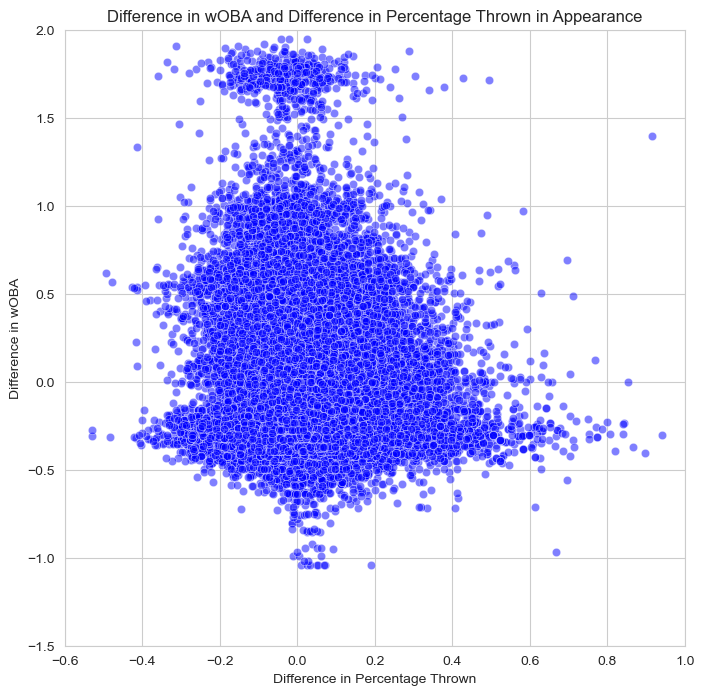

In [240]:
sns.set_style("whitegrid");

f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=appearances, ax=ax);

ax.set_xlim(left=-0.6, right=1);
ax.set_ylim(bottom=-1.5, top=2);

# set title
plt.title("Difference in wOBA and Difference in Percentage Thrown in Appearance");
# set x-axis label 
ax.set_xlabel("Difference in Percentage Thrown");
# set first (left) y-axis label
ax.set_ylabel("Difference in wOBA");

### One Degree Model

In [241]:
# outputs_aps1 = (aps1, coef_pct_diff_aps1, rmse_aps1, r_sq_aps1, adj_r_sq_aps1)
outputs_aps1 = fit_regression_model_degree_one(appearances, 'pct_diff', 'woba_diff')

coefficient of (x_i - mu_i): -0.2778
rmse: 0.3568
r_squared: 0.0091
adj_r_squared: 0.009


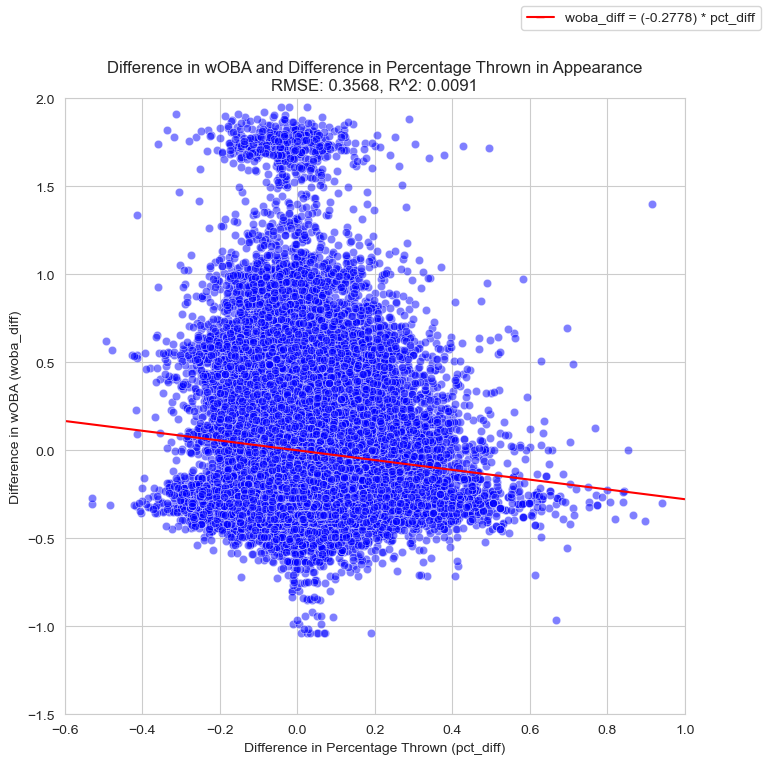

In [242]:
sns.set_style("whitegrid");

f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=appearances, ax=ax);

x_values = np.linspace(-1, 1, 1000)
y_values = outputs_aps1[1] * x_values

sns.lineplot(x=x_values, y=y_values, color='red', ax=ax);

ax.set_xlim(left=-0.6, right=1);
ax.set_ylim(bottom=-1.5, top=2);

# set title
plt.title(f"Difference in wOBA and Difference in Percentage Thrown in Appearance\nRMSE: {round(outputs_aps1[2], 4)}, R^2: {round(outputs_aps1[3], 4)}");
# set x-axis label 
ax.set_xlabel("Difference in Percentage Thrown (pct_diff)");
# set y-axis label
ax.set_ylabel("Difference in wOBA (woba_diff)");

legend_label = f"woba_diff = ({round(outputs_aps1[1], 4)}) * pct_diff"
f.legend(handles=[Line2D([], [], marker='_', color='red', label=legend_label)], loc=1);

### Three Degree Model

In [243]:
# outputs_aps3 = (aps3, coef_pct_diff_3_aps3, coef_pct_diff_2_aps3, coef_pct_diff_1_aps3, 
#                 rmse_aps3, r_sq_aps3, adj_r_sq_aps3)
outputs_aps3 = fit_regression_model_degree_three(appearances, 'pct_diff', 'woba_diff')

coefficient of (x_i - mu_i)^3: 0.3221
coefficient of (x_i - mu_i)^2: -0.1273
coefficient of (x_i - mu_i): -0.2859
rmse: 0.3568
r_squared: 0.0092
adj_r_squared: 0.0091


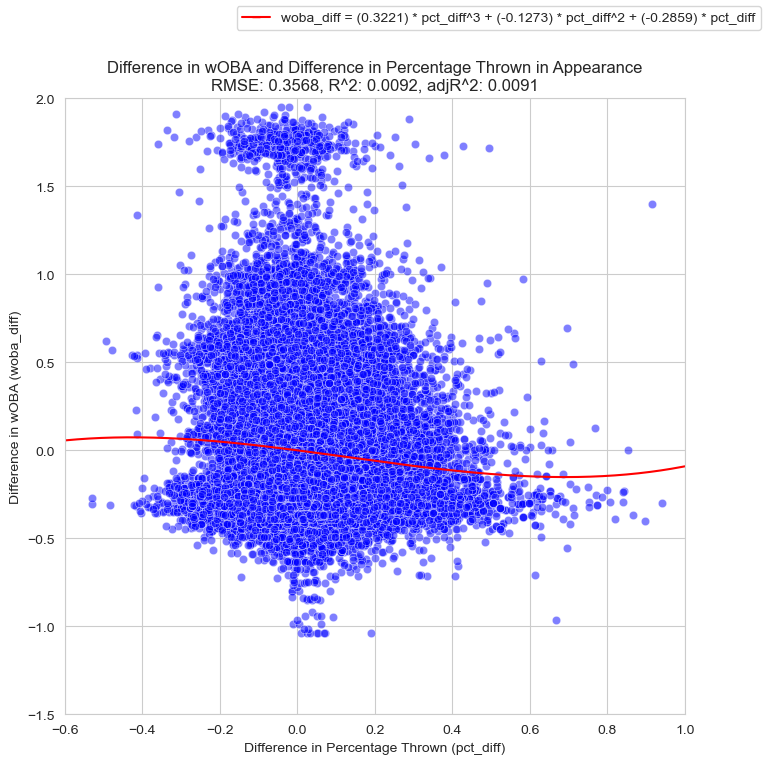

In [244]:
sns.set_style("whitegrid");

f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=appearances, ax=ax);

x_values = np.linspace(-1, 1, 1000)
y_values = outputs_aps3[1] * np.power(x_values, 3) + outputs_aps3[2] * np.power(x_values, 2) + outputs_aps3[3] * x_values

sns.lineplot(x=x_values, y=y_values, color='red', ax=ax);

ax.set_xlim(left=-0.6, right=1);
ax.set_ylim(bottom=-1.5, top=2);

# set title
plt.title(f"Difference in wOBA and Difference in Percentage Thrown in Appearance\nRMSE: {round(outputs_aps3[4], 4)}, R^2: {round(outputs_aps3[5], 4)}, adjR^2: {round(outputs_aps3[6], 4)}");
# set x-axis label 
ax.set_xlabel("Difference in Percentage Thrown (pct_diff)");
# set first (left) y-axis label
ax.set_ylabel("Difference in wOBA (woba_diff)");

legend_label = f"woba_diff = ({round(outputs_aps3[1], 4)}) * pct_diff^3 + ({round(outputs_aps3[2], 4)}) * pct_diff^2 + ({round(outputs_aps3[3], 4)}) * pct_diff"
f.legend(handles=[Line2D([], [], marker='_', color='red', label=legend_label)], loc=1);

### Outliers

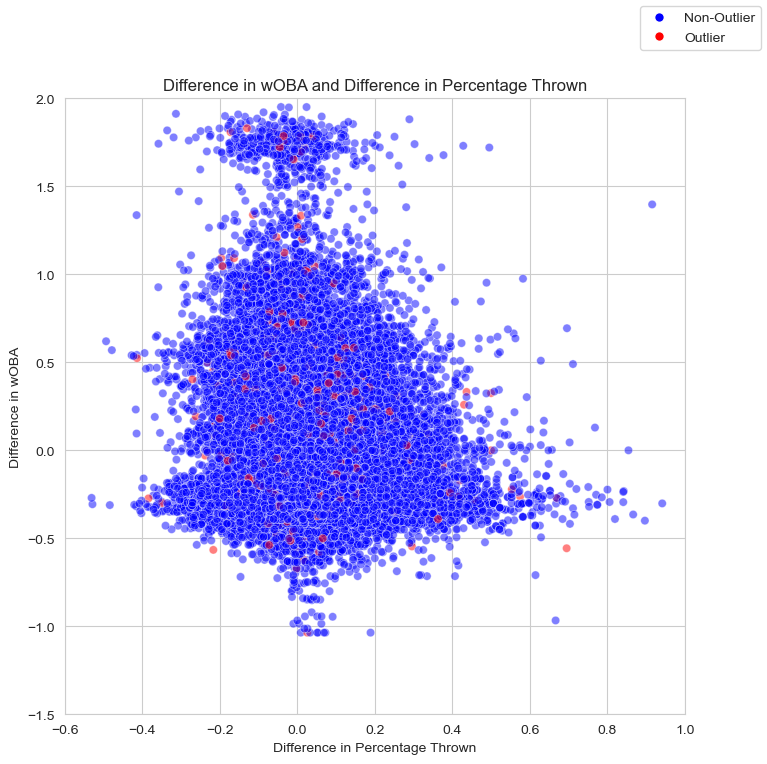

In [245]:
colors = {0: 'blue', 1: 'red'}

sns.set_style("whitegrid");

f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x='pct_diff', y='woba_diff', hue='outlier', alpha=0.5, palette=colors, legend=False, data=appearances, ax=ax);

ax.set_xlim(left=-0.6, right=1);
ax.set_ylim(bottom=-1.5, top=2);

# set title
plt.title("Difference in wOBA and Difference in Percentage Thrown");
# set x-axis label
ax.set_xlabel("Difference in Percentage Thrown");
# set first (left) y-axis label
ax.set_ylabel("Difference in wOBA");

f.legend(handles=[Line2D([], [], marker="o", color='white', label="Non-Outlier", markerfacecolor='blue', markersize=7), 
         Line2D([], [], marker="o", color='white', label="Outlier", markerfacecolor='red', markersize=7)], loc=1);

#### One Degree Model

In [246]:
# outputs_nos1 = (nos1, coef_pct_diff_nos1, rmse_nos1, r_sq_nos1, adj_r_sq_nos1)
outputs_nos1 = fit_regression_model_degree_one(appearances[appearances['outlier'] == 0], 'pct_diff', 'woba_diff')

coefficient of (x_i - mu_i): -0.2785
rmse: 0.3569
r_squared: 0.0091
adj_r_squared: 0.0091


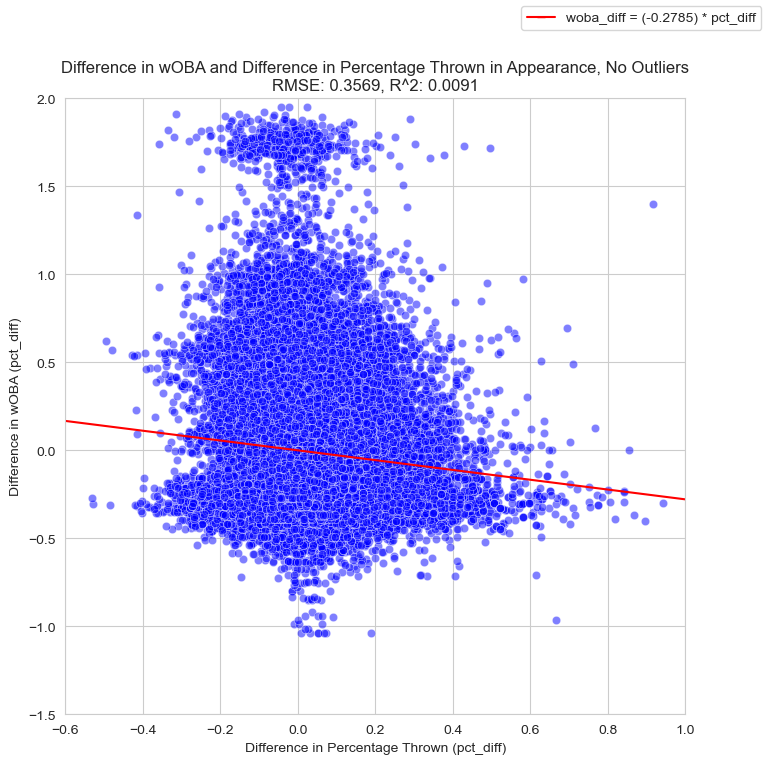

In [247]:
sns.set_style("whitegrid");

f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=appearances[appearances['outlier'] == 0], ax=ax);

x_values = np.linspace(-1, 1, 1000)
y_values = outputs_nos1[1] * x_values

sns.lineplot(x=x_values, y=y_values, color='red', ax=ax);

ax.set_xlim(left=-0.6, right=1);
ax.set_ylim(bottom=-1.5, top=2);

# set title
plt.title(f"Difference in wOBA and Difference in Percentage Thrown in Appearance, No Outliers\nRMSE: {round(outputs_nos1[2], 4)}, R^2: {round(outputs_nos1[3], 4)}");
# set x-axis label
ax.set_xlabel("Difference in Percentage Thrown (pct_diff)");
# set first (left) y-axis label
ax.set_ylabel("Difference in wOBA (pct_diff)");

legend_label = f"woba_diff = ({round(outputs_nos1[1], 4)}) * pct_diff"
f.legend(handles=[Line2D([], [], marker='_', color='red', label=legend_label)], loc=1);

#### Three Degree Model

In [248]:
# outputs_nos3 = (nos3, coef_pct_diff_3_nos3, coef_pct_diff_2_nos3, coef_pct_diff_1_nos3, 
#                 rmse_nos3, r_sq_nos3, adj_r_sq_nos3)
outputs_nos3 = fit_regression_model_degree_three(appearances[appearances['outlier'] == 0], 'pct_diff', 'woba_diff')

coefficient of (x_i - mu_i)^3: 0.4019
coefficient of (x_i - mu_i)^2: -0.1717
coefficient of (x_i - mu_i): -0.2865
rmse: 0.3569
r_squared: 0.0093
adj_r_squared: 0.0092


### Pitch Types

#### One Degree Model

In [249]:
# outputs_appt1 = (appt1, coef_pct_diff_appt1, 
#                  coef_CU_int_appt1, coef_FC_int_appt1, coef_FF_int_appt1, coef_FS_int_appt1, 
#                  coef_KC_int_appt1, coef_SI_int_appt1, coef_SL_int_appt1, coef_ST_int_appt1, 
#                  coef_SV_int_appt1, 
#                  rmse_appt1, r_sq_appt1, adj_r_sq_appt1)
columns = ['pct_diff', 'is_CU', 'is_FC', 'is_FF', 
           'is_FS', 'is_KC', 'is_SI', 'is_SL', 
           'is_ST', 'is_SV']
outputs_appt1 = fit_regression_model_degree_one(appearances, columns, 'woba_diff')

coefficient of (x_i - mu_i): -0.3928
coefficient of (x_i - mu_i) * I_CU: -0.0014
coefficient of (x_i - mu_i) * I_FC: 0.0864
coefficient of (x_i - mu_i) * I_FF: 0.1064
coefficient of (x_i - mu_i) * I_FS: 0.2297
coefficient of (x_i - mu_i) * I_KC: 0.0334
coefficient of (x_i - mu_i) * I_SI: 0.1343
coefficient of (x_i - mu_i) * I_SL: 0.1663
coefficient of (x_i - mu_i) * I_ST: 0.2473
coefficient of (x_i - mu_i) * I_SV: -1.1928
rmse: 0.3567
r_squared: 0.0097
adj_r_squared: 0.0095


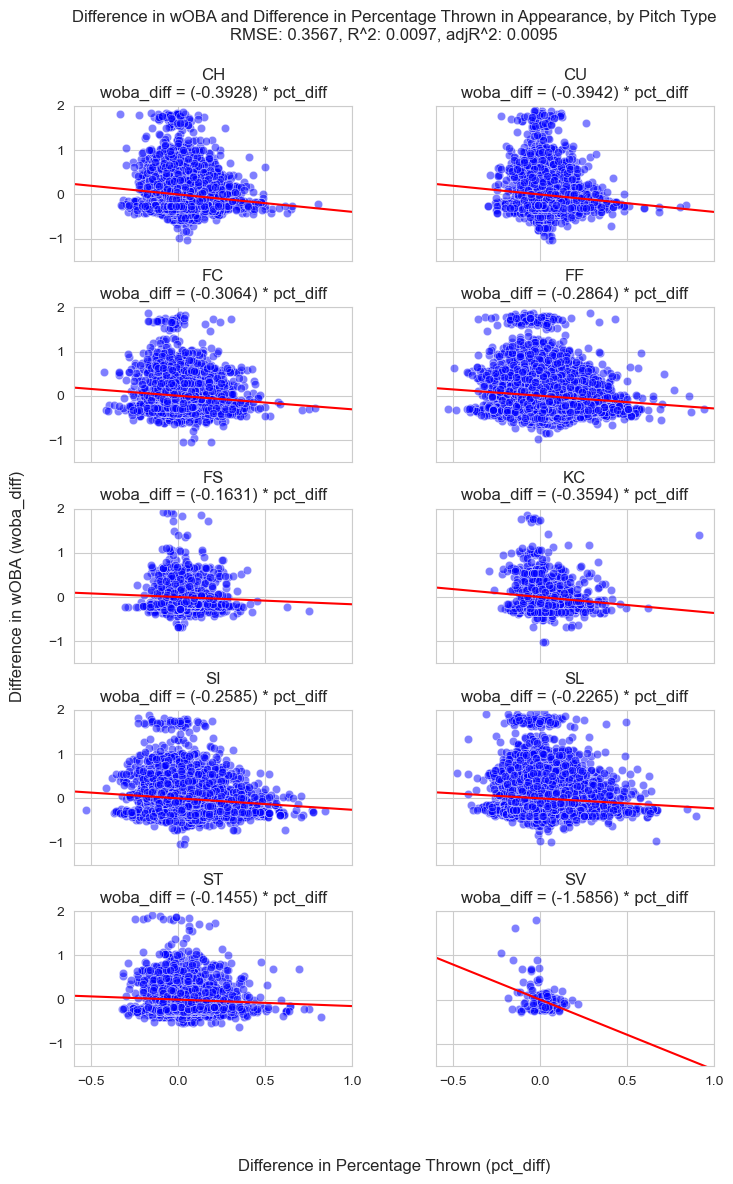

In [250]:
sns.set_style("whitegrid");

f, ax = plt.subplots(5, 2, figsize=(8, 12), sharex=True, sharey=True)
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=appearances[(appearances['is_CU'] == 0) & 
                                                                                       (appearances['is_FC'] == 0) & 
                                                                                       (appearances['is_FF'] == 0) & 
                                                                                       (appearances['is_FS'] == 0) & 
                                                                                       (appearances['is_KC'] == 0) &
                                                                                       (appearances['is_SI'] == 0) &
                                                                                       (appearances['is_SL'] == 0) &
                                                                                       (appearances['is_ST'] == 0) &
                                                                                       (appearances['is_SV'] == 0)], ax=ax[0, 0]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=appearances[appearances['is_CU'] == 1], ax=ax[0, 1]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=appearances[appearances['is_FC'] == 1], ax=ax[1, 0]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=appearances[appearances['is_FF'] == 1], ax=ax[1, 1]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=appearances[appearances['is_FS'] == 1], ax=ax[2, 0]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=appearances[appearances['is_KC'] == 1], ax=ax[2, 1]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=appearances[appearances['is_SI'] == 1], ax=ax[3, 0]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=appearances[appearances['is_SL'] == 1], ax=ax[3, 1]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=appearances[appearances['is_ST'] == 1], ax=ax[4, 0]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=appearances[appearances['is_SV'] == 1], ax=ax[4, 1]);

x_values = np.linspace(-1, 1, 1000)
y_values_CH = outputs_appt1[1] * x_values
y_values_CU = (outputs_appt1[1] + outputs_appt1[2]) * x_values
y_values_FC = (outputs_appt1[1] + outputs_appt1[3]) * x_values
y_values_FF = (outputs_appt1[1] + outputs_appt1[4]) * x_values
y_values_FS = (outputs_appt1[1] + outputs_appt1[5]) * x_values
y_values_KC = (outputs_appt1[1] + outputs_appt1[6]) * x_values
y_values_SI = (outputs_appt1[1] + outputs_appt1[7]) * x_values
y_values_SL = (outputs_appt1[1] + outputs_appt1[8]) * x_values
y_values_ST = (outputs_appt1[1] + outputs_appt1[9]) * x_values
y_values_SV = (outputs_appt1[1] + outputs_appt1[10]) * x_values

sns.lineplot(x=x_values, y=y_values_CH, color='red', ax=ax[0, 0]);
sns.lineplot(x=x_values, y=y_values_CU, color='red', ax=ax[0, 1]);
sns.lineplot(x=x_values, y=y_values_FC, color='red', ax=ax[1, 0]);
sns.lineplot(x=x_values, y=y_values_FF, color='red', ax=ax[1, 1]);
sns.lineplot(x=x_values, y=y_values_FS, color='red', ax=ax[2, 0]);
sns.lineplot(x=x_values, y=y_values_KC, color='red', ax=ax[2, 1]);
sns.lineplot(x=x_values, y=y_values_SI, color='red', ax=ax[3, 0]);
sns.lineplot(x=x_values, y=y_values_SL, color='red', ax=ax[3, 1]);
sns.lineplot(x=x_values, y=y_values_ST, color='red', ax=ax[4, 0]);
sns.lineplot(x=x_values, y=y_values_SV, color='red', ax=ax[4, 1]);

ax[0, 0].set_title(f"CH\nwoba_diff = ({round(outputs_appt1[1], 4)}) * pct_diff");
ax[0, 1].set_title(f"CU\nwoba_diff = ({round((outputs_appt1[1] + outputs_appt1[2]), 4)}) * pct_diff");
ax[1, 0].set_title(f"FC\nwoba_diff = ({round((outputs_appt1[1] + outputs_appt1[3]), 4)}) * pct_diff");
ax[1, 1].set_title(f"FF\nwoba_diff = ({round((outputs_appt1[1] + outputs_appt1[4]), 4)}) * pct_diff");
ax[2, 0].set_title(f"FS\nwoba_diff = ({round((outputs_appt1[1] + outputs_appt1[5]), 4)}) * pct_diff");
ax[2, 1].set_title(f"KC\nwoba_diff = ({round((outputs_appt1[1] + outputs_appt1[6]), 4)}) * pct_diff");
ax[3, 0].set_title(f"SI\nwoba_diff = ({round((outputs_appt1[1] + outputs_appt1[7]), 4)}) * pct_diff");
ax[3, 1].set_title(f"SL\nwoba_diff = ({round((outputs_appt1[1] + outputs_appt1[8]), 4)}) * pct_diff");
ax[4, 0].set_title(f"ST\nwoba_diff = ({round((outputs_appt1[1] + outputs_appt1[9]), 4)}) * pct_diff");
ax[4, 1].set_title(f"SV\nwoba_diff = ({round((outputs_appt1[1] + outputs_appt1[10]), 4)}) * pct_diff");

for i in range(0, 5):
    for j in range(0, 2):
        ax[i, j].set_xlim(left=-0.6, right=1);
        ax[i, j].set_ylim(bottom=-1.5, top=2);


# set title
f.suptitle(f"Difference in wOBA and Difference in Percentage Thrown in Appearance, by Pitch Type\nRMSE: {round(outputs_appt1[11], 4)}, R^2: {round(outputs_appt1[12], 4)}, adjR^2: {round(outputs_appt1[13], 4)}");
# set x-axis label
f.supxlabel("Difference in Percentage Thrown (pct_diff)");
# set y-axis label
f.supylabel("Difference in wOBA (woba_diff)");
for i in range(0, 5):
    for j in range(0, 2):
        # set x-axis label
        ax[i, j].set_xlabel("");
        # set y-axis label
        ax[i, j].set_ylabel("");
        
f.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3);

#### Three Degree Model

In [251]:
columns = ['pct_diff', 'is_CU', 'is_FC', 'is_FF', 
           'is_FS', 'is_KC', 'is_SI', 'is_SL', 
           'is_ST', 'is_SV']
outputs_appt3 = fit_regression_model_degree_three(appearances, columns, 'woba_diff')

coefficient of (x_i - mu_i)^3: -1.0047
coefficient of (x_i - mu_i)^2: 0.8684
coefficient of (x_i - mu_i): -0.4619
coefficient of (x_i - mu_i)^3 * I_pitch_type: 
[1.047, 1.2141, 1.5833, 0.9861, 2.1142, 1.0623, 1.0738, 0.3928, -5.772]
coefficient of (x_i - mu_i)^2 * I_pitch_type: 
[-0.9053, -0.7892, -1.2354, -0.9882, 0.4035, -1.1416, -0.8934, -0.5544, 5.5044]
coefficient of (x_i - mu_i) * I_pitch_type: 
[0.0707, 0.1274, 0.1736, 0.3222, -0.2914, 0.2501, 0.2333, 0.3204, -0.9818]
rmse: 0.3564
r_squared: 0.0108
adj_r_squared: 0.0103


### Usage Rank

#### All Usage Ranks

##### One Degree Model

In [252]:
# outputs_appu1 = (appu1, coef_pct_diff_appu1, 
#                  coef_second_int_appu1, coef_third_int_appu1, coef_fourth_int_appu1, coef_fifth_int_appu1, 
#                  coef_sixth_int_appu1, coef_seventh_int_appu1, coef_eighth_int_appu1, 
#                  rmse_appu1, r_sq_appu1, adj_r_sq_appu1)
columns = ['pct_diff', 'is_second', 'is_third', 'is_fourth', 
           'is_fifth', 'is_sixth', 'is_seventh', 'is_eighth']
outputs_appu1 = fit_regression_model_degree_one(appearances, columns, 'woba_diff')

coefficient of (x_i - mu_i): -0.2455
coefficient of (x_i - mu_i) * J_second: -0.0565
coefficient of (x_i - mu_i) * J_third: -0.0265
coefficient of (x_i - mu_i) * J_fourth: -0.1082
coefficient of (x_i - mu_i) * J_fifth: -0.147
coefficient of (x_i - mu_i) * J_sixth: -0.0338
coefficient of (x_i - mu_i) * J_seventh: 0.212
coefficient of (x_i - mu_i) * J_eighth: -0.187
rmse: 0.3567
r_squared: 0.0092
adj_r_squared: 0.0091


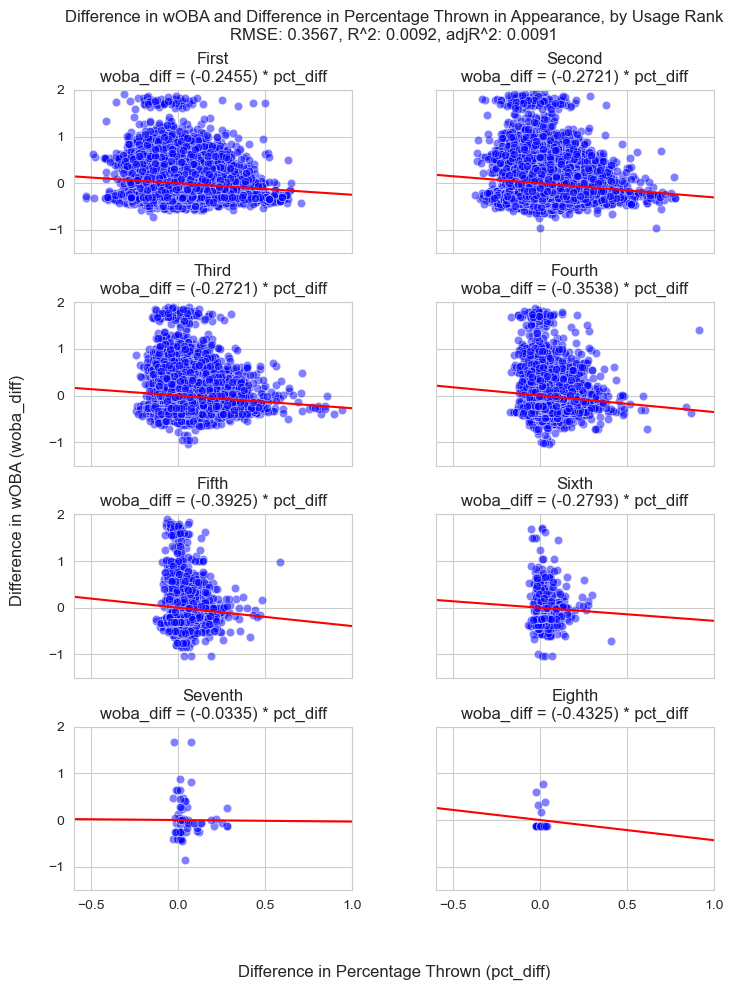

In [253]:
sns.set_style("whitegrid");

f, ax = plt.subplots(4, 2, figsize=(8, 10), sharex=True, sharey=True)
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=appearances[(appearances['is_second'] == 0) & 
                                                                                       (appearances['is_third'] == 0) & 
                                                                                       (appearances['is_fourth'] == 0) & 
                                                                                       (appearances['is_fifth'] == 0) & 
                                                                                       (appearances['is_sixth'] == 0) &
                                                                                       (appearances['is_seventh'] == 0) &
                                                                                       (appearances['is_eighth'] == 0)], ax=ax[0, 0]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=appearances[appearances['is_second'] == 1], ax=ax[0, 1]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=appearances[appearances['is_third'] == 1], ax=ax[1, 0]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=appearances[appearances['is_fourth'] == 1], ax=ax[1, 1]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=appearances[appearances['is_fifth'] == 1], ax=ax[2, 0]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=appearances[appearances['is_sixth'] == 1], ax=ax[2, 1]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=appearances[appearances['is_seventh'] == 1], ax=ax[3, 0]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=appearances[appearances['is_eighth'] == 1], ax=ax[3, 1]);

x_values = np.linspace(-1, 1, 1000)
y_values_first = outputs_appu1[1] * x_values
y_values_second = (outputs_appu1[1] + outputs_appu1[2]) * x_values
y_values_third = (outputs_appu1[1] + outputs_appu1[3]) * x_values
y_values_fourth = (outputs_appu1[1] + outputs_appu1[4]) * x_values
y_values_fifth = (outputs_appu1[1] + outputs_appu1[5]) * x_values
y_values_sixth = (outputs_appu1[1] + outputs_appu1[6]) * x_values
y_values_seventh = (outputs_appu1[1] + outputs_appu1[7]) * x_values
y_values_eighth = (outputs_appu1[1] + outputs_appu1[8]) * x_values

sns.lineplot(x=x_values, y=y_values_first, color='red', ax=ax[0, 0]);
sns.lineplot(x=x_values, y=y_values_second, color='red', ax=ax[0, 1]);
sns.lineplot(x=x_values, y=y_values_third, color='red', ax=ax[1, 0]);
sns.lineplot(x=x_values, y=y_values_fourth, color='red', ax=ax[1, 1]);
sns.lineplot(x=x_values, y=y_values_fifth, color='red', ax=ax[2, 0]);
sns.lineplot(x=x_values, y=y_values_sixth, color='red', ax=ax[2, 1]);
sns.lineplot(x=x_values, y=y_values_seventh, color='red', ax=ax[3, 0]);
sns.lineplot(x=x_values, y=y_values_eighth, color='red', ax=ax[3, 1]);

ax[0, 0].set_title(f"First\nwoba_diff = ({round(outputs_appu1[1], 4)}) * pct_diff");
ax[0, 1].set_title(f"Second\nwoba_diff = ({round((outputs_appu1[1] + outputs_appu1[3]), 4)}) * pct_diff");
ax[1, 0].set_title(f"Third\nwoba_diff = ({round((outputs_appu1[1] + outputs_appu1[3]), 4)}) * pct_diff");
ax[1, 1].set_title(f"Fourth\nwoba_diff = ({round((outputs_appu1[1] + outputs_appu1[4]), 4)}) * pct_diff");
ax[2, 0].set_title(f"Fifth\nwoba_diff = ({round((outputs_appu1[1] + outputs_appu1[5]), 4)}) * pct_diff");
ax[2, 1].set_title(f"Sixth\nwoba_diff = ({round((outputs_appu1[1] + outputs_appu1[6]), 4)}) * pct_diff");
ax[3, 0].set_title(f"Seventh\nwoba_diff = ({round((outputs_appu1[1] + outputs_appu1[7]), 4)}) * pct_diff");
ax[3, 1].set_title(f"Eighth\nwoba_diff = ({round((outputs_appu1[1] + outputs_appu1[8]), 4)}) * pct_diff");

for i in range(0, 4):
    for j in range(0, 2):
        ax[i, j].set_xlim(left=-0.6, right=1);
        ax[i, j].set_ylim(bottom=-1.5, top=2);

# set title
f.suptitle(f"Difference in wOBA and Difference in Percentage Thrown in Appearance, by Usage Rank\nRMSE: {round(outputs_appu1[9], 4)}, R^2: {round(outputs_appu1[10], 4)}, adjR^2: {round(outputs_appu1[11], 4)}");
# set x-axis label
f.supxlabel("Difference in Percentage Thrown (pct_diff)");
# set y-axis label
f.supylabel("Difference in wOBA (woba_diff)");
for i in range(0, 4):
    for j in range(0, 2):
        # set x-axis label
        ax[i, j].set_xlabel("");
        # set y-axis label
        ax[i, j].set_ylabel("");        

f.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3);

##### Three Degree Model

In [254]:
columns = ['pct_diff', 'is_second', 'is_third', 'is_fourth', 
           'is_fifth', 'is_sixth', 'is_seventh', 'is_eighth']
outputs_appu3 = fit_regression_model_degree_three(appearances, columns, 'woba_diff')

coefficient of (x_i - mu_i)^3: 0.477
coefficient of (x_i - mu_i)^2: -0.461
coefficient of (x_i - mu_i): -0.2337
coefficient of (x_i - mu_i)^3 * J_use: 
[-0.9248, -1.6547, -3.5841, -4.9346, -49.9605, -37.0874, -7153.4914]
coefficient of (x_i - mu_i)^2 * J_use: 
[0.7036, 1.6134, 4.196, 5.1464, 21.5756, 12.7297, 83.3754]
coefficient of (x_i - mu_i) * J_use: 
[-0.0698, -0.1922, -0.6846, -0.7909, -1.6218, -0.5233, 4.1737]
rmse: 0.3563
r_squared: 0.0116
adj_r_squared: 0.0112


#### Combined Usage Ranks

##### One Degree Model

In [255]:
# outputs_appuc1 = (appuc1, coef_pct_diff_appuc1, 
#                   coef_second_int_appuc1, coef_third_int_appuc1, coef_fourth_to_eighth_int_appuc1, 
#                   rmse_appuc1, r_sq_appuc1, adj_r_sq_appuc1)
columns = ['pct_diff', 'is_second', 'is_third', 'is_fourth_to_eighth']
outputs_appuc1 = fit_regression_model_degree_one(appearances, columns, 'woba_diff')

coefficient of (x_i - mu_i): -0.2455
coefficient of (x_i - mu_i) * J_second: -0.0565
coefficient of (x_i - mu_i) * J_third: -0.0265
coefficient of (x_i - mu_i) * J_fourth_to_eighth: -0.1112
rmse: 0.3567
r_squared: 0.0092
adj_r_squared: 0.0091


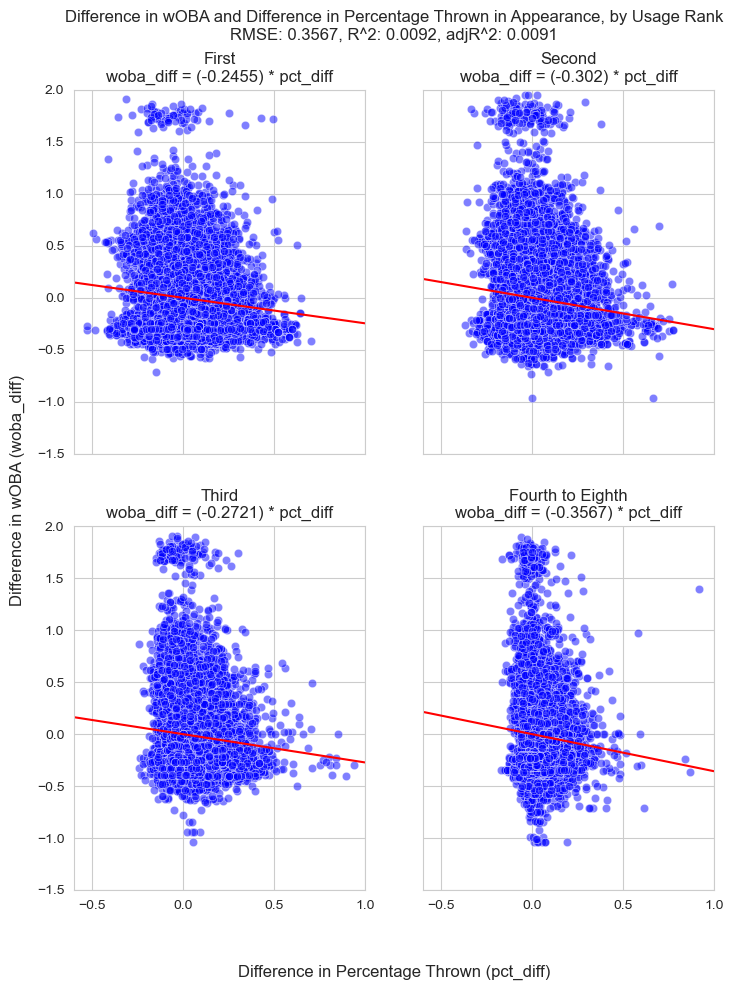

In [256]:
sns.set_style("whitegrid");

f, ax = plt.subplots(2, 2, figsize=(8, 10), sharex=True, sharey=True)
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=appearances[(appearances['is_second'] == 0) & 
                                                                                       (appearances['is_third'] == 0) & 
                                                                                       (appearances['is_fourth_to_eighth'] == 0)], ax=ax[0, 0]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=appearances[appearances['is_second'] == 1], ax=ax[0, 1]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=appearances[appearances['is_third'] == 1], ax=ax[1, 0]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=appearances[appearances['is_fourth_to_eighth'] == 1], ax=ax[1, 1]);

x_values = np.linspace(-1, 1, 1000)
y_values_first = outputs_appuc1[1] * x_values
y_values_second = (outputs_appuc1[1] + outputs_appuc1[2]) * x_values
y_values_third = (outputs_appuc1[1] + outputs_appuc1[3]) * x_values
y_values_fourth_to_eighth = (outputs_appuc1[1] + outputs_appuc1[4]) * x_values

sns.lineplot(x=x_values, y=y_values_first, color='red', ax=ax[0, 0]);
sns.lineplot(x=x_values, y=y_values_second, color='red', ax=ax[0, 1]);
sns.lineplot(x=x_values, y=y_values_third, color='red', ax=ax[1, 0]);
sns.lineplot(x=x_values, y=y_values_fourth_to_eighth, color='red', ax=ax[1, 1]);

ax[0, 0].set_title(f"First\nwoba_diff = ({round(outputs_appuc1[1], 4)}) * pct_diff");
ax[0, 1].set_title(f"Second\nwoba_diff = ({round((outputs_appuc1[1] + outputs_appuc1[2]), 4)}) * pct_diff");
ax[1, 0].set_title(f"Third\nwoba_diff = ({round((outputs_appuc1[1] + outputs_appuc1[3]), 4)}) * pct_diff");
ax[1, 1].set_title(f"Fourth to Eighth\nwoba_diff = ({round((outputs_appuc1[1] + outputs_appuc1[4]), 4)}) * pct_diff");

for i in range(0, 2):
    for j in range(0, 2):
        ax[i, j].set_xlim(left=-0.6, right=1);
        ax[i, j].set_ylim(bottom=-1.5, top=2);

# set title
f.suptitle(f"Difference in wOBA and Difference in Percentage Thrown in Appearance, by Usage Rank\nRMSE: {round(outputs_appuc1[5], 4)}, R^2: {round(outputs_appuc1[6], 4)}, adjR^2: {round(outputs_appuc1[7], 4)}");
# set x-axis label
f.supxlabel("Difference in Percentage Thrown (pct_diff)");
# set y-axis label
f.supylabel("Difference in wOBA (woba_diff)");
for i in range(0, 2):
    for j in range(0, 2):
        # set x-axis label
        ax[i, j].set_xlabel("");
        # set y-axis label
        ax[i, j].set_ylabel("");        

f.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2);

##### Three Degree Model

In [257]:
columns = ['pct_diff', 'is_second', 'is_third', 'is_fourth_to_eighth']
outputs_appuc3 = fit_regression_model_degree_three(appearances, columns, 'woba_diff')

coefficient of (x_i - mu_i)^3: 0.477
coefficient of (x_i - mu_i)^2: -0.461
coefficient of (x_i - mu_i): -0.2337
coefficient of (x_i - mu_i)^3 * J_use: 
[-0.9248, -1.6547, -3.7658]
coefficient of (x_i - mu_i)^2 * J_use: 
[0.7036, 1.6134, 4.3371]
coefficient of (x_i - mu_i) * J_use: 
[-0.0698, -0.1922, -0.6935]
rmse: 0.3563
r_squared: 0.0114
adj_r_squared: 0.0112


### Pitch Types and Usage Rank

#### All Usage Ranks

##### One Degree Model

In [258]:
# outputs_apptpu1 = (apptpu1, coef_pct_diff_apptpu1, 
#                    coef_CU_int_apptpu1, coef_FC_int_apptpu1, coef_FF_int_apptpu1, coef_FS_int_apptpu1, 
#                    coef_KC_int_apptpu1, coef_SI_int_apptpu1, coef_SL_int_apptpu1, coef_ST_int_apptpu1,
#                    coef_SV_int_apptpu1,
#                    coef_second_int_apptpu1, coef_third_int_apptpu1, coef_fourth_int_apptpu1, coef_fifth_int_apptpu1,
#                    coef_sixth_int_apptpu1, coef_seventh_int_appt_pu1, coef_eighth_int_apptpu1,
#                    coefs_CU_use_int_apptpu1, coefs_FC_use_int_apptpu1, coefs_FF_use_int_apptpu1, coefs_FS_use_int_apptpu1, 
#                    coefs_KC_use_int_apptpu1, coefs_SI_use_int_apptpu1, coefs_SL_use_int_apptpu1, coefs_ST_use_int_apptpu1,
#                    coefs_SV_use_int_apptpu1,
#                    rmse_apptpu1, r_sq_apptpu1, adj_r_sq_apptpu1)
columns = ['pct_diff', 'is_CU', 'is_FC', 'is_FF', 
           'is_FS', 'is_KC', 'is_SI', 'is_SL', 
           'is_ST', 'is_SV', 'is_second', 'is_third', 
           'is_fourth', 'is_fifth', 'is_sixth', 'is_seventh', 
           'is_eighth']
outputs_apptpu1 = fit_regression_model_degree_one(appearances, columns, 'woba_diff')

coefficient of (x_i - mu_i): -0.2448
coefficient of (x_i - mu_i) * I_CU: -0.0017
coefficient of (x_i - mu_i) * I_FC: -0.0404
coefficient of (x_i - mu_i) * I_FF: -0.0151
coefficient of (x_i - mu_i) * I_FS: -0.5858
coefficient of (x_i - mu_i) * I_KC: 0.2567
coefficient of (x_i - mu_i) * I_SI: -0.0342
coefficient of (x_i - mu_i) * I_SL: 0.0771
coefficient of (x_i - mu_i) * I_ST: 0.0621
coefficient of (x_i - mu_i) * I_SV: -2.0128
coefficient of (x_i - mu_i) * J_second: -0.2723
coefficient of (x_i - mu_i) * J_third: -0.0735
coefficient of (x_i - mu_i) * J_fourth: -0.269
coefficient of (x_i - mu_i) * J_fifth: -0.0353
coefficient of (x_i - mu_i) * J_sixth: -0.6562
coefficient of (x_i - mu_i) * J_seventh: 1.393
coefficient of (x_i - mu_i) * J_eighth: -0.2222
coefficient of (x_i - mu_i) * I_CU * J_use: 
[0.125, -0.0495, 0.0855, -0.7288, 0.2804, -1.7269, -0.0]
coefficient of (x_i - mu_i) * I_FC * J_use: 
[0.2449, 0.1148, 0.1092, -0.356, 0.805, -0.9638, -0.0]
coefficient of (x_i - mu_i) * I_FF * 

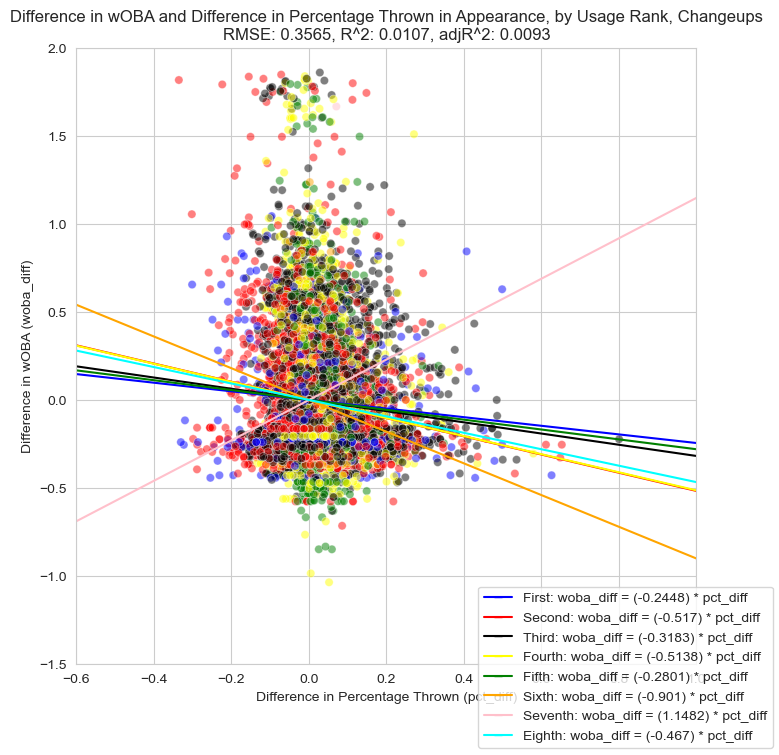

In [259]:
colors = {'first': 'blue', 'second': 'red', 'third': 'black', 'fourth': 'yellow', 
          'fifth': 'green', 'sixth': 'orange', 'seventh': 'pink', 'eighth': 'cyan'}

sns.set_style("whitegrid");

f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x='pct_diff', y='woba_diff', hue='use', alpha=0.5, palette=colors, legend=False, data=appearances[(appearances['is_CU'] == 0) & 
                                                                                       (appearances['is_FC'] == 0) & 
                                                                                       (appearances['is_FF'] == 0) & 
                                                                                       (appearances['is_FS'] == 0) & 
                                                                                       (appearances['is_KC'] == 0) &
                                                                                       (appearances['is_SI'] == 0) &
                                                                                       (appearances['is_SL'] == 0) &
                                                                                       (appearances['is_ST'] == 0) &
                                                                                       (appearances['is_SV'] == 0)], ax=ax);

x_values = np.linspace(-1, 1, 1000)
y_values_first = outputs_apptpu1[1] * x_values
y_values_second = (outputs_apptpu1[1] + outputs_apptpu1[11]) * x_values
y_values_third = (outputs_apptpu1[1] + outputs_apptpu1[12]) * x_values
y_values_fourth = (outputs_apptpu1[1] + outputs_apptpu1[13]) * x_values
y_values_fifth = (outputs_apptpu1[1] + outputs_apptpu1[14]) * x_values
y_values_sixth = (outputs_apptpu1[1] + outputs_apptpu1[15]) * x_values
y_values_seventh = (outputs_apptpu1[1] + outputs_apptpu1[16]) * x_values
y_values_eighth = (outputs_apptpu1[1] + outputs_apptpu1[17]) * x_values

sns.lineplot(x=x_values, y=y_values_first, color='blue', ax=ax);
sns.lineplot(x=x_values, y=y_values_second, color='red', ax=ax);
sns.lineplot(x=x_values, y=y_values_third, color='black', ax=ax);
sns.lineplot(x=x_values, y=y_values_fourth, color='yellow', ax=ax);
sns.lineplot(x=x_values, y=y_values_fifth, color='green', ax=ax);
sns.lineplot(x=x_values, y=y_values_sixth, color='orange', ax=ax);
sns.lineplot(x=x_values, y=y_values_seventh, color='pink', ax=ax);
sns.lineplot(x=x_values, y=y_values_eighth, color='cyan', ax=ax);

ax.set_xlim(left=-0.6, right=1);
ax.set_ylim(bottom=-1.5, top=2);

# set title
plt.title(f"Difference in wOBA and Difference in Percentage Thrown in Appearance, by Usage Rank, Changeups\nRMSE: {round(outputs_apptpu1[27], 4)}, R^2: {round(outputs_apptpu1[28], 4)}, adjR^2: {round(outputs_apptpu1[29], 4)}");
# set x-axis label
ax.set_xlabel("Difference in Percentage Thrown (pct_diff)");
# set first (left) y-axis label
ax.set_ylabel("Difference in wOBA (woba_diff)");

legend_label_first = f"First: woba_diff = ({round(outputs_apptpu1[1], 4)}) * pct_diff"
legend_label_second = f"Second: woba_diff = ({round((outputs_apptpu1[1] + outputs_apptpu1[11]), 4)}) * pct_diff"
legend_label_third = f"Third: woba_diff = ({round((outputs_apptpu1[1] + outputs_apptpu1[12]), 4)}) * pct_diff"
legend_label_fourth = f"Fourth: woba_diff = ({round((outputs_apptpu1[1] + outputs_apptpu1[13]), 4)}) * pct_diff"
legend_label_fifth = f"Fifth: woba_diff = ({round((outputs_apptpu1[1] + outputs_apptpu1[14]), 4)}) * pct_diff"
legend_label_sixth = f"Sixth: woba_diff = ({round((outputs_apptpu1[1] + outputs_apptpu1[15]), 4)}) * pct_diff"
legend_label_seventh = f"Seventh: woba_diff = ({round((outputs_apptpu1[1] + outputs_apptpu1[16]), 4)}) * pct_diff"
legend_label_eighth = f"Eighth: woba_diff = ({round((outputs_apptpu1[1] + outputs_apptpu1[17]), 4)}) * pct_diff"
f.legend(handles=[Line2D([], [], marker='_', color='blue', label=legend_label_first), 
                  Line2D([], [], marker='_', color='red', label=legend_label_second), 
                  Line2D([], [], marker='_', color='black', label=legend_label_third), 
                  Line2D([], [], marker='_', color='yellow', label=legend_label_fourth), 
                  Line2D([], [], marker='_', color='green', label=legend_label_fifth), 
                  Line2D([], [], marker='_', color='orange', label=legend_label_sixth), 
                  Line2D([], [], marker='_', color='pink', label=legend_label_seventh), 
                  Line2D([], [], marker='_', color='cyan', label=legend_label_eighth)], loc=4);

##### Three Degree Model

In [260]:
columns = ['pct_diff', 'is_CU', 'is_FC', 'is_FF', 
           'is_FS', 'is_KC', 'is_SI', 'is_SL', 
           'is_ST', 'is_SV', 'is_second', 'is_third', 
           'is_fourth', 'is_fifth', 'is_sixth', 'is_seventh', 
           'is_eighth']
outputs_apptpu3 = fit_regression_model_degree_three(appearances, columns, 'woba_diff')

coefficient of (x_i - mu_i)^3: 1.182
coefficient of (x_i - mu_i)^2: -0.4206
coefficient of (x_i - mu_i): -0.2902
coefficient of (x_i - mu_i)^3 * I_pitch_type: 
[-0.8868, -0.3044, -0.5351, -1.2551, -1.6613, -0.8292, -0.8884, -1.9262, 103.0547]
coefficient of (x_i - mu_i)^2 * I_pitch_type: 
[-0.6807, -0.1441, -0.1508, 3.1478, 1.5585, -0.1547, 0.2461, 0.5775, 2.683]
coefficient of (x_i - mu_i) * I_pitch_type: 
[0.2078, -0.0224, 0.0339, -0.3326, 0.1708, 0.0573, 0.1189, 0.1608, -1.6244]
coefficient of (x_i - mu_i)^3 * J_use: 
[103.0547, -2.8322, -2.0057, -9.5703, -48.1538, 7.2219, -3846.2094]
coefficient of (x_i - mu_i)^2 * J_use: 
[2.683, 1.4815, 1.0407, 6.1626, 19.8523, -8.5294, 463.5035]
coefficient of (x_i - mu_i) * J_use: 
[-1.6244, -0.2322, -0.092, -0.7623, -1.2436, -0.0473, -2.0206]
coefficient of (x_i - mu_i)^3 * I_pitch_type * J_use: 
[[0.0, 2.8357, -0.8313, 4.5788, 58.9703, -133.6227, 15013.6089], [0.0, 1.4677, -1.2055, -8.4386, -46.9971, 25.4276, 4159.6913], [0.0, 1.6907, 1.0944,

#### Combined Usage Ranks

##### One Degree Model

In [261]:
# outputs_apptpuc1 = (apptpuc1, coef_pct_diff_apptpuc1, 
#                    coef_CU_int_apptpuc1, coef_FC_int_apptpuc1, coef_FF_int_apptpuc1, coef_FS_int_apptpuc1, 
#                    coef_KC_int_apptpuc1, coef_SI_int_apptpuc1, coef_SL_int_apptpuc1, coef_ST_int_apptpuc1,
#                    coef_SV_int_apptpuc1,
#                    coef_second_int_apptpuc1, coef_third_int_apptpuc1, coef_fourth_int_apptpuc1, coef_fifth_int_apptpuc1,
#                    coef_sixth_int_apptpuc1, coef_seventh_int_appt_puc1, coef_eighth_int_apptpuc1,
#                    coefs_CU_use_int_apptpuc1, coefs_FC_use_int_apptpuc1, coefs_FF_use_int_apptpuc1, coefs_FS_use_int_apptpuc1, 
#                    coefs_KC_use_int_apptpuc1, coefs_SI_use_int_apptpuc1, coefs_SL_use_int_apptpuc1, coefs_ST_use_int_apptpuc1,
#                    coefs_SV_use_int_apptpuc1,
#                    rmse_apptpuc1, r_sq_apptpuc1, adj_r_sq_apptpuc1)
columns = ['pct_diff', 'is_CU', 'is_FC', 'is_FF', 
           'is_FS', 'is_KC', 'is_SI', 'is_SL', 
           'is_ST', 'is_SV', 'is_second', 'is_third', 
           'is_fourth_to_eighth']
outputs_apptpuc1 = fit_regression_model_degree_one(appearances, columns, 'woba_diff')

coefficient of (x_i - mu_i): -0.2448
coefficient of (x_i - mu_i) * I_CU: -0.0017
coefficient of (x_i - mu_i) * I_FC: -0.0404
coefficient of (x_i - mu_i) * I_FF: -0.0151
coefficient of (x_i - mu_i) * I_FS: -0.5858
coefficient of (x_i - mu_i) * I_KC: 0.2567
coefficient of (x_i - mu_i) * I_SI: -0.0342
coefficient of (x_i - mu_i) * I_SL: 0.0771
coefficient of (x_i - mu_i) * I_ST: 0.0621
coefficient of (x_i - mu_i) * I_SV: -2.0128
coefficient of (x_i - mu_i) * J_second: -0.2723
coefficient of (x_i - mu_i) * J_third: -0.0735
coefficient of (x_i - mu_i) * J_fourth_to_eighth: -0.2176
coefficient of (x_i - mu_i) * I_CU * J_use: 
[0.125, -0.0495, -0.0947]
coefficient of (x_i - mu_i) * I_FC * J_use: 
[0.2449, 0.1148, 0.0351]
coefficient of (x_i - mu_i) * I_FF * J_use: 
[0.1377, 0.1252, 0.1594]
coefficient of (x_i - mu_i) * I_FS * J_use: 
[1.0105, 0.6494, 0.7547]
coefficient of (x_i - mu_i) * I_KC * J_use: 
[-0.1062, -0.7663, 0.1049]
coefficient of (x_i - mu_i) * I_SI * J_use: 
[0.2351, 0.2096, 0.

##### Three Degree Model

In [262]:
columns = ['pct_diff', 'is_CU', 'is_FC', 'is_FF', 
           'is_FS', 'is_KC', 'is_SI', 'is_SL', 
           'is_ST', 'is_SV', 'is_second', 'is_third', 
           'is_fourth_to_eighth']
outputs_apptpuc3 = fit_regression_model_degree_three(appearances, columns, 'woba_diff')

coefficient of (x_i - mu_i)^3: 0.646
coefficient of (x_i - mu_i)^2: 0.4039
coefficient of (x_i - mu_i): -0.4717
coefficient of (x_i - mu_i)^3 * I_pitch_type: 
[0.2994, 1.9123, 0.0651, -3.5182, -0.0929, -0.6023, -0.2167, -1.5602, 31.2549]
coefficient of (x_i - mu_i)^2 * I_pitch_type: 
[-1.0948, -0.6094, -0.9308, 0.7051, 1.6405, -0.8901, -0.5537, -0.166, 0.9629]
coefficient of (x_i - mu_i) * I_pitch_type: 
[0.0979, 0.0056, 0.2072, 0.0845, -0.2911, 0.2626, 0.27, 0.3631, -0.8078]
coefficient of (x_i - mu_i)^3 * J_use: 
[31.2549, -2.2962, -1.4697]
coefficient of (x_i - mu_i)^2 * J_use: 
[0.9629, 0.657, 0.2162]
coefficient of (x_i - mu_i) * J_use: 
[-0.8078, -0.0507, 0.0896]
coefficient of (x_i - mu_i)^3 * I_pitch_type * J_use: 
[[0.0, 1.6495, -2.0175], [0.0, -0.749, -3.4222], [0.0, 1.0905, 0.4942], [0.0, 5.1205, 9.0], [0.0, -0.3406, -3.2127], [0.0, 1.6038, 1.4699], [0.0, 1.779, -1.9332], [0.0, 2.8047, 0.9584], [31.2549, -121.1948, 0.0]]
coefficient of (x_i - mu_i)^2 * I_pitch_type * J_use: 

## Samples

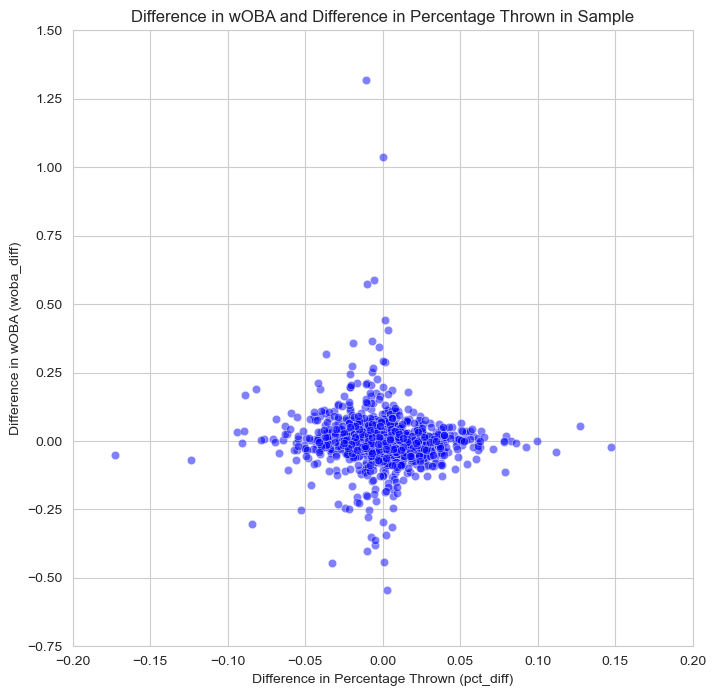

In [263]:
sns.set_style("whitegrid");

f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=samples, ax=ax);

ax.set_xlim(left=-0.2, right=0.2);
ax.set_ylim(bottom=-0.75, top=1.5);

# set title
plt.title("Difference in wOBA and Difference in Percentage Thrown in Sample");
# set x-axis label
ax.set_xlabel("Difference in Percentage Thrown (pct_diff)");
# set first (left) y-axis label
ax.set_ylabel("Difference in wOBA (woba_diff)");

### One Degree Model

In [264]:
# outputs_sps1 = (sps1, coef_pct_diff_sps1, rmse_sps1, r_sq_sps1, adj_r_sq_sps1)
outputs_sps1 = fit_regression_model_degree_one(samples, 'pct_diff', 'woba_diff')

coefficient of (x_i - mu_i): -0.263
rmse: 0.0929
r_squared: 0.0049
adj_r_squared: 0.0041


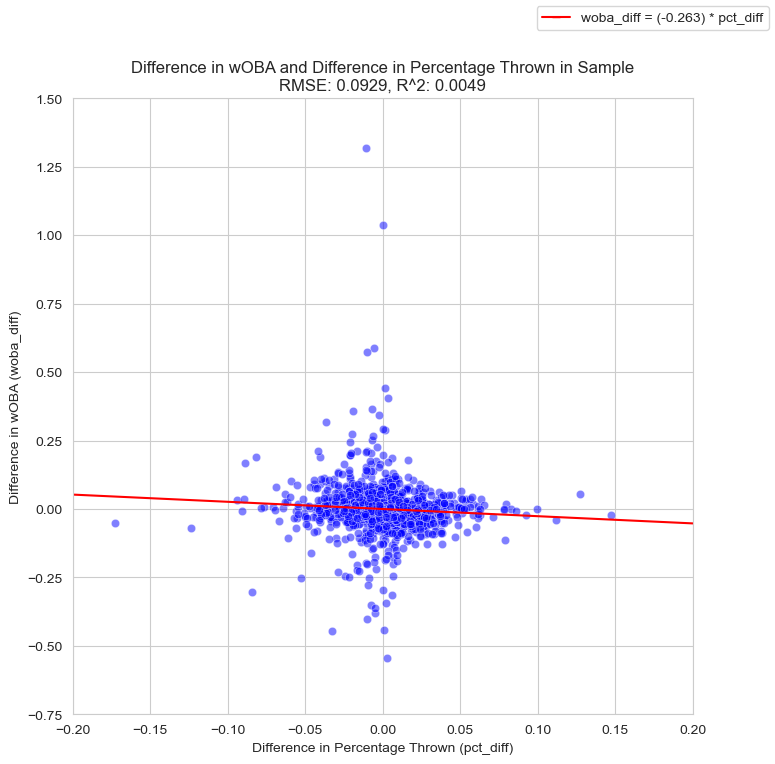

In [265]:
sns.set_style("whitegrid");

f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=samples, ax=ax);

x_values = np.linspace(-1, 1, 1000)
y_values = outputs_sps1[1] * x_values

sns.lineplot(x=x_values, y=y_values, color='red', ax=ax);

ax.set_xlim(left=-0.2, right=0.2);
ax.set_ylim(bottom=-0.75, top=1.5);

# set title
plt.title(f"Difference in wOBA and Difference in Percentage Thrown in Sample\nRMSE: {round(outputs_sps1[2], 4)}, R^2: {round(outputs_sps1[3], 4)}");
# set x-axis label
ax.set_xlabel("Difference in Percentage Thrown (pct_diff)");
# set first (left) y-axis label
ax.set_ylabel("Difference in wOBA (woba_diff)");

legend_label = f"woba_diff = ({round(outputs_sps1[1], 4)}) * pct_diff"
f.legend(handles=[Line2D([], [], marker='_', color='red', label=legend_label)], loc=1);

### Three Degree Model

In [266]:
# outputs_sps3 = (sps3, coef_pct_diff_3_sps3, coef_pct_diff_2_sps3, coef_pct_diff_1_sps3, 
#                 rmse_sps3, r_sq_sps3, adj_r_sq_sps3)
outputs_sps3 = fit_regression_model_degree_three(samples, 'pct_diff', 'woba_diff')

coefficient of (x_i - mu_i)^3: 29.551
coefficient of (x_i - mu_i)^2: -0.2161
coefficient of (x_i - mu_i): -0.4093
rmse: 0.0928
r_squared: 0.0079
adj_r_squared: 0.0055


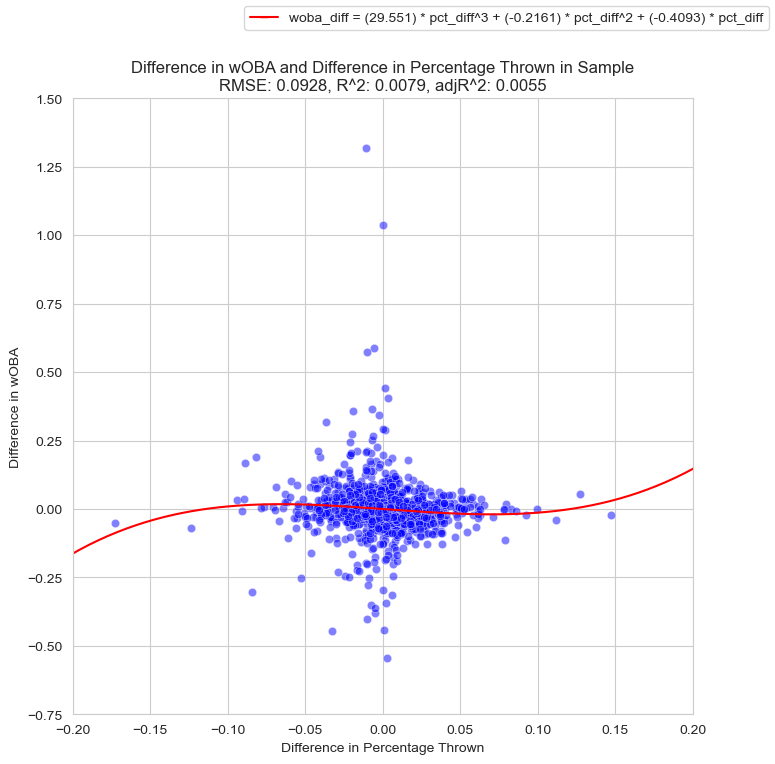

In [267]:
sns.set_style("whitegrid");

f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=samples, ax=ax);

x_values = np.linspace(-1, 1, 1000)
y_values = outputs_sps3[1] * np.power(x_values, 3) + outputs_sps3[2] * np.power(x_values, 2) + outputs_sps3[3] * x_values

sns.lineplot(x=x_values, y=y_values, color='red', ax=ax);

ax.set_xlim(left=-0.2, right=0.2);
ax.set_ylim(bottom=-0.75, top=1.5);

# set title
plt.title(f"Difference in wOBA and Difference in Percentage Thrown in Sample\nRMSE: {round(outputs_sps3[4], 4)}, R^2: {round(outputs_sps3[5], 4)}, adjR^2: {round(outputs_sps3[6], 4)}");
# set x-axis label
ax.set_xlabel("Difference in Percentage Thrown");
# set first (left) y-axis label
ax.set_ylabel("Difference in wOBA");

legend_label = f"woba_diff = ({round(outputs_sps3[1], 4)}) * pct_diff^3 + ({round(outputs_sps3[2], 4)}) * pct_diff^2 + ({round(outputs_sps3[3], 4)}) * pct_diff"
f.legend(handles=[Line2D([], [], marker='_', color='red', label=legend_label)], loc=1);

### Pitch Type

#### One Degree Model

In [268]:
# outputs_sppt1 = (sppt1, coef_pct_diff_sppt1, 
#                  coef_CU_int_sppt1, coef_FC_int_sppt1, coef_FF_int_sppt1, coef_FS_int_sppt1, 
#                  coef_KC_int_sppt1, coef_SI_int_sppt1, coef_SL_int_sppt1, coef_ST_int_sppt1, 
#                  coef_SV_int_sppt1, 
#                  rmse_sppt1, r_sq_sppt1, adj_r_sq_sppt1)
columns = ['pct_diff', 'is_CU', 'is_FC', 'is_FF', 
           'is_FS', 'is_KC', 'is_SI', 'is_SL', 
           'is_ST', 'is_SV']
outputs_sppt1 = fit_regression_model_degree_one(samples, columns, 'woba_diff')

coefficient of (x_i - mu_i): -0.4313
coefficient of (x_i - mu_i) * I_CU: -0.3721
coefficient of (x_i - mu_i) * I_FC: -0.5424
coefficient of (x_i - mu_i) * I_FF: 0.3112
coefficient of (x_i - mu_i) * I_FS: 1.0745
coefficient of (x_i - mu_i) * I_KC: -1.0254
coefficient of (x_i - mu_i) * I_SI: 0.5774
coefficient of (x_i - mu_i) * I_SL: 0.1549
coefficient of (x_i - mu_i) * I_ST: 0.5443
coefficient of (x_i - mu_i) * I_SV: 1.2311
rmse: 0.0923
r_squared: 0.0179
adj_r_squared: 0.0101


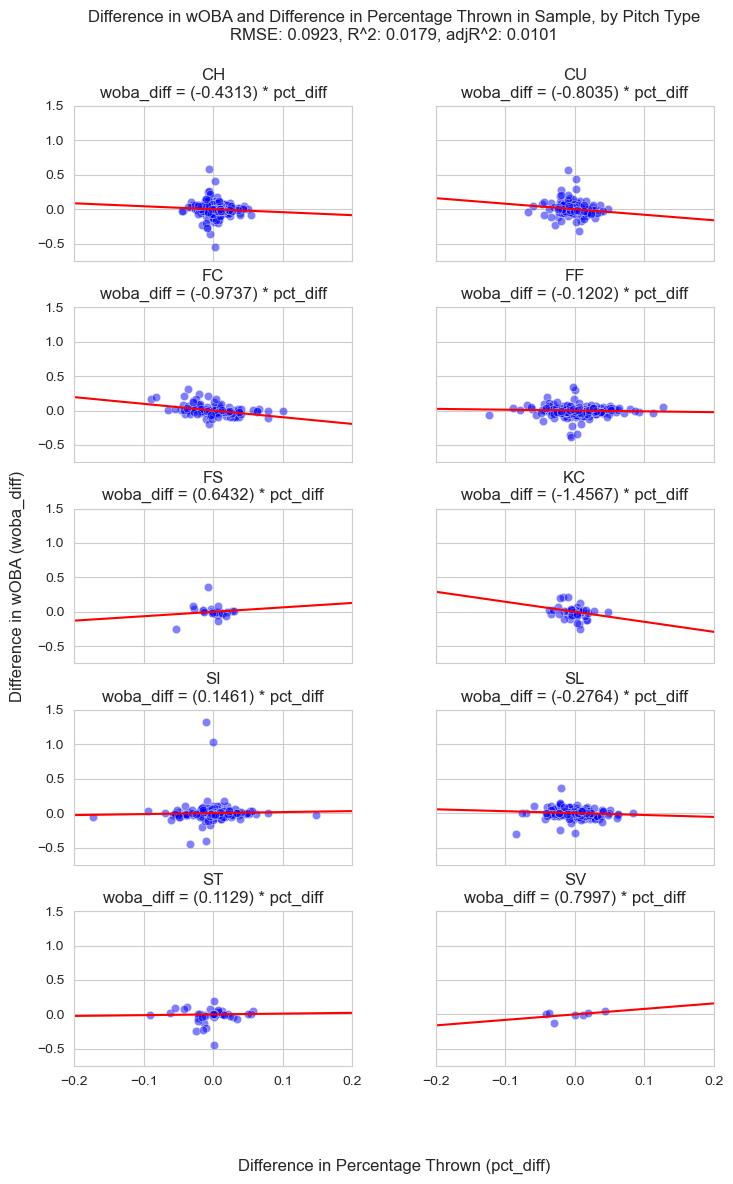

In [269]:
sns.set_style("whitegrid");

f, ax = plt.subplots(5, 2, figsize=(8, 12), sharex=True, sharey=True)
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=samples[(samples['is_CU'] == 0) & 
                                                                                       (samples['is_FC'] == 0) & 
                                                                                       (samples['is_FF'] == 0) & 
                                                                                       (samples['is_FS'] == 0) & 
                                                                                       (samples['is_KC'] == 0) &
                                                                                       (samples['is_SI'] == 0) &
                                                                                       (samples['is_SL'] == 0) &
                                                                                       (samples['is_ST'] == 0) &
                                                                                       (samples['is_SV'] == 0)], ax=ax[0, 0]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=samples[samples['is_CU'] == 1], ax=ax[0, 1]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=samples[samples['is_FC'] == 1], ax=ax[1, 0]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=samples[samples['is_FF'] == 1], ax=ax[1, 1]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=samples[samples['is_FS'] == 1], ax=ax[2, 0]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=samples[samples['is_KC'] == 1], ax=ax[2, 1]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=samples[samples['is_SI'] == 1], ax=ax[3, 0]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=samples[samples['is_SL'] == 1], ax=ax[3, 1]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=samples[samples['is_ST'] == 1], ax=ax[4, 0]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=samples[samples['is_SV'] == 1], ax=ax[4, 1]);

x_values = np.linspace(-1, 1, 1000)
y_values_CH = outputs_sppt1[1] * x_values
y_values_CU = (outputs_sppt1[1] + outputs_sppt1[2]) * x_values
y_values_FC = (outputs_sppt1[1] + outputs_sppt1[3]) * x_values
y_values_FF = (outputs_sppt1[1] + outputs_sppt1[4]) * x_values
y_values_FS = (outputs_sppt1[1] + outputs_sppt1[5]) * x_values
y_values_KC = (outputs_sppt1[1] + outputs_sppt1[6]) * x_values
y_values_SI = (outputs_sppt1[1] + outputs_sppt1[7]) * x_values
y_values_SL = (outputs_sppt1[1] + outputs_sppt1[8]) * x_values
y_values_ST = (outputs_sppt1[1] + outputs_sppt1[9]) * x_values
y_values_SV = (outputs_sppt1[1] + outputs_sppt1[10]) * x_values

sns.lineplot(x=x_values, y=y_values_CH, color='red', ax=ax[0, 0]);
sns.lineplot(x=x_values, y=y_values_CU, color='red', ax=ax[0, 1]);
sns.lineplot(x=x_values, y=y_values_FC, color='red', ax=ax[1, 0]);
sns.lineplot(x=x_values, y=y_values_FF, color='red', ax=ax[1, 1]);
sns.lineplot(x=x_values, y=y_values_FS, color='red', ax=ax[2, 0]);
sns.lineplot(x=x_values, y=y_values_KC, color='red', ax=ax[2, 1]);
sns.lineplot(x=x_values, y=y_values_SI, color='red', ax=ax[3, 0]);
sns.lineplot(x=x_values, y=y_values_SL, color='red', ax=ax[3, 1]);
sns.lineplot(x=x_values, y=y_values_ST, color='red', ax=ax[4, 0]);
sns.lineplot(x=x_values, y=y_values_SV, color='red', ax=ax[4, 1]);

ax[0, 0].set_title(f"CH\nwoba_diff = ({round(outputs_sppt1[1], 4)}) * pct_diff");
ax[0, 1].set_title(f"CU\nwoba_diff = ({round((outputs_sppt1[1] + outputs_sppt1[2]), 4)}) * pct_diff");
ax[1, 0].set_title(f"FC\nwoba_diff = ({round((outputs_sppt1[1] + outputs_sppt1[3]), 4)}) * pct_diff");
ax[1, 1].set_title(f"FF\nwoba_diff = ({round((outputs_sppt1[1] + outputs_sppt1[4]), 4)}) * pct_diff");
ax[2, 0].set_title(f"FS\nwoba_diff = ({round((outputs_sppt1[1] + outputs_sppt1[5]), 4)}) * pct_diff");
ax[2, 1].set_title(f"KC\nwoba_diff = ({round((outputs_sppt1[1] + outputs_sppt1[6]), 4)}) * pct_diff");
ax[3, 0].set_title(f"SI\nwoba_diff = ({round((outputs_sppt1[1] + outputs_sppt1[7]), 4)}) * pct_diff");
ax[3, 1].set_title(f"SL\nwoba_diff = ({round((outputs_sppt1[1] + outputs_sppt1[8]), 4)}) * pct_diff");
ax[4, 0].set_title(f"ST\nwoba_diff = ({round((outputs_sppt1[1] + outputs_sppt1[9]), 4)}) * pct_diff");
ax[4, 1].set_title(f"SV\nwoba_diff = ({round((outputs_sppt1[1] + outputs_sppt1[10]), 4)}) * pct_diff");

for i in range(0, 5):
    for j in range(0, 2):
        ax[i, j].set_xlim(left=-0.2, right=0.2);
        ax[i, j].set_ylim(bottom=-0.75, top=1.5);


# set title
f.suptitle(f"Difference in wOBA and Difference in Percentage Thrown in Sample, by Pitch Type\nRMSE: {round(outputs_sppt1[11], 4)}, R^2: {round(outputs_sppt1[12], 4)}, adjR^2: {round(outputs_sppt1[13], 4)}");
# set x-axis label
f.supxlabel("Difference in Percentage Thrown (pct_diff)");
# set y-axis label
f.supylabel("Difference in wOBA (woba_diff)");
for i in range(0, 5):
    for j in range(0, 2):
        # set x-axis label
        ax[i, j].set_xlabel("");
        # set y-axis label
        ax[i, j].set_ylabel("");
        
f.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3);

#### Three Degree Model

In [270]:
columns = ['pct_diff', 'is_CU', 'is_FC', 'is_FF', 
           'is_FS', 'is_KC', 'is_SI', 'is_SL', 
           'is_ST', 'is_SV']
outputs_sppt3 = fit_regression_model_degree_three(samples, columns, 'woba_diff')

coefficient of (x_i - mu_i)^3: 152.7687
coefficient of (x_i - mu_i)^2: 2.5567
coefficient of (x_i - mu_i): -0.6228
coefficient of (x_i - mu_i)^3 * I_pitch_type: 
[436.8573, -139.0203, -116.1321, 4031.7561, 1772.4461, -157.5697, 159.631, -256.3412, -1472.5667]
coefficient of (x_i - mu_i)^2 * I_pitch_type: 
[3.665, 6.2993, -2.5175, 47.8208, -14.5484, -4.2837, -9.2614, -1.8685, 8.9804]
coefficient of (x_i - mu_i) * I_pitch_type: 
[-0.9284, -0.4829, 0.308, -3.5905, -2.7811, 0.7815, -0.5156, 1.1305, 3.4635]
rmse: 0.0912
r_squared: 0.0416
adj_r_squared: 0.0183


### Usage Rank

#### All Usage Ranks

##### One Degree Model

In [271]:
# outputs_sppu1 = (sppu1, coef_pct_diff_sppu1, 
#                  coef_second_int_sppu1, coef_third_int_sppu1, coef_fourth_int_sppu1, coef_fifth_int_sppu1, 
#                  coef_sixth_int_sppu1, coef_seventh_int_sppu1,
#                  rmse_sppu1, r_sq_sppu1, adj_r_sq_sppu1)
columns = ['pct_diff', 'is_second', 'is_third', 'is_fourth', 
           'is_fifth', 'is_sixth', 'is_seventh', 'is_eighth']
outputs_sppu1 = fit_regression_model_degree_one(samples, columns, 'woba_diff')

coefficient of (x_i - mu_i): -0.0706
coefficient of (x_i - mu_i) * J_second: -0.2414
coefficient of (x_i - mu_i) * J_third: -0.1894
coefficient of (x_i - mu_i) * J_fourth: -0.6799
coefficient of (x_i - mu_i) * J_fifth: -0.3601
coefficient of (x_i - mu_i) * J_sixth: 0.5521
coefficient of (x_i - mu_i) * J_seventh: 2.3835
coefficient of (x_i - mu_i) * J_eighth: 6.3409
rmse: 0.0927
r_squared: 0.0105
adj_r_squared: 0.0042


##### Three Degree Model

In [272]:
columns = ['pct_diff', 'is_second', 'is_third', 'is_fourth', 
           'is_fifth', 'is_sixth', 'is_seventh', 'is_eighth']
outputs_sppu3 = fit_regression_model_degree_three(samples, columns, 'woba_diff')

coefficient of (x_i - mu_i)^3: 45.1468
coefficient of (x_i - mu_i)^2: -0.6744
coefficient of (x_i - mu_i): -0.2803
coefficient of (x_i - mu_i)^3 * J_use: 
[-27.2922, -19.5322, -128.0258, 429.9394, 688.3786, 25093.8947, -15.1256]
coefficient of (x_i - mu_i)^2 * J_use: 
[0.5196, 0.2732, 8.4962, -9.7592, -52.1786, -187.0914, 1866.7518]
coefficient of (x_i - mu_i) * J_use: 
[-0.0804, -0.212, -0.1777, -1.3785, -0.2812, -8.8626, 25.0179]
rmse: 0.0914
r_squared: 0.0369
adj_r_squared: 0.0182


#### Combined Usage Ranks

##### One Degree Model

In [273]:
# outputs_sppuc1 = (sppuc1, coef_pct_diff_sppuc1, 
#                  coef_second_int_sppuc1, coef_third_int_sppuc1, coef_fourth_int_sppuc1, coef_fifth_int_sppuc1, 
#                  coef_sixth_int_sppuc1, coef_seventh_int_sppuc1,
#                  rmse_sppuc1, r_sq_sppuc1, adj_r_sq_sppuc1)
columns = ['pct_diff', 'is_second', 'is_third', 'is_fourth_to_eighth']
outputs_sppuc1 = fit_regression_model_degree_one(samples, columns, 'woba_diff')

coefficient of (x_i - mu_i): -0.0706
coefficient of (x_i - mu_i) * J_second: -0.2414
coefficient of (x_i - mu_i) * J_third: -0.1894
coefficient of (x_i - mu_i) * J_fourth_to_eighth: -0.4132
rmse: 0.0929
r_squared: 0.0066
adj_r_squared: 0.0034


##### Three Degree Model

In [274]:
columns = ['pct_diff', 'is_second', 'is_third', 'is_fourth_to_eighth']
outputs_sppuc3 = fit_regression_model_degree_three(samples, columns, 'woba_diff')

coefficient of (x_i - mu_i)^3: 45.1468
coefficient of (x_i - mu_i)^2: -0.6744
coefficient of (x_i - mu_i): -0.2803
coefficient of (x_i - mu_i)^3 * J_use: 
[-27.2922, -19.5322, 41.8294]
coefficient of (x_i - mu_i)^2 * J_use: 
[0.5196, 0.2732, 1.0481]
coefficient of (x_i - mu_i) * J_use: 
[-0.0804, -0.212, -0.4291]
rmse: 0.0927
r_squared: 0.0099
adj_r_squared: 0.0004


### Pitch Type and Usage Rank

#### All Usage Ranks

##### One Degree Model

In [275]:
# outputs_spptpu1 = (spptpu1, coef_pct_diff_spptpu1, 
#                    coef_CU_int_spptpu1, coef_FC_int_spptpu1, coef_FF_int_spptpu1, coef_FS_int_spptpu1, 
#                    coef_KC_int_spptpu1, coef_SI_int_spptpu1, coef_SL_int_spptpu1, coef_ST_int_spptpu1,
#                    coef_SV_int_spptpu1,
#                    coef_second_int_spptpu1, coef_third_int_spptpu1, coef_fourth_int_spptpu1, coef_fifth_int_spptpu1,
#                    coef_sixth_int_spptpu1, coef_seventh_int_sppt_pu1, coef_eighth_int_spptpu1,
#                    coefs_CU_use_int_spptpu1, coefs_FC_use_int_spptpu1, coefs_FF_use_int_spptpu1, coefs_FS_use_int_spptpu1, 
#                    coefs_KC_use_int_spptpu1, coefs_SI_use_int_spptpu1, coefs_SL_use_int_spptpu1, coefs_ST_use_int_spptpu1,
#                    coefs_SV_use_int_spptpu1,
#                    rmse_spptpu1, r_sq_spptpu1, adj_r_sq_spptpu1)
columns = ['pct_diff', 'is_CU', 'is_FC', 'is_FF', 
           'is_FS', 'is_KC', 'is_SI', 'is_SL', 
           'is_ST', 'is_SV', 'is_second', 'is_third', 
           'is_fourth', 'is_fifth', 'is_sixth', 'is_seventh', 
           'is_eighth']
outputs_spptpu1 = fit_regression_model_degree_one(samples, columns, 'woba_diff')

coefficient of (x_i - mu_i): -1.2857
coefficient of (x_i - mu_i) * I_CU: 0.4211
coefficient of (x_i - mu_i) * I_FC: 1.0201
coefficient of (x_i - mu_i) * I_FF: 1.2694
coefficient of (x_i - mu_i) * I_FS: -14.3171
coefficient of (x_i - mu_i) * I_KC: 1.8641
coefficient of (x_i - mu_i) * I_SI: 1.3911
coefficient of (x_i - mu_i) * I_SL: 0.5523
coefficient of (x_i - mu_i) * I_ST: 0.747
coefficient of (x_i - mu_i) * I_SV: -0.0935
coefficient of (x_i - mu_i) * J_second: 0.7658
coefficient of (x_i - mu_i) * J_third: 0.6232
coefficient of (x_i - mu_i) * J_fourth: 1.7657
coefficient of (x_i - mu_i) * J_fifth: 0.6695
coefficient of (x_i - mu_i) * J_sixth: -4.9832
coefficient of (x_i - mu_i) * J_seventh: -16.5545
coefficient of (x_i - mu_i) * J_eighth: 2.8459
coefficient of (x_i - mu_i) * I_CU * J_use: 
[-0.6093, 0.0727, -1.9321, -1.4047, 0.9816, 15.7596, -0.0]
coefficient of (x_i - mu_i) * I_FC * J_use: 
[-0.5709, -0.9033, -3.0906, -2.6275, 2.7693, 16.8202, 0.0]
coefficient of (x_i - mu_i) * I_FF *

##### Three Degree Model

In [276]:
columns = ['pct_diff', 'is_CU', 'is_FC', 'is_FF', 
           'is_FS', 'is_KC', 'is_SI', 'is_SL', 
           'is_ST', 'is_SV', 'is_second', 'is_third', 
           'is_fourth', 'is_fifth', 'is_sixth', 'is_seventh', 
           'is_eighth']
outputs_spptpu3 = fit_regression_model_degree_three(samples, columns, 'woba_diff')

coefficient of (x_i - mu_i)^3: 2455.4201
coefficient of (x_i - mu_i)^2: 156.4336
coefficient of (x_i - mu_i): 0.4422
coefficient of (x_i - mu_i)^3 * I_pitch_type: 
[1437.0264, -2475.2957, -2414.9364, -15237.368, -7887.8086, -2411.0531, -2120.9172, -1727.4911, 155.1418]
coefficient of (x_i - mu_i)^2 * I_pitch_type: 
[-229.9683, -159.0081, -156.5739, -2549.9234, -129.7887, -160.2336, -157.2927, -145.9659, 2301.1128]
coefficient of (x_i - mu_i) * I_pitch_type: 
[-5.7227, -0.5767, -0.6916, -21.0317, 3.4338, -0.4866, -2.209, -3.0637, -27.6163]
coefficient of (x_i - mu_i)^3 * J_use: 
[155.142, -2354.9098, -2283.7501, -2015.4866, -3118.7024, 85591.809, -275562.4723]
coefficient of (x_i - mu_i)^2 * J_use: 
[2301.113, -157.7541, -141.9711, -149.2697, -134.7526, -56.3988, 3439.0072]
coefficient of (x_i - mu_i) * J_use: 
[-27.616, -1.0578, -1.4374, -0.4284, -0.7225, -28.025, -23.1768]
coefficient of (x_i - mu_i)^3 * I_pitch_type * J_use: 
[[0.0, -1483.7162, -1376.4551, 768.801, 1038.6373, -91430.

#### Combined Usage Ranks

##### One Degree Model

In [277]:
columns = ['pct_diff', 'is_CU', 'is_FC', 'is_FF', 
           'is_FS', 'is_KC', 'is_SI', 'is_SL', 
           'is_ST', 'is_SV', 'is_second', 'is_third', 
           'is_fourth_to_eighth']
outputs_spptpuc1 = fit_regression_model_degree_one(samples, columns, 'woba_diff')

coefficient of (x_i - mu_i): -1.2857
coefficient of (x_i - mu_i) * I_CU: 0.4211
coefficient of (x_i - mu_i) * I_FC: 1.0201
coefficient of (x_i - mu_i) * I_FF: 1.2694
coefficient of (x_i - mu_i) * I_FS: -14.3171
coefficient of (x_i - mu_i) * I_KC: 1.8641
coefficient of (x_i - mu_i) * I_SI: 1.3911
coefficient of (x_i - mu_i) * I_SL: 0.5523
coefficient of (x_i - mu_i) * I_ST: 0.747
coefficient of (x_i - mu_i) * I_SV: -0.0935
coefficient of (x_i - mu_i) * J_second: 0.7658
coefficient of (x_i - mu_i) * J_third: 0.6232
coefficient of (x_i - mu_i) * J_fourth_to_eighth: 1.0314
coefficient of (x_i - mu_i) * I_CU * J_use: 
[-0.6093, 0.0727, -1.6194]
coefficient of (x_i - mu_i) * I_FC * J_use: 
[-0.5709, -0.9033, -2.5624]
coefficient of (x_i - mu_i) * I_FF * J_use: 
[-1.2288, -0.4919, -1.648]
coefficient of (x_i - mu_i) * I_FS * J_use: 
[13.2691, 14.9165, 17.367]
coefficient of (x_i - mu_i) * I_KC * J_use: 
[-1.1805, -3.2449, -4.1531]
coefficient of (x_i - mu_i) * I_SI * J_use: 
[-0.7815, -0.706,

##### Three Degree Model

In [278]:
columns = ['pct_diff', 'is_CU', 'is_FC', 'is_FF', 
           'is_FS', 'is_KC', 'is_SI', 'is_SL', 
           'is_ST', 'is_SV', 'is_second', 'is_third', 
           'is_fourth_to_eighth']
outputs_spptpuc3 = fit_regression_model_degree_three(samples, columns, 'woba_diff')

coefficient of (x_i - mu_i)^3: 89.3321
coefficient of (x_i - mu_i)^2: -0.9484
coefficient of (x_i - mu_i): -0.3533
coefficient of (x_i - mu_i)^3 * I_pitch_type: 
[1516.9251, 11.3303, -46.2176, 25892.1195, 3626.5, -69.0784, 331.3089, -1250.3554, 987.3927]
coefficient of (x_i - mu_i)^2 * I_pitch_type: 
[2.1877, 13.3749, 1.5652, 811.426, 37.449, -4.5905, -10.1376, -4.9859, -27.2314]
coefficient of (x_i - mu_i) * I_pitch_type: 
[-2.555, -1.6054, 0.0335, -24.5957, -3.3797, 0.5803, -1.039, 3.2316, -0.16]
coefficient of (x_i - mu_i)^3 * J_use: 
[987.3927, 11.1782, 82.3379]
coefficient of (x_i - mu_i)^2 * J_use: 
[-27.2314, -0.372, 15.411]
coefficient of (x_i - mu_i) * J_use: 
[-0.16, -0.2623, -0.6419]
coefficient of (x_i - mu_i)^3 * I_pitch_type * J_use: 
[[0.0, -1563.615, -1456.3538], [0.0, -155.8546, 27.6704], [0.0, -88.2253, 135.0947], [0.0, -24890.2124, -32056.6983], [0.0, -4775.3377, -2035.7602], [0.0, 247.2214, -93.9255], [0.0, -284.9937, -673.595], [0.0, 2453.7105, 1558.6096], [987.392

## Analysis of Models

In [279]:
model_names = ['aps1', 'aps3', 'nos1', 'nos3', 
               'appt1', 'appt3', 'appu1', 'appu3', 
               'appuc1', 'appuc3', 'apptpu1', 'apptpu3', 
               'apptpuc1', 'apptpuc3', 
               'sps1', 'sps3', 'sppt1', 'sppt3', 
               'sppu1', 'sppu3', 'sppuc1', 'sppuc3', 
               'spptpu1', 'spptpu3', 'spptpuc1', 'spptpuc3']
model_rmses = [outputs_aps1[2], outputs_aps3[4], outputs_nos1[2], outputs_nos3[4], 
               outputs_appt1[11], outputs_appt3[7], outputs_appu1[9], outputs_appu3[7], 
               outputs_appuc1[5], outputs_appuc3[7], outputs_apptpu1[27], outputs_apptpu3[13], 
               outputs_apptpuc1[23], outputs_apptpuc3[13], 
               outputs_sps1[2], outputs_sps3[4], outputs_sppt1[11], outputs_sppt3[7], 
               outputs_sppu1[9], outputs_sppu3[7], outputs_sppuc1[5], outputs_sppuc3[7], 
               outputs_spptpu1[27], outputs_spptpu3[13], outputs_spptpuc1[23], outputs_spptpuc3[13]]
model_r_sqs = [outputs_aps1[3], outputs_aps3[5], outputs_nos1[3], outputs_nos3[5], 
                      outputs_appt1[12], outputs_appt3[8], outputs_appu1[10], outputs_appu3[8], 
                      outputs_appuc1[6], outputs_appuc3[8], outputs_apptpu1[28], outputs_apptpu3[14], 
                      outputs_apptpuc1[24], outputs_apptpuc3[14], 
                      outputs_sps1[3], outputs_sps3[5], outputs_sppt1[12], outputs_sppt3[8], 
                      outputs_sppu1[10], outputs_sppu3[8], outputs_sppuc1[6], outputs_sppuc3[8], 
                      outputs_spptpu1[28], outputs_spptpu3[14], outputs_spptpuc1[24], outputs_spptpuc3[14]]
model_adj_r_sqs = [outputs_aps1[4], outputs_aps3[6], outputs_nos1[4], outputs_nos3[6], 
                      outputs_appt1[13], outputs_appt3[9], outputs_appu1[11], outputs_appu3[9], 
                      outputs_appuc1[7], outputs_appuc3[9], outputs_apptpu1[29], outputs_apptpu3[15], 
                      outputs_apptpuc1[25], outputs_apptpuc3[15], 
                      outputs_sps1[4], outputs_sps3[6], outputs_sppt1[13], outputs_sppt3[9], 
                      outputs_sppu1[11], outputs_sppu3[9], outputs_sppuc1[7], outputs_sppuc3[9], 
                      outputs_spptpu1[29], outputs_spptpu3[15], outputs_spptpuc1[25], outputs_spptpuc3[15]]
model_performance_df = {'Model': model_names,
                        'RMSE': model_rmses,
                        'R^2': model_r_sqs, 
                        'adjR^2': model_adj_r_sqs}
model_performance_df = pd.DataFrame(data=model_performance_df)

In [280]:
model_performance_df.round({'RMSE': 4, 'R^2': 4, 'adjR^2': 4})

,Model,RMSE,R^2,adjR^2
0,aps1,0.3568,0.0091,0.0090
1,aps3,0.3568,0.0092,0.0091
2,nos1,0.3569,0.0091,0.0091
3,nos3,0.3569,0.0093,0.0092
4,appt1,0.3567,0.0097,0.0095
5,appt3,0.3564,0.0108,0.0103
6,appu1,0.3567,0.0092,0.0091
7,appu3,0.3563,0.0116,0.0112
8,appuc1,0.3567,0.0092,0.0091
9,appuc3,0.3563,0.0114,0.0112


In [281]:
model_performance_df.round({'RMSE': 4, 'R^2': 4, 'adjR^2': 4}).sort_values(by='RMSE').head()

,Model,RMSE,R^2,adjR^2
23,spptpu3,0.0849,0.1689,-0.0261
22,spptpu1,0.0896,0.0751,0.0125
25,spptpuc3,0.0899,0.0687,-0.0291
17,sppt3,0.0912,0.0416,0.0183
24,spptpuc1,0.0914,0.0367,0.0052


In [282]:
model_performance_df.round({'RMSE': 4, 'R^2': 4, 'adjR^2': 4}).sort_values(by='R^2', ascending=False).head()

,Model,RMSE,R^2,adjR^2
23,spptpu3,0.0849,0.1689,-0.0261
22,spptpu1,0.0896,0.0751,0.0125
25,spptpuc3,0.0899,0.0687,-0.0291
17,sppt3,0.0912,0.0416,0.0183
19,sppu3,0.0914,0.0369,0.0182


In [283]:
model_performance_df.round({'RMSE': 4, 'R^2': 4, 'adjR^2': 4}).sort_values(by='adjR^2', ascending=False).head()

,Model,RMSE,R^2,adjR^2
17,sppt3,0.0912,0.0416,0.0183
19,sppu3,0.0914,0.0369,0.0182
22,spptpu1,0.0896,0.0751,0.0125
11,apptpu3,0.3554,0.0166,0.0122
9,appuc3,0.3563,0.0114,0.0112


The models fit on samples of 1150 pitches generally fit the data better than the models using the same variables fit on the data from each appearance. This is likely explained by the fact that one appearance by a pitcher is a sample size that is too small to draw any meaningful conclusions from the sample wOBA. This meant that the differences in wOBA in appearances had a much higher variation, and thus causes a higher RMSE. 

The best performing model by RMSE and (unadjusted) coefficient of determination $R^{2}$ was the model with a polynomial of degree three using each pitch type, and all usage ranks. The RMSE being low indicates that the model does a good job of fitting points closer to the observed values, and the predicted values appear to explain 18.24% of the variation in observed values. However by looking at the adjusted coefficient of determination $R_{adj}^{2}$, it is likely that the large number of variables in the model caused overfitting, as the $R_{adj}^{2}$ was negative, meaning that the model actually performed worse than a model outputting a constant value. 

Selecting a model that best balanced performance in RMSE and $R_{adj}^{2}$, the model with a polynomial of degree three using pitch type only. The RMSE of this model was 0.0922, the $R^{2}$ was 0.0471, and the $R_{adj}^{2}$ was 0.0240. This model is as follows.

$\Delta wOBA_{i}(\Delta x_{i}) = (152.6527 + a) \cdot (\Delta x_{i})^{3} + (2.4865 + b) \cdot (\Delta x_{i})^{2} + (-0.6291 + c) \cdot \Delta x_{i}$

where

$a = 0, b = 0, c = 0$ if $i = CH$\
$a = 396.5860, b = 2.5503, c = -0.8427$ if $i = CU$\
$a = -138.1326, b = 6.4058, c = -0.4838$ if $i = FC$\
$a = -114.1234, b = -2.1180, c = 0.2729$ if $i = FF$\
$a = 5822.0636, b = 84.6135, c = -6.3420$ if $i = FS$\
$a = 1989.4361, b = -17.2926, c = -3.0920$ if $i = KC$\
$a = -157.5179, b = -4.2108, c = 0.7895$ if $i = SI$\
$a = 143.4079, b = -8.5938, c = -0.4737$ if $i = SL$\
$a = -217.3019, b = -0.8058, c = 0.9628$ if $i = ST$\
$a = -1472.4507, b = 9.0506, c = 3.4699$ if $i = SV$

Represented with an equation for each pitch type, this is as follows.

$\Delta wOBA_{CH}(\Delta x_{i}) = 152.6527 \cdot (\Delta x_{i})^3 + 2.4865 \cdot (\Delta x_{i})^2 - 0.6291 \cdot \Delta x_{i}$\
$\Delta wOBA_{CU}(\Delta x_{i}) = 549.2387 \cdot (\Delta x_{i})^3 + 5.0368 \cdot (\Delta x_{i})^2 - 1.4718 \cdot \Delta x_{i}$\
$\Delta wOBA_{FC}(\Delta x_{i}) = 14.5201 \cdot (\Delta x_{i})^3 + 8.8923 \cdot (\Delta x_{i})^2 - 1.1129 \cdot \Delta x_{i}$\
$\Delta wOBA_{FF}(\Delta x_{i}) = 38.5293 \cdot (\Delta x_{i})^3 + 0.3685 \cdot (\Delta x_{i})^2 - 0.3562 \cdot \Delta x_{i}$\
$\Delta wOBA_{FS}(\Delta x_{i}) = 5974.7163 \cdot (\Delta x_{i})^3 + 87.1 \cdot (\Delta x_{i})^2 - 6.9712 \cdot \Delta x_{i}$\
$\Delta wOBA_{KC}(\Delta x_{i}) = 2142.0889 \cdot (\Delta x_{i})^3 - 14.8061 \cdot (\Delta x_{i})^2 - 3.7211 \cdot \Delta x_{i}$\
$\Delta wOBA_{SI}(\Delta x_{i}) = -4.8652 \cdot (\Delta x_{i})^3 - 1.7243 \cdot (\Delta x_{i})^2 + 0.1604 \cdot \Delta x_{i}$\
$\Delta wOBA_{SL}(\Delta x_{i}) = 296.0606 \cdot (\Delta x_{i})^3 - 6.1074 \cdot (\Delta x_{i})^2 - 1.1029 \cdot \Delta x_{i}$\
$\Delta wOBA_{ST}(\Delta x_{i}) = -64.6492 \cdot (\Delta x_{i})^3 + 1.6807 \cdot (\Delta x_{i})^2 - 0.3336 \cdot \Delta x_{i}$\
$\Delta wOBA_{SV}(\Delta x_{i}) = -1319.798 \cdot (\Delta x_{i})^3 + 11.5371 \cdot (\Delta x_{i})^2 + 2.8408 \cdot \Delta x_{i}$

Below is a plot visualizing the model by pitch type.

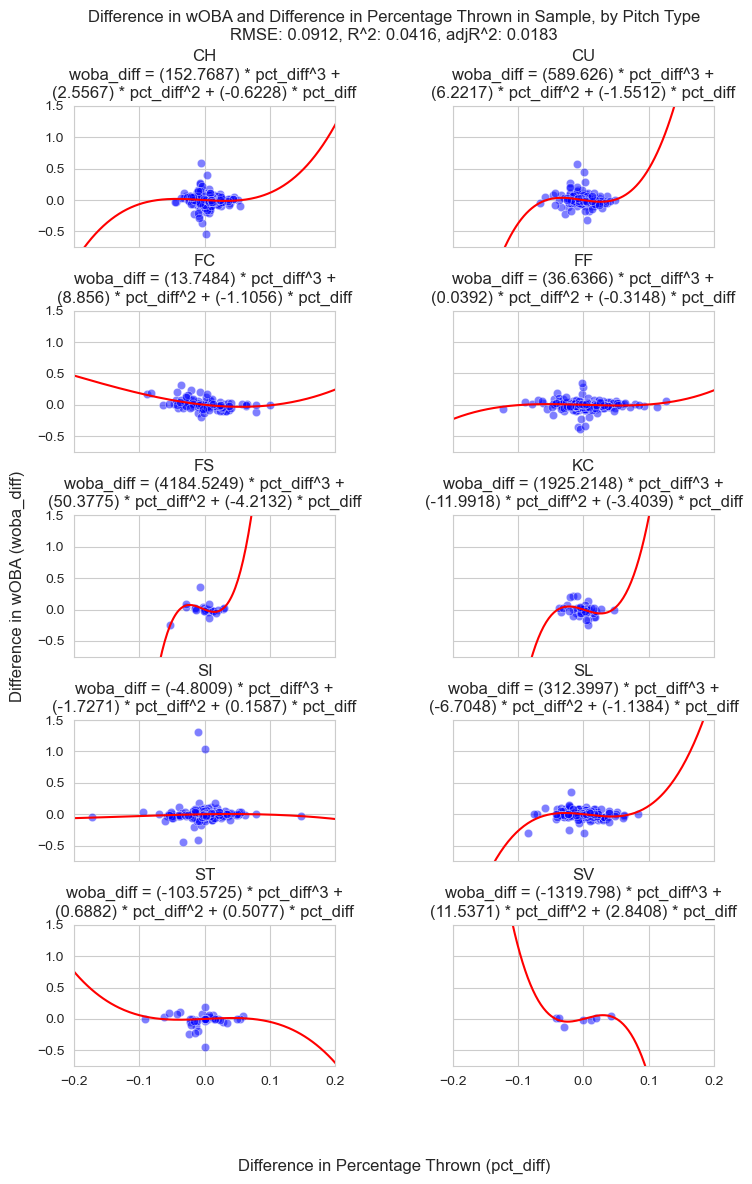

In [284]:
sns.set_style("whitegrid");

f, ax = plt.subplots(5, 2, figsize=(8, 12), sharex=True, sharey=True)
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=samples[(samples['is_CU'] == 0) & 
                                                                                       (samples['is_FC'] == 0) & 
                                                                                       (samples['is_FF'] == 0) & 
                                                                                       (samples['is_FS'] == 0) & 
                                                                                       (samples['is_KC'] == 0) &
                                                                                       (samples['is_SI'] == 0) &
                                                                                       (samples['is_SL'] == 0) &
                                                                                       (samples['is_ST'] == 0) &
                                                                                       (samples['is_SV'] == 0)], ax=ax[0, 0]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=samples[samples['is_CU'] == 1], ax=ax[0, 1]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=samples[samples['is_FC'] == 1], ax=ax[1, 0]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=samples[samples['is_FF'] == 1], ax=ax[1, 1]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=samples[samples['is_FS'] == 1], ax=ax[2, 0]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=samples[samples['is_KC'] == 1], ax=ax[2, 1]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=samples[samples['is_SI'] == 1], ax=ax[3, 0]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=samples[samples['is_SL'] == 1], ax=ax[3, 1]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=samples[samples['is_ST'] == 1], ax=ax[4, 0]);
sns.scatterplot(x='pct_diff', y='woba_diff', color='blue', alpha=0.5, data=samples[samples['is_SV'] == 1], ax=ax[4, 1]);

x_values = np.linspace(-1, 1, 1000)
y_values_CH = outputs_sppt3[1] * np.power(x_values, 3) + outputs_sppt3[2] * np.power(x_values, 2) + outputs_sppt3[3] * x_values
y_values_CU = (outputs_sppt3[1] + outputs_sppt3[4][0]) * np.power(x_values, 3) + (outputs_sppt3[2] + outputs_sppt3[5][0]) * np.power(x_values, 2) + (outputs_sppt3[3] + outputs_sppt3[6][0]) * x_values
y_values_FC = (outputs_sppt3[1] + outputs_sppt3[4][1]) * np.power(x_values, 3) + (outputs_sppt3[2] + outputs_sppt3[5][1]) * np.power(x_values, 2) + (outputs_sppt3[3] + outputs_sppt3[6][1]) * x_values
y_values_FF = (outputs_sppt3[1] + outputs_sppt3[4][2]) * np.power(x_values, 3) + (outputs_sppt3[2] + outputs_sppt3[5][2]) * np.power(x_values, 2) + (outputs_sppt3[3] + outputs_sppt3[6][2]) * x_values
y_values_FS = (outputs_sppt3[1] + outputs_sppt3[4][3]) * np.power(x_values, 3) + (outputs_sppt3[2] + outputs_sppt3[5][3]) * np.power(x_values, 2) + (outputs_sppt3[3] + outputs_sppt3[6][3]) * x_values
y_values_KC = (outputs_sppt3[1] + outputs_sppt3[4][4]) * np.power(x_values, 3) + (outputs_sppt3[2] + outputs_sppt3[5][4]) * np.power(x_values, 2) + (outputs_sppt3[3] + outputs_sppt3[6][4]) * x_values
y_values_SI = (outputs_sppt3[1] + outputs_sppt3[4][5]) * np.power(x_values, 3) + (outputs_sppt3[2] + outputs_sppt3[5][5]) * np.power(x_values, 2) + (outputs_sppt3[3] + outputs_sppt3[6][5]) * x_values
y_values_SL = (outputs_sppt3[1] + outputs_sppt3[4][6]) * np.power(x_values, 3) + (outputs_sppt3[2] + outputs_sppt3[5][6]) * np.power(x_values, 2) + (outputs_sppt3[3] + outputs_sppt3[6][6]) * x_values
y_values_ST = (outputs_sppt3[1] + outputs_sppt3[4][7]) * np.power(x_values, 3) + (outputs_sppt3[2] + outputs_sppt3[5][7]) * np.power(x_values, 2) + (outputs_sppt3[3] + outputs_sppt3[6][7]) * x_values
y_values_SV = (outputs_sppt3[1] + outputs_sppt3[4][8]) * np.power(x_values, 3) + (outputs_sppt3[2] + outputs_sppt3[5][8]) * np.power(x_values, 2) + (outputs_sppt3[3] + outputs_sppt3[6][8]) * x_values

sns.lineplot(x=x_values, y=y_values_CH, color='red', ax=ax[0, 0]);
sns.lineplot(x=x_values, y=y_values_CU, color='red', ax=ax[0, 1]);
sns.lineplot(x=x_values, y=y_values_FC, color='red', ax=ax[1, 0]);
sns.lineplot(x=x_values, y=y_values_FF, color='red', ax=ax[1, 1]);
sns.lineplot(x=x_values, y=y_values_FS, color='red', ax=ax[2, 0]);
sns.lineplot(x=x_values, y=y_values_KC, color='red', ax=ax[2, 1]);
sns.lineplot(x=x_values, y=y_values_SI, color='red', ax=ax[3, 0]);
sns.lineplot(x=x_values, y=y_values_SL, color='red', ax=ax[3, 1]);
sns.lineplot(x=x_values, y=y_values_ST, color='red', ax=ax[4, 0]);
sns.lineplot(x=x_values, y=y_values_SV, color='red', ax=ax[4, 1]);

ax[0, 0].set_title(f"CH\nwoba_diff = ({round(outputs_sppt3[1], 4)}) * pct_diff^3 +\n({round(outputs_sppt3[2], 4)}) * pct_diff^2 + ({round((outputs_sppt3[3]), 4)}) * pct_diff");
ax[0, 1].set_title(f"CU\nwoba_diff = ({round((outputs_sppt3[1] + outputs_sppt3[4][0]), 4)}) * pct_diff^3 +\n({round((outputs_sppt3[2] + outputs_sppt3[5][0]), 4)}) * pct_diff^2 + ({round((outputs_sppt3[3] + outputs_sppt3[6][0]), 4)}) * pct_diff");
ax[1, 0].set_title(f"FC\nwoba_diff = ({round((outputs_sppt3[1] + outputs_sppt3[4][1]), 4)}) * pct_diff^3 +\n({round((outputs_sppt3[2] + outputs_sppt3[5][1]), 4)}) * pct_diff^2 + ({round((outputs_sppt3[3] + outputs_sppt3[6][1]), 4)}) * pct_diff");
ax[1, 1].set_title(f"FF\nwoba_diff = ({round((outputs_sppt3[1] + outputs_sppt3[4][2]), 4)}) * pct_diff^3 +\n({round((outputs_sppt3[2] + outputs_sppt3[5][2]), 4)}) * pct_diff^2 + ({round((outputs_sppt3[3] + outputs_sppt3[6][2]), 4)}) * pct_diff");
ax[2, 0].set_title(f"FS\nwoba_diff = ({round((outputs_sppt3[1] + outputs_sppt3[4][3]), 4)}) * pct_diff^3 +\n({round((outputs_sppt3[2] + outputs_sppt3[5][3]), 4)}) * pct_diff^2 + ({round((outputs_sppt3[3] + outputs_sppt3[6][3]), 4)}) * pct_diff");
ax[2, 1].set_title(f"KC\nwoba_diff = ({round((outputs_sppt3[1] + outputs_sppt3[4][4]), 4)}) * pct_diff^3 +\n({round((outputs_sppt3[2] + outputs_sppt3[5][4]), 4)}) * pct_diff^2 + ({round((outputs_sppt3[3] + outputs_sppt3[6][4]), 4)}) * pct_diff");
ax[3, 0].set_title(f"SI\nwoba_diff = ({round((outputs_sppt3[1] + outputs_sppt3[4][5]), 4)}) * pct_diff^3 +\n({round((outputs_sppt3[2] + outputs_sppt3[5][5]), 4)}) * pct_diff^2 + ({round((outputs_sppt3[3] + outputs_sppt3[6][5]), 4)}) * pct_diff");
ax[3, 1].set_title(f"SL\nwoba_diff = ({round((outputs_sppt3[1] + outputs_sppt3[4][6]), 4)}) * pct_diff^3 +\n({round((outputs_sppt3[2] + outputs_sppt3[5][6]), 4)}) * pct_diff^2 + ({round((outputs_sppt3[3] + outputs_sppt3[6][6]), 4)}) * pct_diff");
ax[4, 0].set_title(f"ST\nwoba_diff = ({round((outputs_sppt3[1] + outputs_sppt3[4][7]), 4)}) * pct_diff^3 +\n({round((outputs_sppt3[2] + outputs_sppt3[5][7]), 4)}) * pct_diff^2 + ({round((outputs_sppt3[3] + outputs_sppt3[6][7]), 4)}) * pct_diff");
ax[4, 1].set_title(f"SV\nwoba_diff = ({round((outputs_sppt3[1] + outputs_sppt3[4][8]), 4)}) * pct_diff^3 +\n({round((outputs_sppt3[2] + outputs_sppt3[5][8]), 4)}) * pct_diff^2 + ({round((outputs_sppt3[3] + outputs_sppt3[6][8]), 4)}) * pct_diff");

for i in range(0, 5):
    for j in range(0, 2):
        ax[i, j].set_xlim(left=-0.2, right=0.2);
        ax[i, j].set_ylim(bottom=-0.75, top=1.5);


# set title
f.suptitle(f"Difference in wOBA and Difference in Percentage Thrown in Sample, by Pitch Type\nRMSE: {round(outputs_sppt3[7], 4)}, R^2: {round(outputs_sppt3[8], 4)}, adjR^2: {round(outputs_sppt3[9], 4)}");
# set x-axis label
f.supxlabel("Difference in Percentage Thrown (pct_diff)");
# set y-axis label
f.supylabel("Difference in wOBA (woba_diff)");
for i in range(0, 5):
    for j in range(0, 2):
        # set x-axis label
        ax[i, j].set_xlabel("");
        # set y-axis label
        ax[i, j].set_ylabel("");
        
f.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.45, hspace=0.45);

Some of these coefficients are large, particularly on the third-degree term, and appear to reflect very unrealistic changes to wOBA. However, these equation must be interpreted with the scale of percentage difference used to fit the model in mind. Because a 1% increase in percent thrown was equal to 0.01 when fitting the model, and the coefficients are slopes of a tangent line (standardized to be the change of the dependent variable over a one-unit increase in the independent variable), to interpret the effect of a one percent increase of percent thrown of a pitch type the coefficients of the first-degree term must be multiplied by 0.01 (divided by 100), the coefficients of the second-degree term by $0.01^2 = 0.0001$ (divided by 10,000), and the coefficients of the third-degree term by $0.01^3 = 0.000001$ (divided by 1,000,000). 

In formulating a pitcher's optimal pitch mix, where the objective function to minimize is $wOBA^{*}$, I will now use these functions for each pitch type to represent the expected change to wOBA as a function of percentage difference. This function is as follows.

$wOBA_{*} = (wOBA_{CH} + \Delta wOBA_{CH}(\Delta x_{CH})) \cdot x_{CH} + (wOBA_{CU} + \Delta wOBA_{CU}(\Delta x_{CU})) \cdot x_{CU} +\\
(wOBA_{FC} + \Delta wOBA_{FC}(\Delta x_{FC})) \cdot x_{FC} + (wOBA_{FF} + \Delta wOBA_{FF}(\Delta x_{FF})) \cdot x_{FF} +\\
(wOBA_{FS} + \Delta wOBA_{FS}(\Delta x_{FS})) \cdot x_{FS} + (wOBA_{KC} + \Delta wOBA_{KC}(\Delta x_{KC})) \cdot x_{KC} +\\
(wOBA_{SI} + \Delta wOBA_{SI}(\Delta x_{SI})) \cdot x_{SI} + (wOBA_{SL} + \Delta wOBA_{SL}(\Delta x_{SL})) \cdot x_{SL} +\\
(wOBA_{ST} + \Delta wOBA_{ST}(\Delta x_{ST})) \cdot x_{ST} + (wOBA_{SV} + \Delta wOBA_{SV}(\Delta x_{SV})) \cdot x_{SV}$

This is the nonlinear function of $x_{i}$, where $i$ is the pitch type, that I will optimize in the next project in this series.

# Section 7 - Discussion